# **Brazilian E-Commerce Public Dataset (Olist)**
Data Period : Sept 2016 - Okt 2018

📊 *Data Analysis & Processing by:*  

[Glen Valencius Joydi](https://github.com/glenvj-j) | [Khrysna Taruna Putra](https://github.com/krisnatp-gh) | [Daffa Dzaky Naufal](https://github.com/Daffa281200)

---

## **1. Context**

### **1.1. Background**
Olist is an e-commerce platform that has been operating in Brazil since 2015. Olist offers two types of products for sellers.

The first is Olist Vnda, an omnichannel e-commerce platform that allows sellers to sell across multiple platforms simultaneously, including social media, physical stores, and websites. 

The second is Olist Store, where sellers can list their products in Olist's official store across various major marketplaces in Brazil, such as:
Amazon, Americanas.com, Carrefour, Casa & Video, Casas Bahia, Cobasi, Extra.com, Inter, MadeiraMadeira, Magalu, Mercado Livre, Pontofrio, Shoptime, Submarino, Vivo Shopping, and Zoom.

One of the key benefits of using Olist is its centralized ERP platform, which enables sellers to manage all transactions (such as receiving orders, managing stock, and handling shipments) from multiple marketplaces in one place.


**In this data we will focus on the second Olist Product which is Olist Store**

### **1.2. User Flow in Olist**
A. Seller Flow
- The seller joins Olist.
- The seller uploads their product catalog to the Olist platform.
- The seller gets notified when a product is sold.
- The seller hands over the item to the logistics carrier.
    * Multiple sellers can be involved in a single customer order.

B. Buyer Flow
- The buyer browse products on the marketplace.
- The buyer purchases products from the Olist Official Store.
- The buyer receives an estimated delivery date.
- The buyer receives the order.
- The buyer leaves a review about the order.


### **1.3. Transaction Structure in Olist**
Each transaction in Olist consists of :

A customer `customer_id`  → purchasing a product `product_id` –> The product is linked to a seller `seller_id` 

→ After completing the order, the customer provides a review `review_id` –> All these elements are grouped under a unique order `order_id`

### **1.4. How does Olist generate revenue?**

- Commission on Sales: 18% platform fee and 5% operating cost per item sold.
- Subscription Fees: $39 BRL monthly subscription.
[Reference 2023](https://www.trustradius.com/products/olist/reviews#product-details) | [Reference 2025](https://olist.com/solucoes-para-comercio/vender-em-marketplaces/planos/)



## **2. Problem Statement**

Olist generates revenue from two sources: **seller subscriptions** and **commissions** from sold items.  

To maximize commissions, we need to identify the **best-performing products**. Since Olist's products come from sellers, finding the **top sellers** is key to increasing commission-based revenue.  

As the number of sellers grows, we need to **prioritize which sellers to maintain**. This analysis and model will help the **Account Manager team** identify the right sellers to focus on.  


We will do 3 things :

1. **Perform analysis of Olist’s Business Performance**  
2. **Perform analysis Buyer Preferences in Shopping on Olist**  
3. **Perform analysis and modeling for which Sellers to Retain and Prioritize for Churn Prevention**  

### **2.1. Objective: Maximizing Profit & Preventing Losses**  

Our primary goal is to **maximize profit** by identifying the best in each category:  
- 🛍️ **Best Product** – High-demand and high-profit items  
- 👤 **Best Buyer** – Loyal customers with high spending  
- 🏪 **Best Seller** – Reliable sellers with strong performance, while also **preventing profit loss** by detecting and addressing seller churn.  

Additionally, we aim to explore **future growth opportunities**, such as identifying **promising cities for expansion** and **high-potential product categories** to invest in.

For detailed cost of model will be discussed at the next part


### **2.2. Stakeholders**

**1. Olist (Company Perspective)**  
   - **Problem:** Identifying high-performing sellers who are at risk of churning.  
   - **Impact:** Loss of revenue **commissions** if top sellers leave/don't get sell.

**2. Seller Perspective**  
   - **Problem:** High-performing sellers may churn if they don't get any sales for a long time.  
   - **Impact:** Losing **top sellers**, reducing product availability and sales volume.  

**3. Buyer Perspective**  
   - **Problem:** A decline in product variety on Olist Store, making the platform less attractive.  
   - **Impact:** **Lower sales revenue** due to reduced customer engagement and purchases.

# **DATA PREPROCESSING**

Before we can address these problems, we first need to analyze and understand the data available. To simplify the analysis, we will not explain all the CSV files. Instead, we will use three CSV files that we created by merging data from nine different CSV files. 

If you want to see the detail of how we merge the csv you can see the ipynb on olist_three_sides.ipynb.


| From : | Become : |
| --- | --- |
olist_customers_dataset.csv | business_side.csv
olist_geolocation_dataset.csv | buyer_side.csv
olist_order_items_dataset.csv | seller_side.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_orders_dataset.csv
olist_products_dataset.csv
Olist_sellers_dataset.csv
product_category_name_translation

The data is collected from : [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_products_dataset.csv) 

## **1. General View**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200
warnings.simplefilter(action='ignore')

from IPython.display import HTML

In [5]:
# Define the base folder path
folder_path = os.path.join("dataset", "01_three_side_dataset")

# Load datasets using os.path.join()
df_business = pd.read_csv(os.path.join(folder_path, "business_side.csv"))
df_buyer = pd.read_csv(os.path.join(folder_path, "buyer_side.csv"))
df_seller = pd.read_csv(os.path.join(folder_path, "seller_side.csv"))

print("✅ Data loaded successfully!")

✅ Data loaded successfully!


In [6]:
display('Dataframe Business',df_business.head(),'Dataframe Buyer', df_buyer.head(),'Dataframe Seller',df_seller.head())

'Dataframe Business'

customer_id                customer_unique_id  \
0  3ce436f183e68e07877b285a838db11a  871766c5855e863f6eccc05f988b23cb   
1  f6dd3ec061db4e3987629fe6b26e5cce  eb28e67c4c0b83846050ddfb8a35d051   
2  6489ae5e4333f3693df5ad4372dab6d3  3818d81c6709e39d06b2738a8d3a2474   
3  d4eb9395c8c0431ee92fce09860c5a06  af861d436cfc08b2c2ddefd0ba074622   
4  58dbd0b2d70206bf40e62cd34e84d795  64b576fb70d441e8f1b2d7d446e483c5   

   customer_zip_code_prefix customer_state  geolocation_zip_code_prefix  \
0                     28013             RJ                        28013   
1                     15775             SP                        15775   
2                     35661             MG                        35661   
3                     12952             SP                        12952   
4                     13226             SP                        13226   

   geolocation_lat  geolocation_lng       geolocation_city geolocation_state  \
0       -21.762775       -41.309633  campos dos goytacazes                RJ   
1       -20.220527       -50.903424        santa fe do sul                SP   
2       -19.870305       -44.593326          pará de minas                MG   
3       -23.089925       -46.611654                atibaia                SP   
4       -23.243402       -46.827614        varzea paulista                SP   

                         product_id product_category_name_english   price  \
0  4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   58.90   
1  e5f2d52b802189ee658865ca93d83a8f                      pet_shop  239.90   
2  c777355d18b72b67abbeef9df44fd0fd               furniture_decor  199.00   
3  7634da152a4610f1595efa32f14722fc                     perfumery   12.99   
4  ac6c3623068f30de03045865e4e10089                  garden_tools  199.90   

                           order_id  order_item_id order_purchase_timestamp  \
0  00010242fe8c5a6d1ba2dd792cb16214              1      2017-09-13 08:59:02   
1  00018f77f2f0320c557190d7a144bdd3              1      2017-04-26 10:53:06   
2  000229ec398224ef6ca0657da4fc703e              1      2018-01-14 14:33:31   
3  00024acbcdf0a6daa1e931b038114c75              1      2018-08-08 10:00:35   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1      2017-02-04 13:57:51   

   avg_items_per_order  net_profit order_status  
0                    1     10.6020    delivered  
1                    1     43.1820    delivered  
2                    1     35.8200    delivered  
3                    1      2.3382    delivered  
4                    1     35.9820    delivered

'Dataframe Buyer'

customer_id                customer_unique_id  \
0  3ce436f183e68e07877b285a838db11a  871766c5855e863f6eccc05f988b23cb   
1  f6dd3ec061db4e3987629fe6b26e5cce  eb28e67c4c0b83846050ddfb8a35d051   
2  6489ae5e4333f3693df5ad4372dab6d3  3818d81c6709e39d06b2738a8d3a2474   
3  d4eb9395c8c0431ee92fce09860c5a06  af861d436cfc08b2c2ddefd0ba074622   
4  58dbd0b2d70206bf40e62cd34e84d795  64b576fb70d441e8f1b2d7d446e483c5   

   customer_zip_code_prefix customer_state  geolocation_zip_code_prefix  \
0                     28013             RJ                        28013   
1                     15775             SP                        15775   
2                     35661             MG                        35661   
3                     12952             SP                        12952   
4                     13226             SP                        13226   

   geolocation_lat  geolocation_lng       geolocation_city geolocation_state  \
0       -21.762775       -41.309633  campos dos goytacazes                RJ   
1       -20.220527       -50.903424        santa fe do sul                SP   
2       -19.870305       -44.593326          pará de minas                MG   
3       -23.089925       -46.611654                atibaia                SP   
4       -23.243402       -46.827614        varzea paulista                SP   

                         product_id product_category_name_english   price  \
0  4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   58.90   
1  e5f2d52b802189ee658865ca93d83a8f                      pet_shop  239.90   
2  c777355d18b72b67abbeef9df44fd0fd               furniture_decor  199.00   
3  7634da152a4610f1595efa32f14722fc                     perfumery   12.99   
4  ac6c3623068f30de03045865e4e10089                  garden_tools  199.90   

                           order_id  order_item_id order_purchase_timestamp  \
0  00010242fe8c5a6d1ba2dd792cb16214              1      2017-09-13 08:59:02   
1  00018f77f2f0320c557190d7a144bdd3              1      2017-04-26 10:53:06   
2  000229ec398224ef6ca0657da4fc703e              1      2018-01-14 14:33:31   
3  00024acbcdf0a6daa1e931b038114c75              1      2018-08-08 10:00:35   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1      2017-02-04 13:57:51   

  payment_type order_status  review_score  
0  credit_card    delivered           5.0  
1  credit_card    delivered           4.0  
2  credit_card    delivered           5.0  
3  credit_card    delivered           4.0  
4  credit_card    delivered           5.0

'Dataframe Seller'

seller_id  seller_zip_code_prefix    seller_city  \
0  48436dade18ac8b2bce089ec2a041202                   27277  volta redonda   
1  dd7ddc04e1b6c2c614352b383efe2d36                    3471      sao paulo   
2  5b51032eddd242adc84c38acab88f23d                   37564  borda da mata   
3  9d7a1d34a5052409006425275ba1c2b4                   14403         franca   
4  df560393f3a51e74553ab94004ba5c87                   87900         loanda   

  seller_state  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0           SP                        27277       -22.496953       -44.127492   
1           SP                         3471       -23.565096       -46.518565   
2           MG                        37564       -22.262584       -46.171124   
3           SP                        14403       -20.553624       -47.387359   
4           PR                        87900       -22.929384       -53.135873   

  geolocation_city geolocation_state                        product_id  \
0    volta redonda                RJ  4244733e06e7ecb4970a6e2683c13e61   
1        sao paulo                SP  e5f2d52b802189ee658865ca93d83a8f   
2    borda da mata                MG  c777355d18b72b67abbeef9df44fd0fd   
3           franca                SP  7634da152a4610f1595efa32f14722fc   
4           loanda                PR  ac6c3623068f30de03045865e4e10089   

  product_category_name_english   price                          order_id  \
0                    cool_stuff   58.90  00010242fe8c5a6d1ba2dd792cb16214   
1                      pet_shop  239.90  00018f77f2f0320c557190d7a144bdd3   
2               furniture_decor  199.00  000229ec398224ef6ca0657da4fc703e   
3                     perfumery   12.99  00024acbcdf0a6daa1e931b038114c75   
4                  garden_tools  199.90  00042b26cf59d7ce69dfabb4e55b4fd9   

   order_item_id order_purchase_timestamp    order_approved_at  \
0              1      2017-09-13 08:59:02  2017-09-13 09:45:35   
1              1      2017-04-26 10:53:06  2017-04-26 11:05:13   
2              1      2018-01-14 14:33:31  2018-01-14 14:48:30   
3              1      2018-08-08 10:00:35  2018-08-08 10:10:18   
4              1      2017-02-04 13:57:51  2017-02-04 14:10:13   

   shipping_limit_date order_status order_delivered_carrier_date  \
0  2017-09-19 09:45:35    delivered          2017-09-19 18:34:16   
1  2017-05-03 11:05:13    delivered          2017-05-04 14:35:00   
2  2018-01-18 14:48:30    delivered          2018-01-16 12:36:48   
3  2018-08-15 10:10:18    delivered          2018-08-10 13:28:00   
4  2017-02-13 13:57:51    delivered          2017-02-16 09:46:09   

  order_delivered_customer_date order_estimated_delivery_date  review_score  \
0           2017-09-20 23:43:48                    2017-09-29           5.0   
1           2017-05-12 16:04:24                    2017-05-15           4.0   
2           2018-01-22 13:19:16                    2018-02-05           5.0   
3           2018-08-14 13:32:39                    2018-08-20           4.0   
4           2017-03-01 16:42:31                    2017-03-17           5.0   

  time_deliver_to_carrier  net_profit  
0         6 days 08:48:41     10.6020  
1         8 days 03:29:47     43.1820  
2         1 days 21:48:18     35.8200  
3         2 days 03:17:42      2.3382  
4        11 days 19:35:56     35.9820

- The dataset represents **sales data from Olist**.  
- Each row in the dataset corresponds to **a transaction of a product** in Olist’s partner marketplace.

In [7]:
from IPython.core.display import display, HTML

def side_by_side(*dfs, titles=None):
    if titles is None:
        titles = [""] * len(dfs)  # Default empty titles if not provided

    html = '<div style="display:flex; align-items: flex-start;">'
    
    for df, title in zip(dfs, titles):
        html += '<div style="margin-right: 2em">'
        html += f'<h3 style="text-align:center;">{title}</h3>'  # Add title
        html += df.to_html()
        html += '</div>'
    
    html += '</div>'
    display(HTML(html))


In [8]:
display_all = []
for df in [df_business,df_buyer,df_seller] :
    x = pd.DataFrame({
    'total': df.shape[0],
    'null_count': df.isna().sum(),
    'null_pct':   [f"{val:.2f}%" for val in (df.isna().sum() / df.shape[0] * 100)],
    'unique_count': df.nunique(),
    'dtype': df.dtypes
}).rename_axis('column')
    display_all.append(x)
side_by_side(display_all[0],display_all[1],display_all[2],titles=["df_business", "df_buyer","df_seller"])

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| customer_id | Object | Each order has a unique customer_id. (NOTE: Hash) |
| customer_unique_id | Object | Unique identifier of a customer. (NOTE: Hash) |
| customer_zip_code_prefix | Object | First five digits of customer ZIP code |
| customer_state | Object | Customer state |
| geolocation_zip_code_prefix | Object | First five digits of ZIP code |
| geolocation_lat | float64 | Latitude of ZIP area |
| geolocation_lng | float64 | Longitude of ZIP area |
| geolocation_city | Object | City of ZIP area |
| geolocation_state | Object | Province of ZIP area |
| product_id | Object | Represent unique product |
| product_category_name_english | Object | Category of Product | 
| price | float64 | Item price |
| order_id | Object | Represent unique order, each order_id contain multiple product_id |
| order_item_id | int64 | The quantity of items and their order sequence in a single order |
| order_purchase_timestamp | datetime64[ns] | Shows the purchase timestamp by buyer | 
| avg_items_per_order | int64 | How many buyer buy product per transaction | 
| net_profit  |  int64  | Net Profit (Price * 18%) | 
| payment_type | Object | Method of payment chosen by the customer |
| order_status  |  Object  | Reference to the order status (delivered, shipped, etc). | 
| review_score  |  int64  | Rating from 1 to 5 given by the customer on a satisfaction survey. | 
| seller_id  |  Object  | Represent unique seller | 
| seller_zip_code_prefix  |  Object  | ZIP code of Seller | 
| seller_city  |  Object  | City of Seller | 
| seller_state  |  Object  | Sate of Seller | 
| order_purchase_timestamp  |  datetime64[ns]  | Shows the purchase timestamp | 
| order_approved_at  |  datetime64[ns]  | Shows the payment approval timestamp | 
| shipping_limit_date  |  datetime64[ns]  | Deadline time for the seller to ship the item | 
| order_delivered_carrier_date  |  datetime64[ns]  | Shows the order posting timestamp. When it was handed to the logistic partner | 
| order_delivered_customer_date  |  datetime64[ns]  | Shows the actual order delivery date to the buyer | 
| order_estimated_delivery_date  |  datetime64[ns]  | Shows the estimated delivery date that was informed to buyer at the purchase moment | 
| time_deliver_to_carrier  |  int64  | How long Seller deliver package to logistic partner | 

<br>

In [9]:
pd.set_option('display.max_colwidth', None)

display_alla = []
for df in [df_business,df_buyer,df_seller] :
    listItem = []
    for col in df.columns:
        unique_values = df[col].unique()[:10]  # Get first 10 unique values
        unique_sample = list(unique_values)  # Convert to list
        
        # Append "..." if there are more than 10 unique values
        if df[col].nunique() > 10:
            unique_sample.append("...")  

        listItem.append([col, df[col].nunique(), unique_sample])

    # Create DataFrame
    tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
    display_alla.append(tabel1Desc)

side_by_side(display_alla[0],display_alla[1],display_alla[2],titles=["df_business", "df_buyer","df_seller"])

**General Observations:**
1. **`df_business`**:  
   - Missing values in **product category name**.  

2. **`df_buyer`**:  
   - **Review scores** contain null values.  

3. **`df_seller`**:  
   - Missing values in **order date**.  
   - **Date format is inconsistent** and needs standardization.  

In [10]:
# Change Dtype
# Business Side
df_business['order_purchase_timestamp'] = pd.to_datetime(df_business['order_purchase_timestamp'])
df_business['customer_zip_code_prefix'] = df_business['customer_zip_code_prefix'].astype(str)
df_business['geolocation_zip_code_prefix'] = df_business['geolocation_zip_code_prefix'].astype(str)

# Seller Side
df_seller['seller_zip_code_prefix'] = df_seller['seller_zip_code_prefix'].astype(str)
df_seller['geolocation_zip_code_prefix'] = df_seller['geolocation_zip_code_prefix'].astype(str)
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'shipping_limit_date',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]


for col in datetime_columns:
    df_seller[col] = pd.to_datetime(df_seller[col])

df_seller['time_deliver_to_carrier'] = pd.to_timedelta(df_seller['time_deliver_to_carrier'])



#Buyer Side
df_buyer['order_purchase_timestamp'] = pd.to_datetime(df_buyer['order_purchase_timestamp'])
df_buyer['customer_zip_code_prefix'] = df_buyer['customer_zip_code_prefix'].astype(str)
df_buyer['geolocation_zip_code_prefix'] = df_buyer['geolocation_zip_code_prefix'].astype(str)

In [11]:
display_all = []
for df in [df_business,df_buyer,df_seller] :
    x = pd.DataFrame({
    'total': df.shape[0],
    'null_count': df.isna().sum(),
    'null_pct':   [f"{val:.2f}%" for val in (df.isna().sum() / df.shape[0] * 100)],
    'unique_count': df.nunique(),
    'dtype': df.dtypes
}).rename_axis('column')
    display_all.append(x)
side_by_side(display_all[0],display_all[1],display_all[2],titles=["df_business", "df_buyer","df_seller"])

Next, we will check the location of Null data if there are in the same row or not

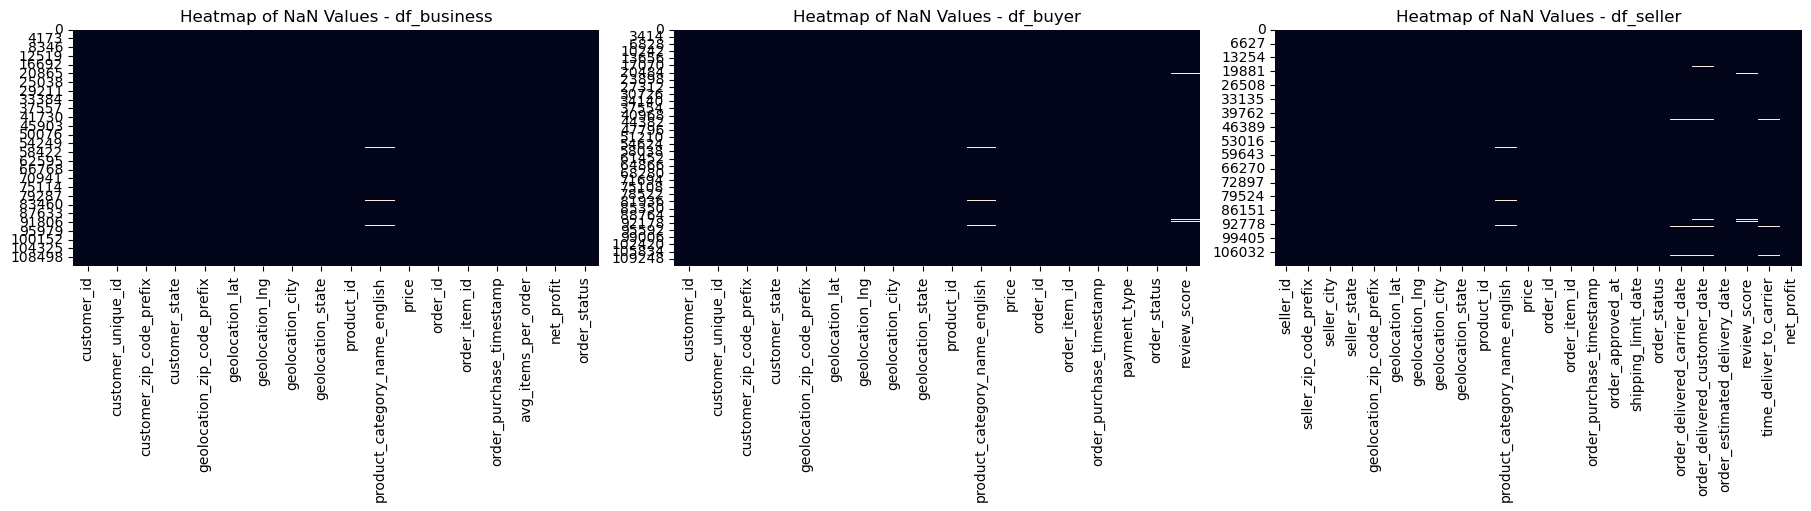

In [12]:
def checknan() :# Create subplots (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

    # Plot heatmaps for each DataFrame
    sns.heatmap(df_business.isna(), cbar=False, ax=axes[0])
    axes[0].set_title('Heatmap of NaN Values - df_business')

    sns.heatmap(df_buyer.isna(), cbar=False, ax=axes[1])
    axes[1].set_title('Heatmap of NaN Values - df_buyer')

    sns.heatmap(df_seller.isna(), cbar=False, ax=axes[2])
    axes[2].set_title('Heatmap of NaN Values - df_seller')

    # Show the plots
    plt.show()
    side_by_side(df_business.isna().sum().reset_index().rename(columns={0:'Total NaN'}),
                 df_buyer.isna().sum().reset_index().rename(columns={0:'Total NaN'}),
                 df_seller.isna().sum().reset_index().rename(columns={0:'Total NaN'}),titles=["df_business", "df_buyer","df_seller"])
checknan() 

As we can see, the null data in `df_business` and `df_buyer` appear in similar places. We will try clean the data for each dataframe

## 2.**Fill NaN or Null**

### 2.1. product_category_name_english Column

In [13]:
side_by_side(df_business.isna().sum().reset_index().rename(columns={0:'Total NaN'}),df_buyer.isna().sum().reset_index().rename(columns={0:'Total NaN'}),df_seller.isna().sum().reset_index().rename(columns={0:'Total NaN'}),titles=["df_business", "df_buyer","df_seller"])

In [14]:
df_business[df_business['product_id'].isin(df_business[df_business['product_category_name_english'].isna()]['product_id'])].isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_state                      0
geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
product_id                          0
product_category_name_english    1627
price                               0
order_id                            0
order_item_id                       0
order_purchase_timestamp            0
avg_items_per_order                 0
net_profit                          0
order_status                        0
dtype: int64

We attempted to fill missing category names using the same `product_id`, but all instances of each `product_id` contain NaN values.  
Since no existing data can be used for imputation, we will replace these NaN values with `"Unknown"`.

In [15]:
df_business['product_category_name_english'] = df_business['product_category_name_english'].fillna('Unknown')
df_seller['product_category_name_english'] = df_seller['product_category_name_english'].fillna('Unknown')
df_buyer['product_category_name_english'] = df_buyer['product_category_name_english'].fillna('Unknown')


In [16]:
side_by_side(df_business.isna().sum().reset_index().rename(columns={0:'Total NaN'}),df_buyer.isna().sum().reset_index().rename(columns={0:'Total NaN'}),df_seller.isna().sum().reset_index().rename(columns={0:'Total NaN'}),titles=["df_business", "df_buyer","df_seller"])

### 2.2 review_score column

We will attempt to fill missing `review_score` values by grouping the data by `product_id` and using average score using median for each product.  

Before doing so, we will create a new column to label whether a buyer has submitted a review or not

In [17]:
df_buyer['review_score'].isna().sum()

942

In [18]:
df_buyer[df_buyer['review_score'].isna()]

customer_id                customer_unique_id  \
32      2e45292979b9b2700ea09560eeb0f803  bb8a37225e0279ac8a274c9765617eaf   
33      2e45292979b9b2700ea09560eeb0f803  bb8a37225e0279ac8a274c9765617eaf   
34      2e45292979b9b2700ea09560eeb0f803  bb8a37225e0279ac8a274c9765617eaf   
89      d96e5c4400413a11fa8c9fd54be4a20b  22b12c9c5bc6ba994b2423d87d3bb88a   
256     acb6cc6ec99086b8b53c858a0731c189  87dff19086a1aa321cf06195ab40631c   
...                                  ...                               ...   
112217  31a965e3f0fe26e844fe5dbcfac619e3  f0c28b2f7f6d5edd4ee5537aacbac351   
112233  f48d464a0baaea338cb25f816991ab1f  459bef486812aa25204be022145caa62   
112289  74bff367924485ad26b79d31e5623874  87a9e1b0c91f8e66fdfe708a5a40942a   
112396  e6ab213cb124524887ac41b8eaca9653  ffb3cbd5e1e507679e2db84c515410a5   
112584  621bdee022e2acb3aadf90994fd4e39a  3a00b1dfb1dbb5f7eb5cbede869b5846   

       customer_zip_code_prefix customer_state geolocation_zip_code_prefix  \
32                        74663             GO                       74663   
33                        74663             GO                       74663   
34                        74663             GO                       74663   
89                        29122             ES                       29122   
256                       22785             RJ                       22785   
...                         ...            ...                         ...   
112217                    58037             PB                       58037   
112233                    29066             ES                       29066   
112289                    60175             CE                       60175   
112396                     3220             SP                        3220   
112584                    95895             RS                       95895   

        geolocation_lat  geolocation_lng geolocation_city geolocation_state  \
32           -16.632315       -49.258280          goiania                GO   
33           -16.632315       -49.258280          goiania                GO   
34           -16.632315       -49.258280          goiania                GO   
89           -20.339044       -40.309098       vila velha                ES   
256          -22.979900       -43.491765   rio de janeiro                RJ   
...                 ...              ...              ...               ...   
112217        -7.085468       -34.836183      joao pessoa                PB   
112233       -20.275790       -40.289206          vitoria                ES   
112289        -3.735628       -38.482601        fortaleza                CE   
112396       -23.604534       -46.528422        sao paulo                SP   
112584       -29.388254       -51.868993          colinas                RS   

                              product_id product_category_name_english  \
32      e95ee6822b66ac6058e2e4aff656071a                sports_leisure   
33      e95ee6822b66ac6058e2e4aff656071a                sports_leisure   
34      e95ee6822b66ac6058e2e4aff656071a                sports_leisure   
89      87b08e712cc4c9fe70984c5a24b29e2f                          toys   
256     33bd5538a16d23f0a39da1c9bfd20980                  home_confort   
...                                  ...                           ...   
112217  404a57563d487aecbc2b1a01d9b89aab                bed_bath_table   
112233  69c590f7ffc7bf8db97190b6cb6ed62e                     computers   
112289  461f43be3bdf8844e65b62d9ac2c7a5a                 watches_gifts   
112396  f0354861ab19941a53209c2acbb1b604                          toys   
112584  38e28b7814d36bc84b972a75dd7c5ce7                  market_place   

          price                          order_id  order_item_id  \
32        21.33  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33        21.33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34        21.33  00143d0f86d6fbd9f9b38ab440ac16f5              3   
89        63.90  00335b686d693c7d72deeb12f8e8

In [19]:
# Giving new column reviewed True if already reviewed
df_buyer['reviewed'] = df_buyer['review_score'].notna()
df_seller['reviewed'] = df_seller['review_score'].notna()

In [20]:
# 
df_review_score = df_buyer.groupby('product_id')['review_score'].median().apply(np.floor).reset_index()
df_review_score

product_id  review_score
0      00066f42aeeb9f3007548bb9d3f33c38           5.0
1      00088930e925c41fd95ebfe695fd2655           4.0
2      0009406fd7479715e4bef61dd91f2462           1.0
3      000b8f95fcb9e0096488278317764d19           5.0
4      000d9be29b5207b54e86aa1b1ac54872           5.0
...                                 ...           ...
32946  fff6177642830a9a94a0f2cba5e476d1           4.0
32947  fff81cc3158d2725c0655ab9ba0f712c           4.0
32948  fff9553ac224cec9d15d49f5a263411f           5.0
32949  fffdb2d0ec8d6a61f0a0a0db3f25b441           5.0
32950  fffe9eeff12fcbd74a2f2b007dde0c58           4.0

[32951 rows x 2 columns]

In [21]:
# Checking total row that not delivered
print(f'''Total review_score NaN = {df_buyer[(df_buyer['review_score'].isna())].shape[0]}''')
print(f'''Total review_score NaN with order_status not delivered =  {df_buyer[(df_buyer['review_score'].isna())&(df_buyer['order_status']!='delivered')].shape[0]}''')

Total review_score NaN = 942
Total review_score NaN with order_status not delivered =  115


In [22]:
# Fill NaN review scores for delivered orders using the average review score of the same product_id

before_impute = df_buyer[(df_buyer['review_score'].isna())].shape[0]

df_buyer.loc[df_buyer['order_status'] == 'delivered', 'review_score'] = \
    df_buyer.loc[df_buyer['order_status'] == 'delivered', 'review_score'].fillna(
        df_buyer['product_id'].map(df_review_score.set_index('product_id')['review_score'])
    )

df_seller.loc[df_seller['order_status'] == 'delivered', 'review_score'] = \
    df_seller.loc[df_seller['order_status'] == 'delivered', 'review_score'].fillna(
        df_seller['product_id'].map(df_review_score.set_index('product_id')['review_score'])
    )

after_impute = df_buyer[(df_buyer['review_score'].isna())].shape[0]

print(f'''Total review_score NaN = {after_impute}''')
print(f'''Total review_score NaN with order_status not delivered =  {df_buyer[(df_buyer['review_score'].isna())&(df_buyer['order_status']!='delivered')].shape[0]}''')
print(f'''Total Successfully Filled review_score NaN Values = {before_impute - after_impute}''')

Total review_score NaN = 301
Total review_score NaN with order_status not delivered =  115
Total Successfully Filled review_score NaN Values = 641


In [23]:
# Unique of review_score
df_buyer['review_score'].unique()

array([ 5.,  4.,  1.,  3.,  2., nan])

For `review_score` values that have no reference (i.e., no existing reviews for the product), we will assign a score of `0` to indicate that the product has never been reviewed.  

Additionally, products that were **not delivered** will also receive a score of `0`, as they were never received by the customer to be reviewed.  

In [24]:
# Fill NaN with 0 for row that never reviewed and not delivered
df_buyer['review_score'].fillna(0,inplace=True)
df_seller['review_score'].fillna(0,inplace=True)

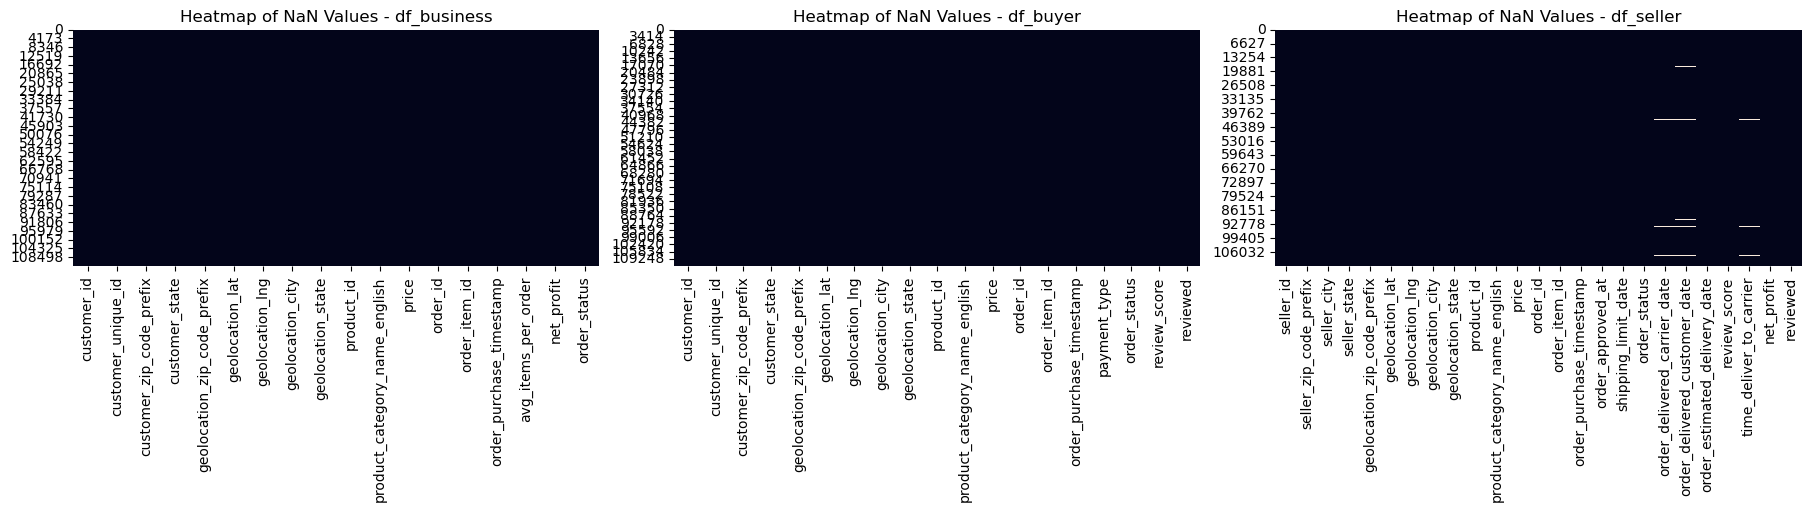

In [25]:
checknan() 

### 2.3. payment_type column

To address missing values in the `payment_type` column, we will use the mode (most frequently occurring value).  
Since **Credit Card** is the most commonly used payment method, we will replace all NaN values with `"Credit Card"`.  

In [26]:
# Only 3 row that contain payment_type NaN
df_buyer[df_buyer['payment_type'].isna()][['customer_id','payment_type']]

customer_id payment_type
84389  86dc2ffce2dfff336de2f386a786e574          NaN
84390  86dc2ffce2dfff336de2f386a786e574          NaN
84391  86dc2ffce2dfff336de2f386a786e574          NaN

Text(0.5, 1.0, 'Comparison of Payment Type Counts')

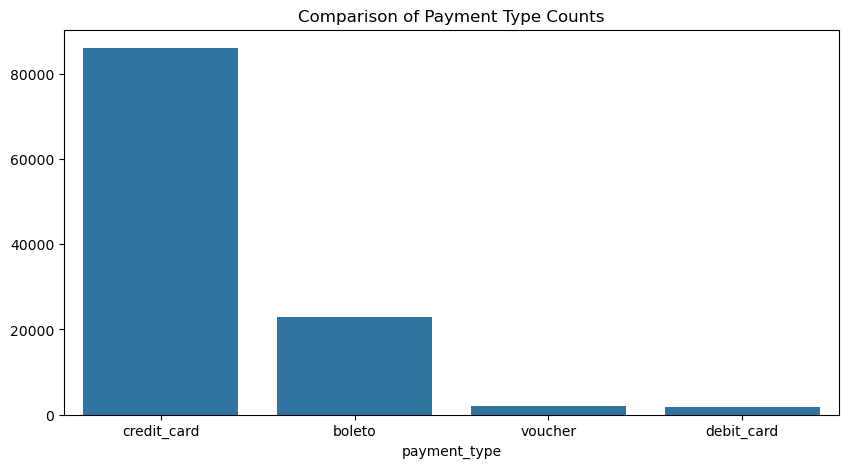

In [27]:
# Most used payment is Credit Card
plt.figure(figsize=(10,5))
sns.barplot(x=df_buyer['payment_type'].value_counts().index,y=df_buyer['payment_type'].value_counts().values)
plt.title('Comparison of Payment Type Counts')

In [28]:
# Filla NaN with mode which is creadit_card
df_buyer.fillna(df_buyer['payment_type'].mode()[0],inplace=True)

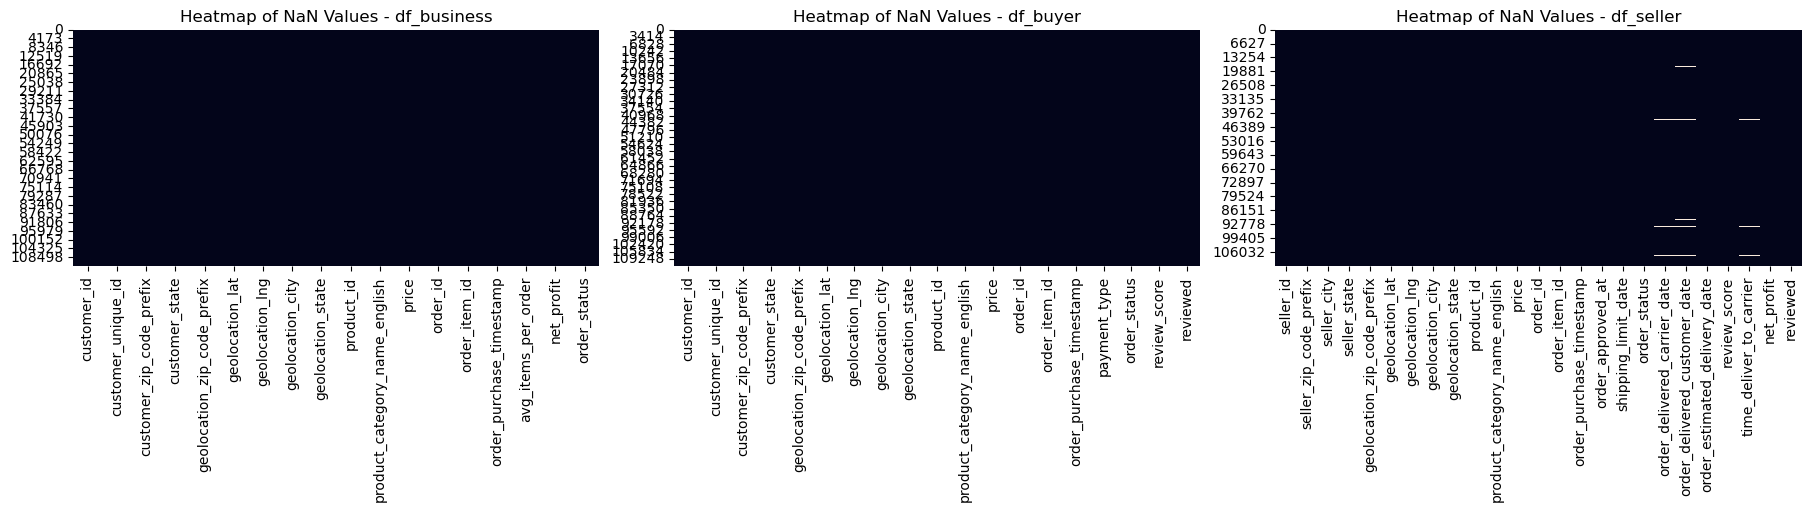

In [29]:
checknan()

### 2.4.order_approved_at column

To estimate missing values in the `order_approved_at` column, we will:  
1. Group the data by `seller_id` and calculate the median of `time_to_approved` for each seller.  
2. Fill missing `order_approved_at` values by adding the median `time_to_approved` to `order_purchase_timestamp`.  

This approach ensures a reasonable estimation based on the seller's typical approval time. 

In [30]:
# Checking data that order_approved_at is NaN but the order_status is not canceled and unavaiable
df_seller[(df_seller['order_approved_at'].isna()) & (df_seller['order_status'] != 'canceled') & (df_seller['order_status'] != 'unavailable')][['seller_id','order_approved_at','order_id','order_status']]

seller_id order_approved_at  \
8204   7a67c85e85bb2ce8582c35f2203ad736               NaT   
19005  7a67c85e85bb2ce8582c35f2203ad736               NaT   
20473  5fd924b4836098a5be0ecf81ba054ce0               NaT   
26393  004c9cd9d87a3c30c522c48c4fc07416               NaT   
36128  cca3071e3e9bb7d12640c9fbe2301306               NaT   
40822  7a67c85e85bb2ce8582c35f2203ad736               NaT   
49309  cca3071e3e9bb7d12640c9fbe2301306               NaT   
49336  3481aa57cd91f9f9d3fa1fa12d9a3bf7               NaT   
59699  0db783cfcd3b73998abc6e10e59a102f               NaT   
59700  0db783cfcd3b73998abc6e10e59a102f               NaT   
60815  a4b6b9b992b46e9ef863637af96e04bc               NaT   
85300  80e6699fe29150b372a0c8a1ebf7dcc8               NaT   
94630  cca3071e3e9bb7d12640c9fbe2301306               NaT   
94999  cb3dd9ce66268c7a3ca7241ac70ab58c               NaT   
98863  4e7c18b98d84e05cbae3ff0ff03846c2               NaT   

                               order_id order_status  
8204   12a95a3c06dbaec84bcfb0e2da5d228a    delivered  
19005  2babbb4b15e6d2dfe95e2de765c97bce    delivered  
20473  2eecb0d85f281280f79fa00f9cec1a95    delivered  
26393  3c0b8706b065f9919d0505d3b3343881    delivered  
36128  51eb2eebd5d76a24625b31c33dd41449    delivered  
40822  5cf925b116421afa85ee25e99b4c34fb    delivered  
49309  7002a78c79c519ac54022d4f8a65e6e8    delivered  
49336  7013bcfc1c97fe719a7b5e05e61c12db    delivered  
59699  88083e8f64d95b932164187484d90212    delivered  
59700  88083e8f64d95b932164187484d90212    delivered  
60815  8a9adc69528e1001fc68dd0aaebbb54a    delivered  
85300  c1d4211b3dae76144deccd6c74144a88    delivered  
94630  d69e5d356402adc8cf17e08b5033acfb    delivered  
94999  d77031d6a3c8a52f019764e68f211c69    delivered  
98863  e04abd8149ef81b95221e88f6ed9ab6a    delivered

In [31]:
# Getting the index for checking row that contain nan
check = df_seller[(df_seller['order_approved_at'].isna()) & (df_seller['order_status'] != 'canceled') & (df_seller['order_status'] != 'unavailable')].index
df_seller.iloc[check][['seller_id','order_approved_at']]

seller_id order_approved_at
8204   7a67c85e85bb2ce8582c35f2203ad736               NaT
19005  7a67c85e85bb2ce8582c35f2203ad736               NaT
20473  5fd924b4836098a5be0ecf81ba054ce0               NaT
26393  004c9cd9d87a3c30c522c48c4fc07416               NaT
36128  cca3071e3e9bb7d12640c9fbe2301306               NaT
40822  7a67c85e85bb2ce8582c35f2203ad736               NaT
49309  cca3071e3e9bb7d12640c9fbe2301306               NaT
49336  3481aa57cd91f9f9d3fa1fa12d9a3bf7               NaT
59699  0db783cfcd3b73998abc6e10e59a102f               NaT
59700  0db783cfcd3b73998abc6e10e59a102f               NaT
60815  a4b6b9b992b46e9ef863637af96e04bc               NaT
85300  80e6699fe29150b372a0c8a1ebf7dcc8               NaT
94630  cca3071e3e9bb7d12640c9fbe2301306               NaT
94999  cb3dd9ce66268c7a3ca7241ac70ab58c               NaT
98863  4e7c18b98d84e05cbae3ff0ff03846c2               NaT

In [32]:
# Creating time_to_approve to know median of each seller to approve a order
df_seller['time_to_approved'] = df_seller['order_approved_at'] - df_seller['order_purchase_timestamp']

In [33]:
df_seller[['seller_id','order_approved_at','order_purchase_timestamp','time_to_approved']]

seller_id   order_approved_at  \
0       48436dade18ac8b2bce089ec2a041202 2017-09-13 09:45:35   
1       dd7ddc04e1b6c2c614352b383efe2d36 2017-04-26 11:05:13   
2       5b51032eddd242adc84c38acab88f23d 2018-01-14 14:48:30   
3       9d7a1d34a5052409006425275ba1c2b4 2018-08-08 10:10:18   
4       df560393f3a51e74553ab94004ba5c87 2017-02-04 14:10:13   
...                                  ...                 ...   
112645  b8bc237ba3788b23da09c0f1f3a3288c 2018-04-25 04:11:01   
112646  f3c38ab652836d21de61fb8314b69182 2018-07-17 04:31:48   
112647  c3cfdc648177fdbbbb35635a37472c53 2017-10-24 17:14:25   
112648  2b3e4a2a3ea8e01938cabda2a3e5cc79 2017-08-15 00:04:32   
112649  f7ccf836d21b2fb1de37564105216cc1 2018-06-09 17:10:13   

       order_purchase_timestamp time_to_approved  
0           2017-09-13 08:59:02  0 days 00:46:33  
1           2017-04-26 10:53:06  0 days 00:12:07  
2           2018-01-14 14:33:31  0 days 00:14:59  
3           2018-08-08 10:00:35  0 days 00:09:43  
4           2017-02-04 13:57:51  0 days 00:12:22  
...                         ...              ...  
112645      2018-04-23 13:57:06  1 days 14:13:55  
112646      2018-07-14 10:26:46  2 days 18:05:02  
112647      2017-10-23 17:07:56  1 days 00:06:29  
112648      2017-08-14 23:02:59  0 days 01:01:33  
112649      2018-06-09 17:00:18  0 days 00:09:55  

[112650 rows x 4 columns]

In [34]:
# Grouping by seller_id
df_order_approved_at = df_seller.groupby('seller_id')['time_to_approved'].median().reset_index()
df_order_approved_at

seller_id       time_to_approved
0     0015a82c2db000af6aaaf3ae2ecb0532        0 days 15:39:46
1     001cca7ae9ae17fb1caed9dfb1094831        0 days 00:18:08
2     001e6ad469a905060d959994f1b41e4f        0 days 00:14:46
3     002100f778ceb8431b7a1020ff7ab48f        0 days 00:18:03
4     003554e2dce176b5555353e4f3555ac8        0 days 00:18:38
...                                ...                    ...
3090  ffcfefa19b08742c5d315f2791395ee5        0 days 00:21:12
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3        0 days 00:53:35
3092  ffeee66ac5d5a62fe688b9d26f83f534 0 days 03:05:49.500000
3093  fffd5413c0700ac820c7069d66d98c89        0 days 00:21:50
3094  ffff564a4f9085cd26170f4732393726        0 days 00:12:48

[3095 rows x 2 columns]

In [35]:
# Fill missing values based on order purchase timestamp + estimated approval time
mask = (df_seller['order_approved_at'].isna()) & (df_seller['order_status'] != 'canceled') & (df_seller['order_status'] != 'unavailable')


# df_seller.loc[mask, 'order_delivered_customer_date'] = df_seller.loc[mask, 'order_estimated_delivery_date']


df_seller.loc[mask,'order_approved_at'] = df_seller['order_purchase_timestamp'] + \
    df_seller['seller_id'].map(df_order_approved_at.set_index('seller_id')['time_to_approved'])


In [36]:
# We successfully fill the nan
df_seller.iloc[check][['seller_id','order_approved_at']]

seller_id       order_approved_at
8204   7a67c85e85bb2ce8582c35f2203ad736 2017-02-17 13:24:13.000
19005  7a67c85e85bb2ce8582c35f2203ad736 2017-02-18 17:33:21.000
20473  5fd924b4836098a5be0ecf81ba054ce0 2017-02-17 17:34:19.000
26393  004c9cd9d87a3c30c522c48c4fc07416 2017-02-17 16:09:57.500
36128  cca3071e3e9bb7d12640c9fbe2301306 2017-02-18 16:08:12.500
40822  7a67c85e85bb2ce8582c35f2203ad736 2017-02-18 17:06:53.000
49309  cca3071e3e9bb7d12640c9fbe2301306 2017-01-19 22:42:44.500
49336  3481aa57cd91f9f9d3fa1fa12d9a3bf7 2017-02-18 13:51:46.000
59699  0db783cfcd3b73998abc6e10e59a102f 2017-02-18 23:06:20.000
59700  0db783cfcd3b73998abc6e10e59a102f 2017-02-18 23:06:20.000
60815  a4b6b9b992b46e9ef863637af96e04bc 2017-02-19 10:57:16.000
85300  80e6699fe29150b372a0c8a1ebf7dcc8 2017-01-19 13:06:07.500
94630  cca3071e3e9bb7d12640c9fbe2301306 2017-02-19 01:44:32.500
94999  cb3dd9ce66268c7a3ca7241ac70ab58c 2017-02-18 11:19:32.500
98863  4e7c18b98d84e05cbae3ff0ff03846c2 2017-02-18 15:00:13.000

In [37]:
# Delete column time_to_approved because we dont need it anymore
df_seller.drop(columns='time_to_approved',inplace=True)

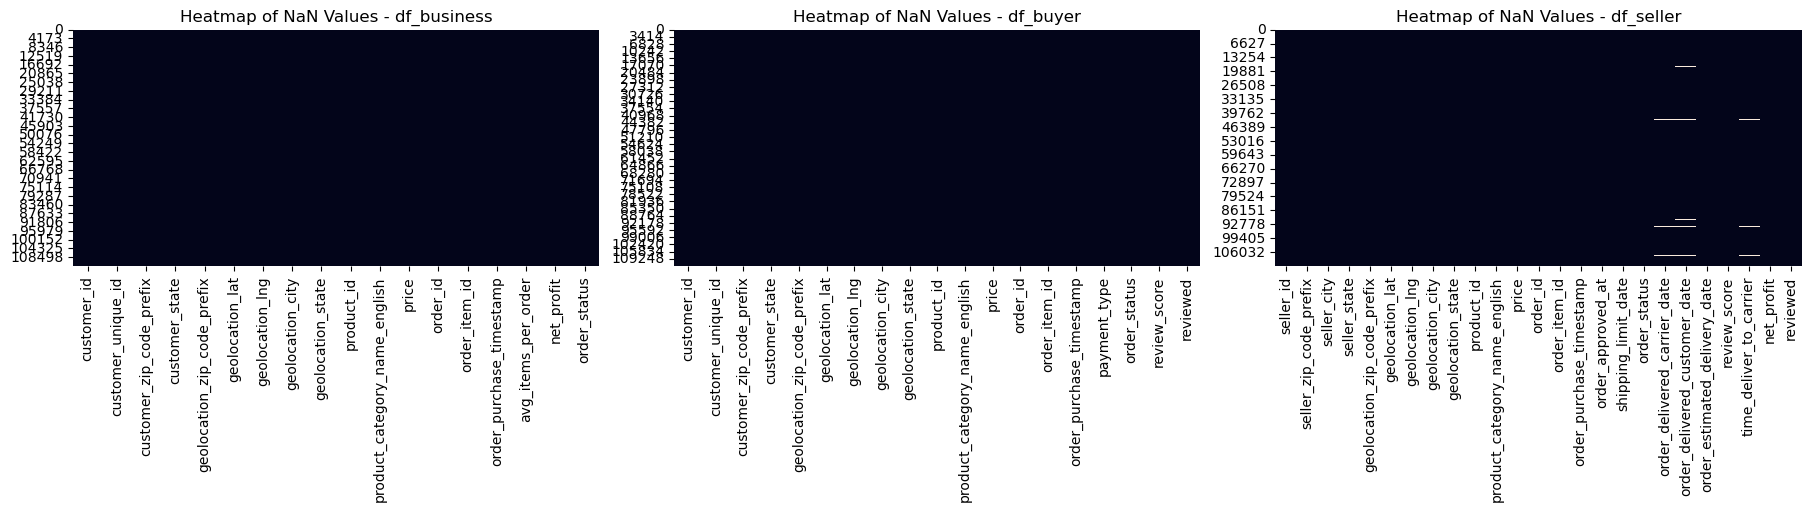

In [38]:
checknan()

### 2.5.order_delivered_carrier_date column

To estimate missing values in the `order_delivered_carrier_date` column, we will:  
1. Group the data by `seller_id` and calculate the median `time_deliver_to_carrier` for each seller
2. Fill missing values by adding this median to `order_approved_at` to approximate the expected `order_delivered_carrier_date`  

This approach ensures a data-driven estimation based on the seller's typical delivery time.  


In [39]:
df_seller[(df_seller['order_delivered_carrier_date'].isna())]

seller_id seller_zip_code_prefix  \
84      a2deecd5398f5df4987110c80a1972a3                   5043   
270     bf0d50a6410d487dc97d2baac0a8c0be                  13408   
422     b17b679f4f5ce2e03ce6968c62648246                  14090   
543     0adac9fbd9a2b63cccaac4f8756c1ca8                  13290   
558     0adac9fbd9a2b63cccaac4f8756c1ca8                  13290   
...                                  ...                    ...   
112143  4e2627090e6e5b9fabba883a37897683                  31565   
112144  4e2627090e6e5b9fabba883a37897683                  31565   
112145  4e2627090e6e5b9fabba883a37897683                  31565   
112146  4e2627090e6e5b9fabba883a37897683                  31565   
112421  6ee85be3693ed79a8e80718743d80655                   3937   

           seller_city seller_state geolocation_zip_code_prefix  \
84           sao paulo           SP                        5043   
270         piracicaba           SP                       13408   
422     ribeirao preto           SP                       14090   
543           louveira           SP                       13290   
558           louveira           SP                       13290   
...                ...          ...                         ...   
112143  belo horizonte           MG                       31565   
112144  belo horizonte           MG                       31565   
112145  belo horizonte           MG                       31565   
112146  belo horizonte           MG                       31565   
112421       sao paulo           SP                        3937   

        geolocation_lat  geolocation_lng geolocation_city geolocation_state  \
84           -23.525701       -46.691692        sao paulo                SP   
270          -22.672068       -47.695725       piracicaba                SP   
422          -21.179893       -47.788429   ribeirao preto                SP   
543          -23.085505       -46.959541         louveira                SP   
558          -23.085505       -46.959541         louveira                SP   
...                 ...              ...              ...               ...   
112143       -19.833900       -43.966790   belo horizonte                MG   
112144       -19.833900       -43.966790   belo horizonte                MG   
112145       -19.833900       -43.966790   belo horizonte                MG   
112146       -19.833900       -43.966790   belo horizonte                MG   
112421       -23.586003       -46.499638        são paulo                SP   

                              product_id product_category_name_english  \
84      c8e7c2ef329fcda4a233e7e2f8bb8b7d                    housewares   
270     66f09a6de4f2ef63aaf5349b60a0e0c0                          auto   
422     bb1fe952bdc16ef8974d4ca11aec19b7                 health_beauty   
543     bcac2cdcd851929a5caa3e1508d5abc9                    housewares   
558     ed08ea04c92f5f434c2362f7310fb328                    housewares   
...                                  ...                           ...   
112143  70adb75b3b2e86cffbb697c90867c3f3               furniture_decor   
112144  70adb75b3b2e86cffbb697c90867c3f3               furniture_decor   
112145  70adb75b3b2e86cffbb697c90867c3f3               furniture_decor   
112146  70adb75b3b2e86cffbb697c90867c3f3               furniture_decor   
112421  4228bf901c8db392cbffcbc1f14a13e2                   electronics   

         price                          order_id  order_item_id  \
84       39.90  00310b0c75bb13015ec4d82d341865a4              1   
270      27.90  00ae7a8b4936674ebb701d4a23719a79              1   
422     154.90  00ff0cf5583758e6964723e42f111bf4              1   
543     109.90  013e9c654a339d80b53513da3c1ea437              1   
558       5.53  0148d3df00cebda592d4e5f966e300cc              1   
...        ...                               ...            ...   
112143   39.90  fecc4ea5a3e06ce3192ae2f05b7a8439              1   
112144   39.90  fecc4ea5a3e06ce3192ae2f05b7a843

In [40]:
# We only fill data that order_status = delivered
df_seller[(df_seller['order_delivered_carrier_date'].isna()) & (df_seller['order_status'] == 'delivered')]

seller_id seller_zip_code_prefix seller_city  \
18554  3f2af2670e104d1bcb54022274daeac5                  87240   terra boa   
19838  f9bbdd976532d50b7816d285a22bd01e                   5319   sao paulo   

      seller_state geolocation_zip_code_prefix  geolocation_lat  \
18554           PR                       87240       -23.771858   
19838           SP                        5319       -23.541812   

       geolocation_lng geolocation_city geolocation_state  \
18554       -52.448328        terra boa                PR   
19838       -46.730687        sao paulo                SP   

                             product_id product_category_name_english  price  \
18554  44c2baf621113fa7ac95fa06b4afbc68               furniture_decor  179.0   
19838  30b5b5635a79548a48d04162d971848f                sports_leisure  179.0   

                               order_id  order_item_id  \
18554  2aa91108853cecb43c84a5dc5b277475              1   
19838  2d858f451373b04fb5c984a1cc2defaf              1   

      order_purchase_timestamp   order_approved_at shipping_limit_date  \
18554      2017-09-29 08:52:58 2017-09-29 09:07:16 2017-10-18 10:07:16   
19838      2017-05-25 23:22:43 2017-05-25 23:30:16 2017-06-04 23:30:16   

      order_status order_delivered_carrier_date order_delivered_customer_date  \
18554    delivered                          NaT           2017-11-20 19:44:47   
19838    delivered                          NaT                           NaT   

      order_estimated_delivery_date  review_score time_deliver_to_carrier  \
18554                    2017-11-14           5.0                     NaT   
19838                    2017-06-23           5.0                     NaT   

       net_profit  reviewed  
18554       32.22      True  
19838       32.22      True

In [41]:
df_order_delivered_carrier = df_seller.groupby('seller_id')['time_deliver_to_carrier'].median().reset_index()
df_order_delivered_carrier

seller_id time_deliver_to_carrier
0     0015a82c2db000af6aaaf3ae2ecb0532         1 days 17:28:47
1     001cca7ae9ae17fb1caed9dfb1094831         1 days 16:07:29
2     001e6ad469a905060d959994f1b41e4f                     NaT
3     002100f778ceb8431b7a1020ff7ab48f         2 days 17:36:04
4     003554e2dce176b5555353e4f3555ac8         0 days 12:34:01
...                                ...                     ...
3090  ffcfefa19b08742c5d315f2791395ee5                     NaT
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3         4 days 10:59:25
3092  ffeee66ac5d5a62fe688b9d26f83f534  3 days 19:27:12.500000
3093  fffd5413c0700ac820c7069d66d98c89         1 days 08:12:15
3094  ffff564a4f9085cd26170f4732393726                     NaT

[3095 rows x 2 columns]

In [42]:
# Checking before impute
check = df_seller.loc[(df_seller['order_delivered_carrier_date'].isna()) & (df_seller['order_status'] == 'delivered')]['order_delivered_carrier_date'].index
df_seller.iloc[check][['seller_id','order_delivered_carrier_date']]

seller_id order_delivered_carrier_date
18554  3f2af2670e104d1bcb54022274daeac5                          NaT
19838  f9bbdd976532d50b7816d285a22bd01e                          NaT

In [43]:
# Filling missing values by adding `order_approved_at` to the median `order_delivered_carrier_date` for the respective `seller_id`

mask = (df_seller['order_delivered_carrier_date'].isna()) & (df_seller['order_status'] == 'delivered')
df_seller.loc[mask, 
    'order_delivered_carrier_date'
] = df_seller['order_approved_at'] + df_seller['seller_id'].map(
    df_order_delivered_carrier.set_index('seller_id')['time_deliver_to_carrier']
)


In [44]:
df_seller.iloc[check][['seller_id','order_delivered_carrier_date']]

seller_id  order_delivered_carrier_date
18554  3f2af2670e104d1bcb54022274daeac5 2017-10-02 09:07:33.000000000
19838  f9bbdd976532d50b7816d285a22bd01e 1871-04-09 09:32:37.572612096

In [45]:
# Filter row that order_status isn't delivered
df_seller[(df_seller['order_delivered_carrier_date'].isna()) & (df_seller['order_status'] != 'delivered')][['seller_id','order_status','order_delivered_carrier_date']].head(10)

seller_id order_status  \
84   a2deecd5398f5df4987110c80a1972a3     canceled   
270  bf0d50a6410d487dc97d2baac0a8c0be     canceled   
422  b17b679f4f5ce2e03ce6968c62648246     canceled   
543  0adac9fbd9a2b63cccaac4f8756c1ca8     canceled   
558  0adac9fbd9a2b63cccaac4f8756c1ca8     canceled   
559  0adac9fbd9a2b63cccaac4f8756c1ca8     canceled   
560  0adac9fbd9a2b63cccaac4f8756c1ca8     canceled   
561  0adac9fbd9a2b63cccaac4f8756c1ca8     canceled   
562  0adac9fbd9a2b63cccaac4f8756c1ca8     canceled   
590  8a87611c08849ffeeccab52aa798b6c7     invoiced   

    order_delivered_carrier_date  
84                           NaT  
270                          NaT  
422                          NaT  
543                          NaT  
558                          NaT  
559                          NaT  
560                          NaT  
561                          NaT  
562                          NaT  
590                          NaT

We will retain `order_delivered_carrier_date` as NaN for orders with a status other than "Delivered" since these products were either not delivered, canceled, or still in transit.

### 2.6.order_delivered_customer_date column

For orders that have been delivered, we will fill missing `order_delivered_customer_date` values using `order_estimated_delivery_date`, assuming that the order arrived as estimated.  

For all other orders, we will keep it as NaN.  

In [46]:
# Getting the index for checking row that contain nan in order_delivered_customer_date with order_status = delivered

check = df_seller[(df_seller['order_delivered_customer_date'].isna()) & (df_seller['order_status'] == 'delivered')].index
df_seller.iloc[check][['seller_id','order_delivered_customer_date','order_status','order_estimated_delivery_date']]

seller_id order_delivered_customer_date  \
5841    8bdd8e3fd58bafa48af76b2c5fd71974                           NaT   
14472   343e716476e3748b069f980efbaa294e                           NaT   
19642   8581055ce74af1daba164fdbd55a40de                           NaT   
19838   f9bbdd976532d50b7816d285a22bd01e                           NaT   
20393   58f1a6197ed863543e0136bdedb3fce2                           NaT   
75303   ed4acab38528488b65a9a9c603ff024a                           NaT   
101642  58f1a6197ed863543e0136bdedb3fce2                           NaT   
108192  0bb738e4d789e63e2267697c42d35a2d                           NaT   

       order_status order_estimated_delivery_date  
5841      delivered                    2018-07-24  
14472     delivered                    2018-07-19  
19642     delivered                    2017-12-18  
19838     delivered                    2017-06-23  
20393     delivered                    2018-07-30  
75303     delivered                    2018-06-26  
101642    delivered                    2018-07-30  
108192    delivered                    2018-07-16

In [47]:
# Filling missing values by copyng order_estimated_delivery_date to order_delivered_customer_date

mask = (df_seller['order_delivered_customer_date'].isna()) & (df_seller['order_status'] == 'delivered')

df_seller.loc[mask, 'order_delivered_customer_date'] = df_seller.loc[mask, 'order_estimated_delivery_date']


In [48]:
df_seller.iloc[check][['seller_id','order_delivered_customer_date','order_status','order_estimated_delivery_date']]

seller_id order_delivered_customer_date  \
5841    8bdd8e3fd58bafa48af76b2c5fd71974                    2018-07-24   
14472   343e716476e3748b069f980efbaa294e                    2018-07-19   
19642   8581055ce74af1daba164fdbd55a40de                    2017-12-18   
19838   f9bbdd976532d50b7816d285a22bd01e                    2017-06-23   
20393   58f1a6197ed863543e0136bdedb3fce2                    2018-07-30   
75303   ed4acab38528488b65a9a9c603ff024a                    2018-06-26   
101642  58f1a6197ed863543e0136bdedb3fce2                    2018-07-30   
108192  0bb738e4d789e63e2267697c42d35a2d                    2018-07-16   

       order_status order_estimated_delivery_date  
5841      delivered                    2018-07-24  
14472     delivered                    2018-07-19  
19642     delivered                    2017-12-18  
19838     delivered                    2017-06-23  
20393     delivered                    2018-07-30  
75303     delivered                    2018-06-26  
101642    delivered                    2018-07-30  
108192    delivered                    2018-07-16

In [49]:
# Filter row that order_status isn't delivered
df_seller[(df_seller['order_delivered_customer_date'].isna()) & (df_seller['order_status'] != 'delivered')][['seller_id','order_delivered_customer_date','order_status','order_estimated_delivery_date']].head(10)

seller_id order_delivered_customer_date  \
79   1835b56ce799e6a4dc4eddc053f04066                           NaT   
84   a2deecd5398f5df4987110c80a1972a3                           NaT   
260  974cf2cb8f4b7add98709c30df02fe10                           NaT   
270  bf0d50a6410d487dc97d2baac0a8c0be                           NaT   
422  b17b679f4f5ce2e03ce6968c62648246                           NaT   
543  0adac9fbd9a2b63cccaac4f8756c1ca8                           NaT   
553  1c129092bf23f28a5930387c980c0dfc                           NaT   
558  0adac9fbd9a2b63cccaac4f8756c1ca8                           NaT   
559  0adac9fbd9a2b63cccaac4f8756c1ca8                           NaT   
560  0adac9fbd9a2b63cccaac4f8756c1ca8                           NaT   

    order_status order_estimated_delivery_date  
79       shipped                    2018-04-16  
84      canceled                    2018-08-29  
260      shipped                    2018-09-18  
270     canceled                    2018-05-17  
422     canceled                    2017-05-04  
543     canceled                    2017-07-07  
553      shipped                    2018-02-01  
558     canceled                    2017-09-11  
559     canceled                    2017-09-11  
560     canceled                    2017-09-11

We will retain `order_delivered_customer_date` as NaN for orders with a status other than "Delivered" since these products were either not delivered, canceled, or still in transit.

### 2.7. time_deliver_to_carrier column

We will drop this column for now and reintroduce it after cleaning all other columns in the next step: **Cleaning Outliers**.

In [50]:
# Drop column time_deliver_to_carrier
df_seller.drop(columns='time_deliver_to_carrier',inplace=True)

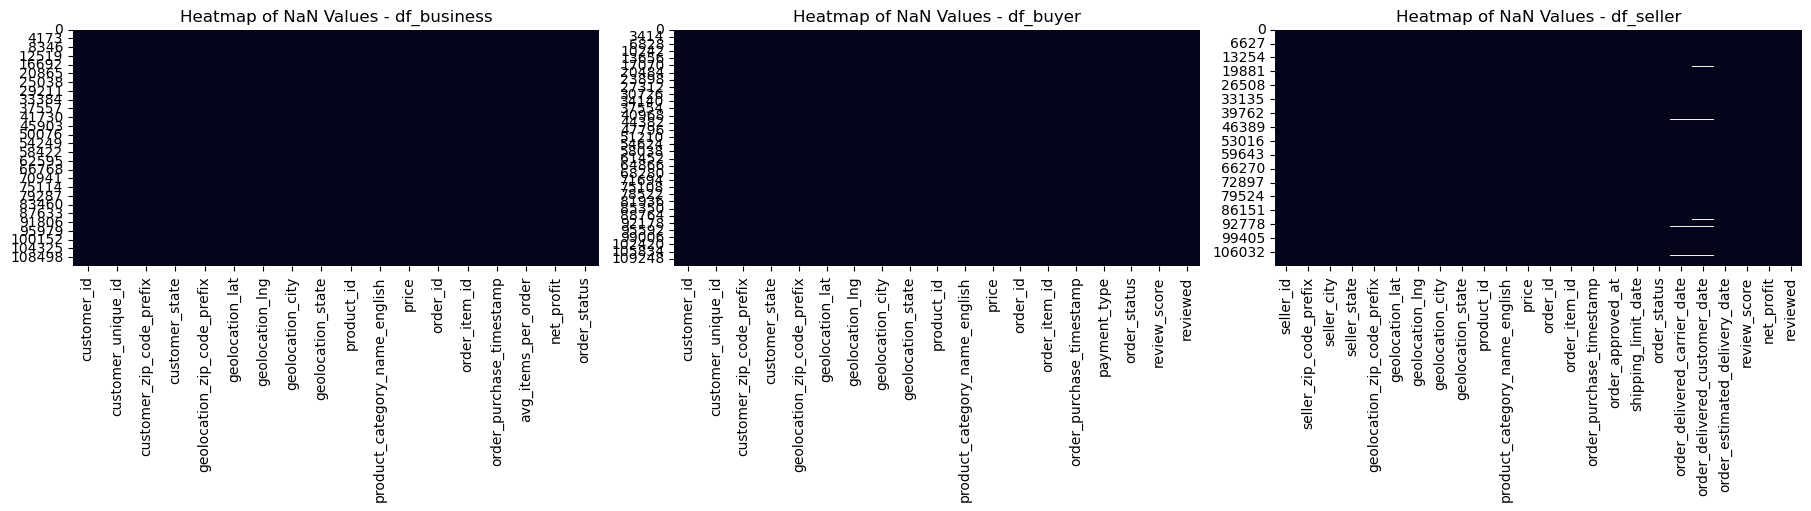

In [51]:
checknan()

### 2.8. Checking Remaining NaN Values

The `df_seller` dataset still contains NaN values in `order_delivered_carrier_date` and `order_delivered_customer_date`, all of which come from orders that have not yet been delivered.  

Next, we will filter out these undelivered orders to verify the remaining data.

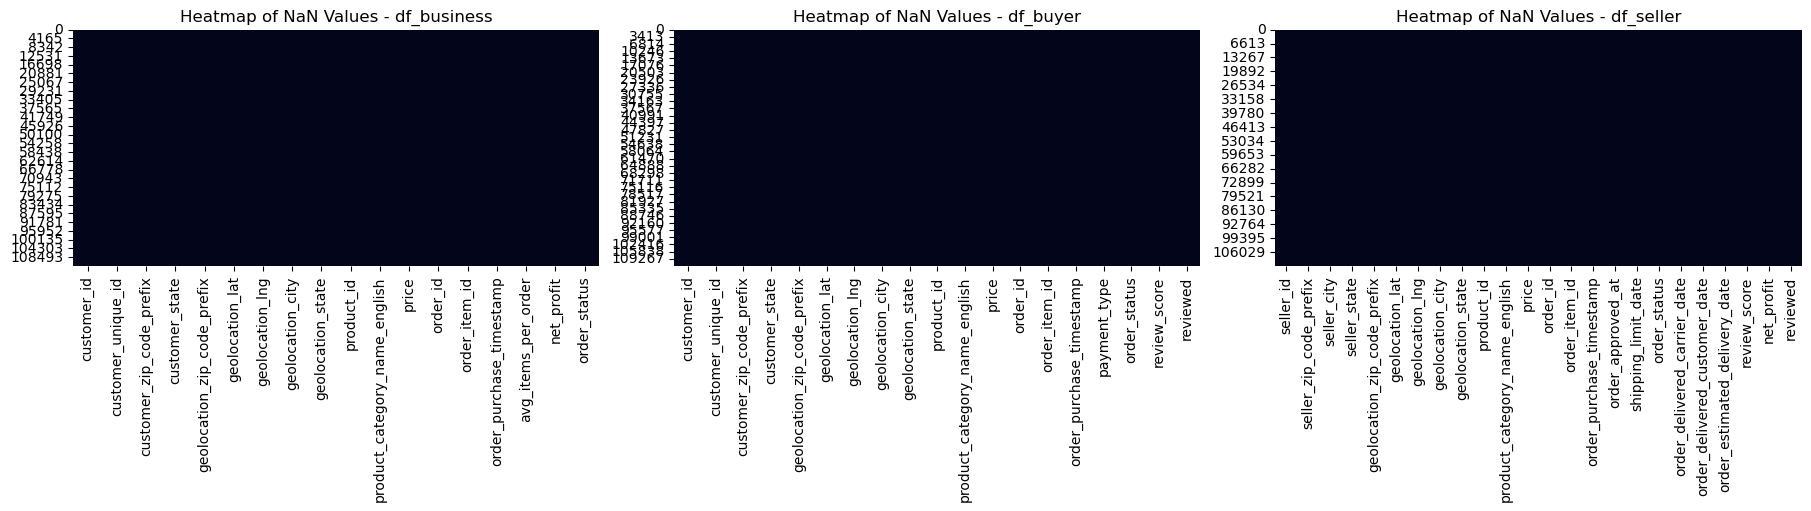

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Plot heatmaps for each DataFrame
sns.heatmap(df_business.query("order_status=='delivered'").isna(), cbar=False, ax=axes[0])
axes[0].set_title('Heatmap of NaN Values - df_business')

sns.heatmap(df_buyer.query("order_status=='delivered'").isna(), cbar=False, ax=axes[1])
axes[1].set_title('Heatmap of NaN Values - df_buyer')

sns.heatmap(df_seller.query("order_status=='delivered'").isna(), cbar=False, ax=axes[2])
axes[2].set_title('Heatmap of NaN Values - df_seller')
plt.show()

As we can see, all NaN values in the dataset have been successfully handled and cleared.


<hr>

## **3. Cleaning Outlier**

### 3.1. Price column

The data is right-skewed, but after analyzing the product categories, it still makes sense to leave it as is. Additionally, since product names are hashed, we cannot cross-check prices on the internet.  

We assume these products are luxury items and exist as one-of-a-kind in the dataset.

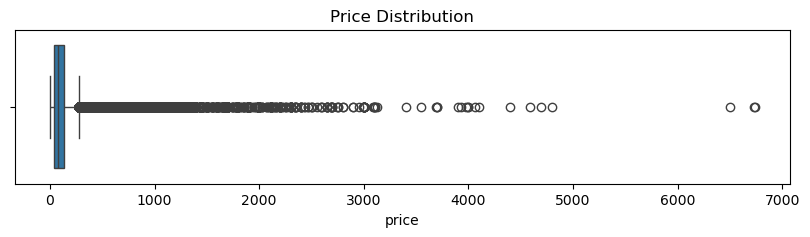

In [53]:
plt.figure(figsize=(10,2))
plt.title('Price Distribution')
sns.boxplot(data=df_business,x='price')
plt.show()

In [54]:
df_business[df_business['price']>3200][['product_category_name_english','price']].sort_values(by='price',ascending=False).head(10)

product_category_name_english    price
3556                      housewares  6735.00
112233                     computers  6729.00
107841                           art  6499.00
74336               small_appliances  4799.00
11249               small_appliances  4690.00
62086                      computers  4590.00
29193            musical_instruments  4399.87
45843                 consoles_games  4099.99
78310                 sports_leisure  4059.00
59137                  watches_gifts  3999.90

### 3.2. Date-Related Columns  

Here, we will examine all columns that contain date and time information:  

a. `order_purchase_timestamp`  
b. `order_approved_at`  
c. `shipping_limit_date`  
d. `order_delivered_carrier_date`  
e. `order_delivered_customer_date`  
f. `order_estimated_delivery_date`  
g. `time_deliver_to_carrier`  

#### 3.2.a.order_purchase_timestamp column

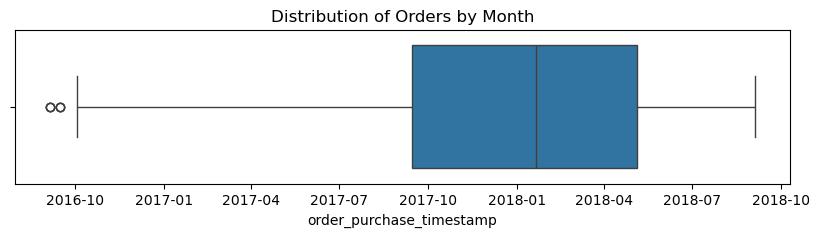

In [55]:
plt.figure(figsize=(10,2))
plt.title("Distribution of Orders by Month")
sns.boxplot(x=df_seller['order_purchase_timestamp'])
plt.show()


In [56]:
# we select the order_id that 
outlier = df_seller[df_seller['order_purchase_timestamp'] < '2016-10-01']['order_id']
outlier

20265     2e7a8482f6fb09756ca50c10d7bfc047
20266     2e7a8482f6fb09756ca50c10d7bfc047
84389     bfbd0f9bdef84302105ad712db648a6c
84390     bfbd0f9bdef84302105ad712db648a6c
84391     bfbd0f9bdef84302105ad712db648a6c
101394    e5fa5a7210941f7d56d0208e4e071d35
Name: order_id, dtype: object

In [57]:
# View what data that fall into outlier
df_business[df_business['order_id'].isin(outlier)][['order_id','order_purchase_timestamp']]

order_id order_purchase_timestamp
20265   2e7a8482f6fb09756ca50c10d7bfc047      2016-09-04 21:15:19
20266   2e7a8482f6fb09756ca50c10d7bfc047      2016-09-04 21:15:19
84389   bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38
84390   bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38
84391   bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38
101394  e5fa5a7210941f7d56d0208e4e071d35      2016-09-05 00:15:34

Since this data only covers three days in a month, we will drop these rows as they have minimal impact on the analysis.

In [58]:
# Dropping row data from 2016 Sept
df_business = df_business[~df_business['order_id'].isin(outlier)]
df_seller = df_seller[~df_seller['order_id'].isin(outlier)]
df_buyer = df_buyer[~df_buyer['order_id'].isin(outlier)]


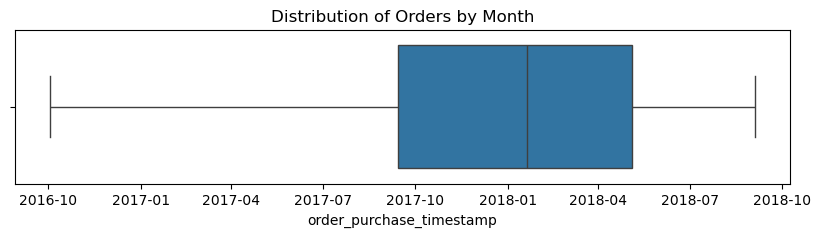

In [59]:
plt.figure(figsize=(10,2))
plt.title("Distribution of Orders by Month")
sns.boxplot(x=df_seller['order_purchase_timestamp'])
plt.show()

#### 3.2.b.order_approved_at column

All data in the `order_purchase_timestamp` column appears normal, with no detected outliers.

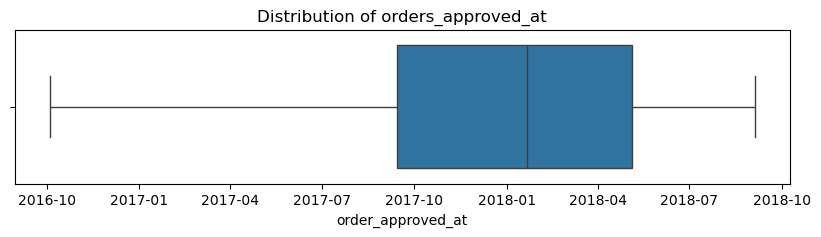

In [60]:
plt.figure(figsize=(10,2))
plt.title("Distribution of orders_approved_at")
sns.boxplot(x=df_seller['order_approved_at'])
plt.show()


#### 3.2.c. shipping_limit_date column

The `shipping_limit_date` column contains outliers. To address this, we will:  

1. Calculate the median `shipping_limit_date` by finding the difference between `shipping_limit_date` and `order_approved_at`.  
2. Fix the outliers by adding this median value to `order_approved_at` to obtain a corrected `shipping_limit_date`.

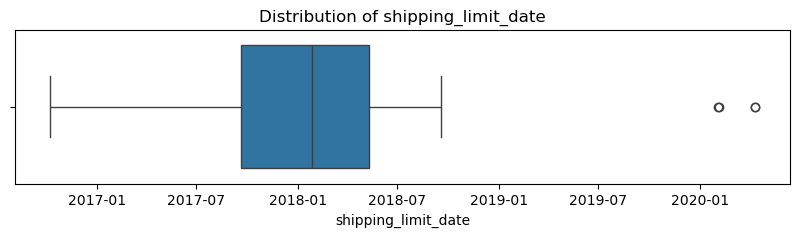

In [61]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_seller['shipping_limit_date'])
plt.title("Distribution of shipping_limit_date")
plt.show()


In [62]:
df_seller[df_seller['shipping_limit_date'] > '2019-01-01'][['order_purchase_timestamp','order_approved_at','shipping_limit_date','order_status']]

order_purchase_timestamp   order_approved_at shipping_limit_date  \
8643       2017-03-16 02:30:51 2017-03-16 02:30:51 2020-02-05 03:30:51   
68516      2017-03-14 19:23:22 2017-03-14 19:23:22 2020-02-03 20:23:22   
85729      2017-05-23 22:28:36 2017-05-24 22:35:08 2020-04-09 22:35:08   
85730      2017-05-23 22:28:36 2017-05-24 22:35:08 2020-04-09 22:35:08   

      order_status  
8643      canceled  
68516      shipped  
85729    delivered  
85730    delivered

In [63]:
# Calculate median of average shipping limit date
average_shipping_limit_date = df_seller['shipping_limit_date']-df_seller['order_approved_at']
print(f'Median limit for shipping is : {average_shipping_limit_date.median()}')

Median limit for shipping is : 6 days 00:00:00


In [64]:
# Fill shipping_limit_date by adding order_approved_at and median of average_shipping_limit_date
df_seller.loc[
    (df_seller['shipping_limit_date'] > '2019-01-01'),
    'shipping_limit_date'
] = df_seller['order_approved_at'] + average_shipping_limit_date.median()

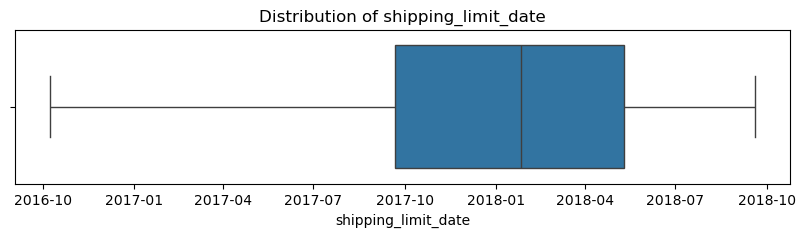

In [65]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_seller['shipping_limit_date'])
plt.title("Distribution of shipping_limit_date")
plt.show()

#### 3.2.d.order_delivered_carrier_date column

The `order_delivered_carrier_date` column contains outliers. To fix this, we will reference the `seller_id` and correct the erroneous values by using `order_id` data from the same `seller_id`.

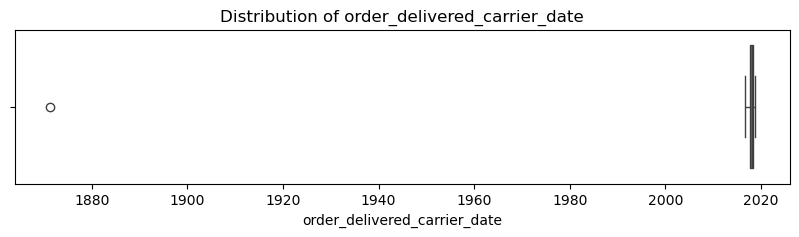

In [66]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_seller['order_delivered_carrier_date'])
plt.title("Distribution of order_delivered_carrier_date")
plt.show()

In [67]:
# Seller that got outlier order_delivered_carrier_date
df_seller[df_seller['order_delivered_carrier_date'] < '2000-01-01']

seller_id seller_zip_code_prefix seller_city  \
19838  f9bbdd976532d50b7816d285a22bd01e                   5319   sao paulo   

      seller_state geolocation_zip_code_prefix  geolocation_lat  \
19838           SP                        5319       -23.541812   

       geolocation_lng geolocation_city geolocation_state  \
19838       -46.730687        sao paulo                SP   

                             product_id product_category_name_english  price  \
19838  30b5b5635a79548a48d04162d971848f                sports_leisure  179.0   

                               order_id  order_item_id  \
19838  2d858f451373b04fb5c984a1cc2defaf              1   

      order_purchase_timestamp   order_approved_at shipping_limit_date  \
19838      2017-05-25 23:22:43 2017-05-25 23:30:16 2017-06-04 23:30:16   

      order_status  order_delivered_carrier_date  \
19838    delivered 1871-04-09 09:32:37.572612096   

      order_delivered_customer_date order_estimated_delivery_date  \
19838                    2017-06-23                    2017-06-23   

       review_score  net_profit  reviewed  
19838           5.0       32.22      True

In [68]:
# Calculate median of seller_id order_delivered_carrier_date by refereing to ther order by the same seller_id
time_to_carrier = df_seller.query(f"seller_id=='f9bbdd976532d50b7816d285a22bd01e' & index!={df_seller[df_seller['order_delivered_carrier_date'] < '2000-01-01'].index.values[0]}")[['order_approved_at','order_delivered_carrier_date']]
(time_to_carrier['order_delivered_carrier_date']-time_to_carrier['order_approved_at']).dt.days

7246    6
dtype: int64

In [69]:
df_seller.loc[
    df_seller['order_delivered_carrier_date'] < '2000-01-01',
    'order_delivered_carrier_date'
] = df_seller['order_approved_at'] + pd.to_timedelta(
    (time_to_carrier['order_delivered_carrier_date'] - time_to_carrier['order_approved_at']).dt.days, unit='D'
)


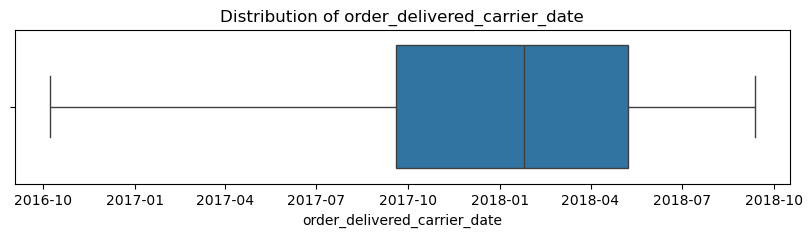

In [70]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_seller['order_delivered_carrier_date'])
plt.title("Distribution of order_delivered_carrier_date")
plt.show()

#### 3.2.e.order_delivered_customer_date column

There are outliers in the `order_delivered_customer_date` column. However, after reviewing the data, all values appear reasonable, so we will not make any modifications.

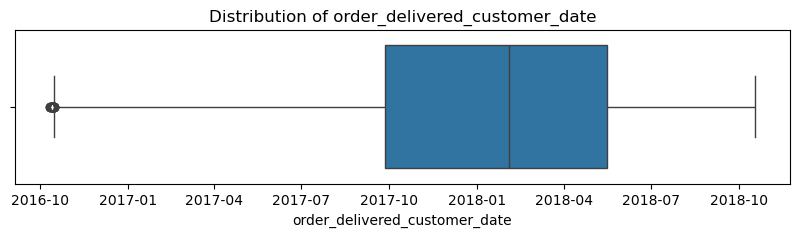

In [71]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_seller['order_delivered_customer_date'])
plt.title("Distribution of order_delivered_customer_date")
plt.show()

In [72]:
def quantiles(dataframe = df_seller ,columns="order_delivered_customer_date"):
    Q1 = dataframe[columns].quantile(0.25)
    Q2 = dataframe[columns].quantile(0.5)
    Q3 = dataframe[columns].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + IQR * 1.5 
    lower_bound = Q1 - IQR * 1.5
    return Q1,Q2,Q3,IQR,upper_bound,lower_bound

value = quantiles(dataframe=df_seller,columns='order_delivered_customer_date')

print(f'''Lower Bound = {value[5]}''')

Lower Bound = 2016-10-15 08:02:51.500000


In [73]:
df_seller[df_seller['order_purchase_timestamp']<=value[5]][['seller_id','order_id','order_delivered_customer_date','order_status']]

seller_id                          order_id  \
908     46dc3b2cc0980fb8ec44634e21d2718e  02190241f7190a1f3c7e0df95a749c6a   
909     46dc3b2cc0980fb8ec44634e21d2718e  02190241f7190a1f3c7e0df95a749c6a   
911     ffff564a4f9085cd26170f4732393726  021d08e4057e5b6414c8d2f69f4f72a0   
1138    83e197e95a1bbabc8c75e883ed016c47  02a0eb7c22b0616c767a45954a2a28f6   
1320    c7dcd301ecfe5ab7f778ac172cf74be7  03128233e78ed8ade6738f2043f4cf8d   
...                                  ...                               ...   
109873  ecccfa2bb93b34a3bf033cc5d1dcdc69  f9b03f7a6e5788ffb6cb6b4cd0d01892   
109906  f5b84683a9bf9e1df748cf40f601b39c  f9c44da06151c190a9a6c9c712873d10   
110607  0db783cfcd3b73998abc6e10e59a102f  fb5114c39f632a52598cf770c6076620   
110800  ecccfa2bb93b34a3bf033cc5d1dcdc69  fbbc9a4fa88f1ccd651790df665b3e57   
111500  827f8f69dfa529c561901c4f2e0f332f  fd4b04818375a4ba579a80c8d37f1b24   

       order_delivered_customer_date order_status  
908              2016-10-27 09:37:52    delivered  
909              2016-10-27 09:37:52    delivered  
911              2016-10-30 01:25:57    delivered  
1138                             NaT     invoiced  
1320             2016-10-31 17:06:03    delivered  
...                              ...          ...  
109873           2016-11-16 14:13:37    delivered  
109906           2016-10-15 15:09:06    delivered  
110607           2016-10-19 17:31:37    delivered  
110800           2016-10-28 17:05:47    delivered  
111500           2016-10-19 00:47:36    delivered  

[363 rows x 4 columns]

#### 3.2.f. order_estimated_delivery_date column

All data in the `order_estimated_delivery_date` column appears normal, with no detected outliers.

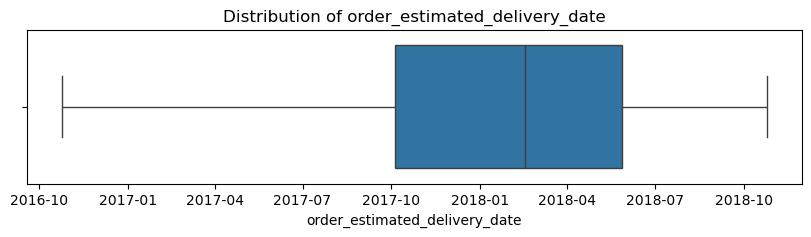

In [74]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_seller['order_estimated_delivery_date'])
plt.title("Distribution of order_estimated_delivery_date")
plt.show()

#### 3.2.g. time_deliver_to_carrier Column  

We will create a new column to indicate whether the seller sent the order **on time** or **late**. 

This is determined by subtracting `order_delivered_carrier_date` - `shipping_limit_date` — if the result is negative, the order was early.  

During this process, we identified some data inconsistencies, such as:  

- **`order_delivered_carrier_date` earlier than `order_purchase_timestamp`** → The order was marked as delivered to the carrier before the buyer made the purchase.  
- **`order_delivered_customer_date` earlier than `order_approved_at`** → The order was delivered before the seller even approved it.  
- `shipping_limit_date` earlier than `order_approved_at` → seller deliver the order first after that approved the order 

To improve data accuracy and reliability, we made necessary adjustments to correct these errors.  

##### 3.2.g.1. order_purchase_timestamp > order_delivered_carrier_date

If a seller delivers to the carrier before the `order_purchase_timestamp` (with a margin of 1 day), we will correct this by setting `order_delivered_carrier_date` to match `shipping_limit_date`.  

In [75]:
# Filtering row that contain order_purchase_timestamp > order_delivered_carrier_date
check = df_seller[df_seller['order_purchase_timestamp']> (df_seller['order_delivered_carrier_date'] + pd.Timedelta(days=1))].index
df_seller.loc[check][['order_purchase_timestamp','order_delivered_carrier_date','order_delivered_carrier_date']]

order_purchase_timestamp order_delivered_carrier_date  \
28173      2018-08-18 11:49:40          2018-08-14 06:22:00   
54690      2018-07-16 18:40:53          2018-01-26 13:35:00   

      order_delivered_carrier_date  
28173          2018-08-14 06:22:00  
54690          2018-01-26 13:35:00

In [76]:
# Fill order_delivered_carrier_date with shipping_limit_date
mask = df_seller['order_purchase_timestamp'] > df_seller['order_delivered_carrier_date'] + pd.Timedelta(days=1)

df_seller.loc[mask, 'order_delivered_carrier_date'] = df_seller.loc[mask, 'shipping_limit_date']


In [77]:
# Checking the column already filled
df_seller.loc[check][['order_purchase_timestamp','order_delivered_carrier_date','order_delivered_carrier_date']]

order_purchase_timestamp order_delivered_carrier_date  \
28173      2018-08-18 11:49:40          2018-08-23 12:10:30   
54690      2018-07-16 18:40:53          2018-07-20 18:50:22   

      order_delivered_carrier_date  
28173          2018-08-23 12:10:30  
54690          2018-07-20 18:50:22

##### 3.2.g.2. order_approved_at > order_delivered_customer_date

We will first check the difference:  

order_delivered_carrier_date - shipping_limit_date

If the result is earlier than **-6 days**, we can confirm that the data is incorrect. To fix this, we will recalculate it by adding **6 days** to `order_purchase_timestamp`.  

The **6-day adjustment** comes from calculating the median of `late_days_to_carrier` and adding **2 extra days** to account for weekends.

In [78]:
# Calculate late_days_to_carrier
df_seller['late_days_to_carrier'] = (df_seller['order_delivered_carrier_date'] - df_seller['shipping_limit_date']).dt.days


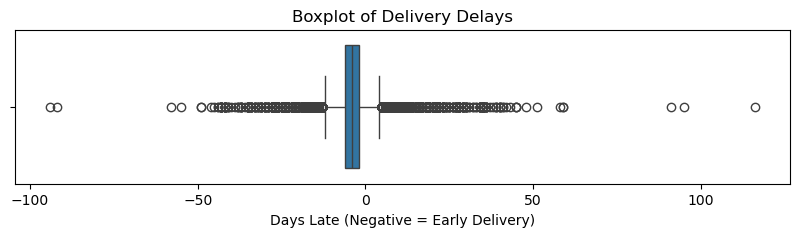

In [79]:
# Create boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_seller['late_days_to_carrier'])
plt.xlabel("Days Late (Negative = Early Delivery)")
plt.title("Boxplot of Delivery Delays")
plt.show()

In [80]:
value = quantiles(dataframe=df_seller,columns='late_days_to_carrier')

print(f'''
Q1 = {value[0]}
Q2 = {value[1]}
Q3 = {value[2]}
IQR = {value[3]}
Upper Bound = {value[4]}
Lower Bound = {value[5]}
''')


Q1 = -6.0
Q2 = -4.0
Q3 = -2.0
IQR = 4.0
Upper Bound = 4.0
Lower Bound = -12.0



We will set a **maximum early shipping limit** of **-6 days**

This means that the earliest possible shipping time is **6 days before the expected limit**. 

In [81]:
# Filtering late_day_to_carrier earlier than 6 days
print(f'Total Data : {df_seller[df_seller['late_days_to_carrier']<-6].sort_values(ascending=True,by='late_days_to_carrier').shape[0]}')
df_seller[df_seller['late_days_to_carrier']<=-6].sort_values(ascending=True,by='late_days_to_carrier')

Total Data : 14290


seller_id seller_zip_code_prefix  seller_city  \
28492   1354d51653f645349064725ed204e85e                   1230    sao paulo   
87724   fce62094ffe6a4009188ec44e681dfdd                   4674    sao paulo   
29936   9baf5cb77970f539089d09a38bcec5c3                  13330   indaiatuba   
101719  4d6d651bd7684af3fffabd5f08d12e5a                  17209          jau   
75681   41b39e28db005d9731d9d485a83b4c38                   9220  santo andre   
...                                  ...                    ...          ...   
48374   abcd2cb37d46c2c8fb1bf071c859fc5b                  78020       cuiaba   
48373   6560211a19b47992c3666cc44a7e94c0                   5849    sao paulo   
48359   080199a181c46c657dc5aa235411be3b                   6097       osasco   
48341   b2eecf5ea250510da76590ca79d60e5d                   3318    sao paulo   
112648  2b3e4a2a3ea8e01938cabda2a3e5cc79                   4733    sao paulo   

       seller_state geolocation_zip_code_prefix  geolocation_lat  \
28492            SP                        1230       -23.536310   
87724            SP                        4674       -23.663855   
29936            SP                       13330       -23.086339   
101719           SP                       17209       -22.275249   
75681            SP                        9220       -23.622288   
...             ...                         ...              ...   
48374            MT                       78020       -15.602882   
48373            SP                        5849       -23.652366   
48359            SP                        6097       -23.528549   
48341            SP                        3318       -23.544377   
112648           SP                        4733       -23.635530   

        geolocation_lng geolocation_city geolocation_state  \
28492        -46.657112        sao paulo                SP   
87724        -46.685792        sao paulo                SP   
29936        -47.216887       indaiatuba                SP   
101719       -48.543584              jau                SP   
75681        -46.536901      santo andré                SP   
...                 ...              ...               ...   
48374        -56.102861           cuiaba                MT   
48373        -46.755753        sao paulo                SP   
48359        -46.779788           osasco                SP   
48341        -46.565376        sao paulo                SP   
112648       -46.694031        são paulo                SP   

                              product_id product_category_name_english  \
28492   38841dec90eddf2f43cdfabc48b3831a                           art   
87724   ee2f96cb63d491d963a67285f048775a                  market_place   
29936   6d01fb6c593d9afd887262570b656f9e                  market_place   
101719  7b35ccd93a2184646c03b70326626923                sports_leisure   
75681   a75142054d1e335a68625bb7f3c2f130                bed_bath_table   
...                                  ...                           ...   
48374   607fc06d7055bbb7c7649810df3bc0fe                 health_beauty   
48373   2cbc1ae9dc8c4d81b096db0ee01ae0e6                 watches_gifts   
48359   8b4a33d7c554bbe096de11bb33ce6f4a                          auto   
48341   b353757638aa1d936e2e3b3940dc695b           musical_instruments   
112648  9c422a519119dcad7575db5af1ba540e         computers_accessories   

         price                          order_id  order_item_id  \
28492    40.00  40dc2ba6f322a17626aac6244332828c              1   
87724    25.90  c72727d29cde4cf870d569bf65edabfd              1   
29936   189.99  440b5d8129165b7e04b3c37e3a5e93d7              1   
101719  113.00  e6cc57f923c4dab2222b8c9aa8742eea              1   
75681   134.90  ac5222f836286b33e7240030ad79d7c9              1   
...        ...                               ...            ...   
48374    39.80  6df963d6ce20c72cb119e8090f27c011              1   
48373    29.00  6df84b84d593ebbd9922b07135002bee              1   
48359   179.49  

In [82]:
# Filtering and filling shipping_limit_date by adding 6 days to order_purchase_timestamp

mask = df_seller['late_days_to_carrier']<-6

df_seller.loc[mask, 'shipping_limit_date'] = df_seller.loc[mask, 'order_purchase_timestamp'] + pd.Timedelta(days=6)


In [83]:
# Checking if the shipping_limit_date already fixed
df_seller[df_seller['late_days_to_carrier']<=-6].sort_values(ascending=True,by='late_days_to_carrier')[['seller_id','order_purchase_timestamp','shipping_limit_date']]

seller_id order_purchase_timestamp  \
28492   1354d51653f645349064725ed204e85e      2017-10-05 21:39:05   
87724   fce62094ffe6a4009188ec44e681dfdd      2017-02-07 18:01:15   
29936   9baf5cb77970f539089d09a38bcec5c3      2017-05-21 08:01:31   
101719  4d6d651bd7684af3fffabd5f08d12e5a      2018-02-07 12:09:45   
75681   41b39e28db005d9731d9d485a83b4c38      2017-11-06 21:36:16   
...                                  ...                      ...   
48374   abcd2cb37d46c2c8fb1bf071c859fc5b      2018-07-27 23:07:33   
48373   6560211a19b47992c3666cc44a7e94c0      2018-05-12 12:53:29   
48359   080199a181c46c657dc5aa235411be3b      2018-04-17 21:39:07   
48341   b2eecf5ea250510da76590ca79d60e5d      2017-07-25 22:23:05   
112648  2b3e4a2a3ea8e01938cabda2a3e5cc79      2017-08-14 23:02:59   

       shipping_limit_date  
28492  2017-10-11 21:39:05  
87724  2017-02-13 18:01:15  
29936  2017-05-27 08:01:31  
101719 2018-02-13 12:09:45  
75681  2017-11-12 21:36:16  
...                    ...  
48374  2018-08-06 04:05:53  
48373  2018-05-21 05:14:44  
48359  2018-04-24 06:12:00  
48341  2017-08-02 23:04:02  
112648 2017-08-21 00:04:32  

[32548 rows x 3 columns]

##### 3.2.g.3. order_approved_at > order_delivered_customer_date

For cases where `shipping_limit_date` is earlier than `order_approved_at`, we will correct it by filling the value using the **average order approval time** for the respective `seller_id`.

In [84]:
# Filtering shipping_limit_date < order_approved_at
check = df_seller[df_seller['shipping_limit_date'] < df_seller['order_approved_at']].index
df_seller.loc[check][['seller_id','order_approved_at','shipping_limit_date']].head()

seller_id   order_approved_at shipping_limit_date
67    ea8482cd71df3c1969d7b9473ff13abc 2018-07-28 23:30:59 2018-07-26 17:44:36
655   e333046ce6517bd8bb510291d44f0130 2017-09-13 22:17:15 2017-09-07 22:31:42
1111  4869f7a5dfa277a7dca6462dcf3b52b2 2017-03-23 16:10:18 2017-03-22 15:16:53
1644  8d956fec2e4337affcb520f56fd8cbfd 2018-07-27 23:31:15 2018-07-26 04:25:19
1941  e0a366315b1b726b6c7832d664c0f530 2018-07-05 16:40:30 2018-07-05 11:31:12

In [85]:
# Filtering and filling shipping_limit_date < order_approved_at

mask = df_seller['shipping_limit_date'] < df_seller['order_approved_at']

df_seller.loc[mask, 'order_approved_at'] = df_seller.loc[mask, 'order_purchase_timestamp'] + df_seller['seller_id'].map(df_order_approved_at.set_index('seller_id')['time_to_approved'])

In [86]:
# Checking  order approved at is smaller than shipping limit date
df_seller.loc[check][['seller_id','order_approved_at','shipping_limit_date']].head()

seller_id       order_approved_at  \
67    ea8482cd71df3c1969d7b9473ff13abc 2018-07-23 17:50:21.000   
655   e333046ce6517bd8bb510291d44f0130 2017-09-01 20:38:52.500   
1111  4869f7a5dfa277a7dca6462dcf3b52b2 2017-03-16 15:38:17.000   
1644  8d956fec2e4337affcb520f56fd8cbfd 2018-07-22 16:46:41.000   
1941  e0a366315b1b726b6c7832d664c0f530 2018-07-03 10:56:17.000   

     shipping_limit_date  
67   2018-07-26 17:44:36  
655  2017-09-07 22:31:42  
1111 2017-03-22 15:16:53  
1644 2018-07-26 04:25:19  
1941 2018-07-05 11:31:12

In [87]:
df_seller[df_seller['late_days_to_carrier']<0].sort_values(by='late_days_to_carrier',ascending=True)[['seller_id','late_days_to_carrier']]

seller_id  late_days_to_carrier
28492   1354d51653f645349064725ed204e85e                 -94.0
87724   fce62094ffe6a4009188ec44e681dfdd                 -92.0
29936   9baf5cb77970f539089d09a38bcec5c3                 -58.0
101719  4d6d651bd7684af3fffabd5f08d12e5a                 -55.0
75681   41b39e28db005d9731d9d485a83b4c38                 -49.0
...                                  ...                   ...
56832   7aa4334be125fcdd2ba64b3180029f14                  -1.0
42961   37515688008a7a40ac93e3b2e4ab203f                  -1.0
42959   ffad1e7127fb622cb64a900751590acd                  -1.0
104245  1025f0e2d44d7041d6cf58b6550e0bfa                  -1.0
12610   6b536a23086fba0d58c08d68814397f6                  -1.0

[100889 rows x 2 columns]

After correcting `shipping_limit_date`, we will **recalculate late_days_to_carrier** to ensure data consistency and accuracy.  

In [88]:
# Recalculate late_days_to_carrier
df_seller['late_days_to_carrier'] = (df_seller['order_delivered_carrier_date'].dt.normalize() - 
                                     df_seller['shipping_limit_date'].dt.normalize()).dt.days

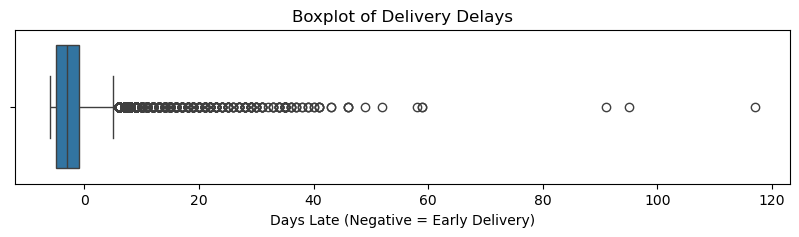

In [89]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_seller['late_days_to_carrier'])
plt.xlabel("Days Late (Negative = Early Delivery)")
plt.title("Boxplot of Delivery Delays")
plt.show()

Although there are still shipments that are delivered earlier, they remain reasonable as long as they are within 6 days before the `shipping_limit_date`.

### 3.2.h.is_late_to_carrier column

In [90]:
# Assign True and False, if late_days_to_carrier > 0 True which is Late, negative mean early
df_seller['is_late_to_carrier'] = df_seller['late_days_to_carrier'] > 0

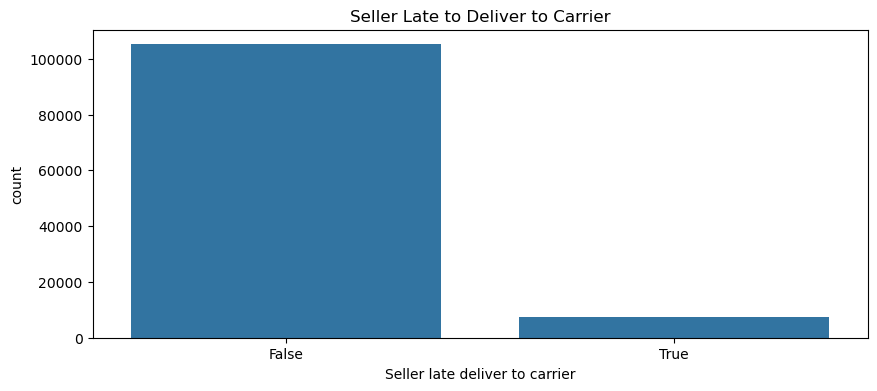

In [91]:
# Create boxplot
plt.figure(figsize=(10, 4))
sns.countplot(x=df_seller['is_late_to_carrier'])
plt.xlabel("Seller late deliver to carrier")
plt.title("Seller Late to Deliver to Carrier")
plt.show()

## **4. Decode Column and Reorder Column**

To simplify analysis and improve readability, we will decode certain columns.

We will follow these steps to decode the columns:  

1. **Import reference** from the original dataset.  
2. **Group unique values** in the column.  
3. **Assign numerical identifiers** to the grouped data.

In [92]:
df_ref_order = pd.read_csv('dataset/00_original_dataset/olist_orders_dataset.csv')
df_ref_order

# Create a dataframe with unique seller_id values
df_ref_order = pd.DataFrame({'order_id': df_ref_order['order_id'].unique()})

# Reset the index to create a new order_id mapping
df_ref_order = df_ref_order.reset_index().rename(columns={'index': 'order_id_new'})
df_ref_order['order_id_new'] = df_ref_order['order_id_new'].apply(lambda x : 'order_id_' + str(x))
df_ref_order['order_id'].nunique()

99441

In [93]:
df_ref_product = pd.read_csv('dataset/00_original_dataset/olist_products_dataset.csv')
df_ref_product

# Create a dataframe with unique seller_id values
df_ref_product = pd.DataFrame({'product_id': df_ref_product['product_id'].unique()})

# Reset the index to create a new product_id mapping
df_ref_product = df_ref_product.reset_index().rename(columns={'index': 'product_id_new'})
df_ref_product['product_id_new'] = df_ref_product['product_id_new'].apply(lambda x : 'product_id_' + str(x))
df_ref_product

product_id_new                        product_id
0          product_id_0  1e9e8ef04dbcff4541ed26657ea517e5
1          product_id_1  3aa071139cb16b67ca9e5dea641aaa2f
2          product_id_2  96bd76ec8810374ed1b65e291975717f
3          product_id_3  cef67bcfe19066a932b7673e239eb23d
4          product_id_4  9dc1a7de274444849c219cff195d0b71
...                 ...                               ...
32946  product_id_32946  a0b7d5a992ccda646f2d34e418fff5a0
32947  product_id_32947  bf4538d88321d0fd4412a93c974510e6
32948  product_id_32948  9a7c6041fa9592d9d9ef6cfe62a71f8c
32949  product_id_32949  83808703fc0706a22e264b9d75f04a2e
32950  product_id_32950  106392145fca363410d287a815be6de4

[32951 rows x 2 columns]

In [94]:
df_ref_seller = pd.read_csv('dataset/00_original_dataset/olist_sellers_dataset.csv')

# Create a dataframe with unique seller_id values
df_ref_seller = pd.DataFrame({'seller_id': df_ref_seller['seller_id'].unique()})

# Reset the index to create a new seller_id mapping
df_ref_seller = df_ref_seller.reset_index().rename(columns={'index': 'seller_id_new'})
df_ref_seller['seller_id_new'] = df_ref_seller['seller_id_new'].apply(lambda x : 'seller_' + str(x))
df_ref_seller

seller_id_new                         seller_id
0         seller_0  3442f8959a84dea7ee197c632cb2df15
1         seller_1  d1b65fc7debc3361ea86b5f14c68d2e2
2         seller_2  ce3ad9de960102d0677a81f5d0bb7b2d
3         seller_3  c0f3eea2e14555b6faeea3dd58c1b1c3
4         seller_4  51a04a8a6bdcb23deccc82b0b80742cf
...            ...                               ...
3090   seller_3090  98dddbc4601dd4443ca174359b237166
3091   seller_3091  f8201cab383e484733266d1906e2fdfa
3092   seller_3092  74871d19219c7d518d0090283e03c137
3093   seller_3093  e603cf3fec55f8697c9059638d6c8eb5
3094   seller_3094  9e25199f6ef7e7c347120ff175652c3b

[3095 rows x 2 columns]

In [95]:
df_ref_customer = pd.read_csv('dataset/00_original_dataset/olist_customers_dataset.csv')
df_ref_customer

# Create a dataframe with unique seller_id values
df_ref_customer = pd.DataFrame({'customer_id': df_ref_customer['customer_id'].unique()})

# Reset the index to create a new order_id mapping
df_ref_customer = df_ref_customer.reset_index().rename(columns={'index': 'customer_id_new'})
df_ref_customer['customer_id_new'] = df_ref_customer['customer_id_new'].apply(lambda x : 'customer_id_' + str(x))
df_ref_customer

customer_id_new                       customer_id
0          customer_id_0  06b8999e2fba1a1fbc88172c00ba8bc7
1          customer_id_1  18955e83d337fd6b2def6b18a428ac77
2          customer_id_2  4e7b3e00288586ebd08712fdd0374a03
3          customer_id_3  b2b6027bc5c5109e529d4dc6358b12c3
4          customer_id_4  4f2d8ab171c80ec8364f7c12e35b23ad
...                  ...                               ...
99436  customer_id_99436  17ddf5dd5d51696bb3d7c6291687be6f
99437  customer_id_99437  e7b71a9017aa05c9a7fd292d714858e8
99438  customer_id_99438  5e28dfe12db7fb50a4b2f691faecea5e
99439  customer_id_99439  56b18e2166679b8a959d72dd06da27f9
99440  customer_id_99440  274fa6071e5e17fe303b9748641082c8

[99441 rows x 2 columns]

In [96]:
df_ref_customer_unique_id = pd.read_csv('dataset/00_original_dataset/olist_customers_dataset.csv')
df_ref_customer_unique_id

# Create a dataframe with unique seller_id values
df_ref_customer_unique_id = pd.DataFrame({'customer_unique_id': df_ref_customer_unique_id['customer_unique_id'].unique()})

# Reset the index to create a new order_id mapping
df_ref_customer_unique_id = df_ref_customer_unique_id.reset_index().rename(columns={'index': 'customer_unique_id_new'})
df_ref_customer_unique_id['customer_unique_id_new'] = df_ref_customer_unique_id['customer_unique_id_new'].apply(lambda x : 'customer_unique_id_' + str(x))
df_ref_customer_unique_id

customer_unique_id_new                customer_unique_id
0          customer_unique_id_0  861eff4711a542e4b93843c6dd7febb0
1          customer_unique_id_1  290c77bc529b7ac935b93aa66c333dc3
2          customer_unique_id_2  060e732b5b29e8181a18229c7b0b2b5e
3          customer_unique_id_3  259dac757896d24d7702b9acbbff3f3c
4          customer_unique_id_4  345ecd01c38d18a9036ed96c73b8d066
...                         ...                               ...
96091  customer_unique_id_96091  1a29b476fee25c95fbafc67c5ac95cf8
96092  customer_unique_id_96092  d52a67c98be1cf6a5c84435bd38d095d
96093  customer_unique_id_96093  e9f50caf99f032f0bf3c55141f019d99
96094  customer_unique_id_96094  73c2643a0a458b49f58cea58833b192e
96095  customer_unique_id_96095  84732c5050c01db9b23e19ba39899398

[96096 rows x 2 columns]

### 4.1. df_seller

In [97]:
unique_seller = df_seller['seller_id'].nunique()
unique_product = df_seller['product_id'].nunique()
unique_order = df_seller['order_id'].nunique()

print(f'Total Unique Seller : {unique_seller}, Product : {unique_product}, Order : {unique_order}')

Total Unique Seller : 3095, Product : 32949, Order : 98663


In [98]:
df_seller = df_seller.merge(df_ref_seller,how='left',on='seller_id')
df_seller = df_seller.merge(df_ref_order,how='left',on='order_id')
df_seller = df_seller.merge(df_ref_product,how='left',on='product_id')

df_seller

seller_id seller_zip_code_prefix  \
0       48436dade18ac8b2bce089ec2a041202                  27277   
1       dd7ddc04e1b6c2c614352b383efe2d36                   3471   
2       5b51032eddd242adc84c38acab88f23d                  37564   
3       9d7a1d34a5052409006425275ba1c2b4                  14403   
4       df560393f3a51e74553ab94004ba5c87                  87900   
...                                  ...                    ...   
112639  b8bc237ba3788b23da09c0f1f3a3288c                  88303   
112640  f3c38ab652836d21de61fb8314b69182                   1206   
112641  c3cfdc648177fdbbbb35635a37472c53                  80610   
112642  2b3e4a2a3ea8e01938cabda2a3e5cc79                   4733   
112643  f7ccf836d21b2fb1de37564105216cc1                  14940   

          seller_city seller_state geolocation_zip_code_prefix  \
0       volta redonda           SP                       27277   
1           sao paulo           SP                        3471   
2       borda da mata           MG                       37564   
3              franca           SP                       14403   
4              loanda           PR                       87900   
...               ...          ...                         ...   
112639         itajai           SC                       88303   
112640      sao paulo           SP                        1206   
112641       curitiba           PR                       80610   
112642      sao paulo           SP                        4733   
112643       ibitinga           SP                       14940   

        geolocation_lat  geolocation_lng geolocation_city geolocation_state  \
0            -22.496953       -44.127492    volta redonda                RJ   
1            -23.565096       -46.518565        sao paulo                SP   
2            -22.262584       -46.171124    borda da mata                MG   
3            -20.553624       -47.387359           franca                SP   
4            -22.929384       -53.135873           loanda                PR   
...                 ...              ...              ...               ...   
112639       -26.912574       -48.673980           itajai                SC   
112640       -23.535864       -46.642819        sao paulo                SP   
112641       -25.469955       -49.289821         curitiba                PR   
112642       -23.635530       -46.694031        são paulo                SP   
112643       -21.757321       -48.829744         ibitinga                SP   

                              product_id product_category_name_english  \
0       4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   
1       e5f2d52b802189ee658865ca93d83a8f                      pet_shop   
2       c777355d18b72b67abbeef9df44fd0fd               furniture_decor   
3       7634da152a4610f1595efa32f14722fc                     perfumery   
4       ac6c3623068f30de03045865e4e10089                  garden_tools   
...                                  ...                           ...   
112639  4aa6014eceb682077f9dc4bffebc05b0                    housewares   
112640  32e07fd915822b0765e448c4dd74c828         computers_accessories   
112641  72a30483855e2eafc67aee5dc2560482                sports_leisure   
112642  9c422a519119dcad7575db5af1ba540e         computers_accessories   
112643  350688d9dc1e75ff97be326363655e01                bed_bath_table   

         price                          order_id  order_item_id  \
0        58.90  00010242fe8c5a6d1ba2dd792cb16214              1   
1       239.90  00018f77f2f0320c557190d7a144bdd3              1   
2       199.00  000229ec398224ef6ca0657da4fc703e              1   
3        12.99  00024acbcdf0a6daa1e931b038114c75              1   
4       199.90  00042b26cf59d7ce69dfabb4e55b4fd9              1   
...        ...                               ...            ...   
112639  299.99  fffc94f6ce00a00581880bf54a75a037              1   
112640  350.00  fffcd46ef2263f404302a634eb57f7eb           

In [99]:
df_seller = df_seller[['seller_id_new','order_id_new','order_item_id','product_id_new','product_category_name_english','price','order_purchase_timestamp','order_approved_at','shipping_limit_date','order_status','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_score','net_profit','reviewed','late_days_to_carrier','is_late_to_carrier','seller_zip_code_prefix','seller_city','seller_state','geolocation_lat','geolocation_lng']]
df_seller

seller_id_new    order_id_new  order_item_id    product_id_new  \
0         seller_513  order_id_85267              1  product_id_25865   
1         seller_471  order_id_71853              1  product_id_27230   
2        seller_1824   order_id_6298              1  product_id_22624   
3        seller_2023  order_id_22550              1  product_id_15403   
4        seller_1597   order_id_5247              1   product_id_8862   
...              ...             ...            ...               ...   
112639   seller_2323  order_id_79550              1   product_id_4737   
112640   seller_1775  order_id_70155              1   product_id_9255   
112641    seller_601  order_id_52699              1  product_id_24015   
112642   seller_2876  order_id_59871              1  product_id_22355   
112643   seller_2057  order_id_59741              1   product_id_5900   

       product_category_name_english   price order_purchase_timestamp  \
0                         cool_stuff   58.90      2017-09-13 08:59:02   
1                           pet_shop  239.90      2017-04-26 10:53:06   
2                    furniture_decor  199.00      2018-01-14 14:33:31   
3                          perfumery   12.99      2018-08-08 10:00:35   
4                       garden_tools  199.90      2017-02-04 13:57:51   
...                              ...     ...                      ...   
112639                    housewares  299.99      2018-04-23 13:57:06   
112640         computers_accessories  350.00      2018-07-14 10:26:46   
112641                sports_leisure   99.90      2017-10-23 17:07:56   
112642         computers_accessories   55.99      2017-08-14 23:02:59   
112643                bed_bath_table   43.00      2018-06-09 17:00:18   

         order_approved_at shipping_limit_date order_status  \
0      2017-09-13 09:45:35 2017-09-19 09:45:35    delivered   
1      2017-04-26 11:05:13 2017-05-03 11:05:13    delivered   
2      2018-01-14 14:48:30 2018-01-18 14:48:30    delivered   
3      2018-08-08 10:10:18 2018-08-15 10:10:18    delivered   
4      2017-02-04 14:10:13 2017-02-13 13:57:51    delivered   
...                    ...                 ...          ...   
112639 2018-04-25 04:11:01 2018-04-29 13:57:06    delivered   
112640 2018-07-17 04:31:48 2018-07-20 04:31:48    delivered   
112641 2017-10-24 17:14:25 2017-10-30 17:14:25    delivered   
112642 2017-08-15 00:04:32 2017-08-21 00:04:32    delivered   
112643 2018-06-09 17:10:13 2018-06-12 17:10:13    delivered   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-09-19 18:34:16           2017-09-20 23:43:48   
1               2017-05-04 14:35:00           2017-05-12 16:04:24   
2               2018-01-16 12:36:48           2018-01-22 13:19:16   
3               2018-08-10 13:28:00           2018-08-14 13:32:39   
4               2017-02-16 09:46:09           2017-03-01 16:42:31   
...                             ...                           ...   
112639          2018-04-25 12:09:00           2018-05-10 22:56:40   
112640          2018-07-17 08:05:00           2018-07-23 20:31:55   
112641          2017-10-26 15:13:14           2017-10-28 12:22:22   
112642          2017-08-15 19:02:53           2017-08-16 21:59:40   
112643          2018-06-11 14:11:00           2018-06-14 17:56:26   

       order_estimated_delivery_date  review_score  net_profit  reviewed  \
0                         2017-09-29           5.0     10.6020      True   
1                         2017-05-15           4.0     43.1820      True   
2                         2018-02-05           5.0     35.8200      True   
3                         2018-08-20           4.0      2.3382      True   
4                         2017-03-17           5.0     35.9820      True   
...                              ...           ...         ...       ...   
112639                    2018-05-18           5.0     53.9982      True   
112640                    2018-08-01           5.0     63.0

In [100]:
unique_seller_after = df_seller['seller_id_new'].nunique()
unique_product_after = df_seller['product_id_new'].nunique()
unique_order_after = df_seller['order_id_new'].nunique()
print(f'Total Unique Before -> Seller  : {unique_seller}, Product : {unique_product}, Order : {unique_order}')
print(f'Total Unique After  -> Seller  : {unique_seller_after}, Product : {unique_product_after}, Order : {unique_order_after}')

Total Unique Before -> Seller  : 3095, Product : 32949, Order : 98663
Total Unique After  -> Seller  : 3095, Product : 32949, Order : 98663


In [101]:
df_seller[df_seller['order_id_new']=='order_id_85267']

seller_id_new    order_id_new  order_item_id    product_id_new  \
0    seller_513  order_id_85267              1  product_id_25865   

  product_category_name_english  price order_purchase_timestamp  \
0                    cool_stuff   58.9      2017-09-13 08:59:02   

    order_approved_at shipping_limit_date order_status  \
0 2017-09-13 09:45:35 2017-09-19 09:45:35    delivered   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-19 18:34:16           2017-09-20 23:43:48   

  order_estimated_delivery_date  review_score  net_profit  reviewed  \
0                    2017-09-29           5.0      10.602      True   

   late_days_to_carrier  is_late_to_carrier seller_zip_code_prefix  \
0                   0.0               False                  27277   

     seller_city seller_state  geolocation_lat  geolocation_lng  
0  volta redonda           SP       -22.496953       -44.127492

### 4.2. df_business

In [102]:
unique_customer = df_business['customer_id'].nunique()
unique_customer_unique = df_business['customer_unique_id'].nunique()
unique_product = df_business['product_id'].nunique()
unique_order = df_business['order_id'].nunique()

print(f'Total Unique Customer : {unique_seller}, Customer Unique : {unique_seller}, Product : {unique_product}, Order : {unique_order}')

Total Unique Customer : 3095, Customer Unique : 3095, Product : 32949, Order : 98663


In [103]:
df_business = df_business.merge(df_ref_customer,how='left',on='customer_id')
df_business = df_business.merge(df_ref_customer_unique_id,how='left',on='customer_unique_id')
df_business = df_business.merge(df_ref_product,how='left',on='product_id')
df_business = df_business.merge(df_ref_order,how='left',on='order_id')


df_business

customer_id                customer_unique_id  \
0       3ce436f183e68e07877b285a838db11a  871766c5855e863f6eccc05f988b23cb   
1       f6dd3ec061db4e3987629fe6b26e5cce  eb28e67c4c0b83846050ddfb8a35d051   
2       6489ae5e4333f3693df5ad4372dab6d3  3818d81c6709e39d06b2738a8d3a2474   
3       d4eb9395c8c0431ee92fce09860c5a06  af861d436cfc08b2c2ddefd0ba074622   
4       58dbd0b2d70206bf40e62cd34e84d795  64b576fb70d441e8f1b2d7d446e483c5   
...                                  ...                               ...   
112639  b51593916b4b8e0d6f66f2ae24f2673d  0c9aeda10a71f369396d0c04dce13a64   
112640  84c5d4fbaf120aae381fad077416eaa0  0da9fe112eae0c74d3ba1fe16de0988b   
112641  29309aa813182aaddc9b259e31b870e6  cd79b407828f02fdbba457111c38e4c4   
112642  b5e6afd5a41800fdf401e0272ca74655  eb803377c9315b564bdedad672039306   
112643  96d649da0cc4ff33bb408b199d4c7dcf  cd76a00d8e3ca5e6ab9ed9ecb6667ac4   

       customer_zip_code_prefix customer_state geolocation_zip_code_prefix  \
0                         28013             RJ                       28013   
1                         15775             SP                       15775   
2                         35661             MG                       35661   
3                         12952             SP                       12952   
4                         13226             SP                       13226   
...                         ...            ...                         ...   
112639                    65077             MA                       65077   
112640                    81690             PR                       81690   
112641                     4039             SP                        4039   
112642                    13289             SP                       13289   
112643                    18605             SP                       18605   

        geolocation_lat  geolocation_lng       geolocation_city  \
0            -21.762775       -41.309633  campos dos goytacazes   
1            -20.220527       -50.903424        santa fe do sul   
2            -19.870305       -44.593326          pará de minas   
3            -23.089925       -46.611654                atibaia   
4            -23.243402       -46.827614        varzea paulista   
...                 ...              ...                    ...   
112639        -2.497993       -44.297761               sao luis   
112640       -25.566904       -49.309115               curitiba   
112641       -23.597794       -46.643923              sao paulo   
112642       -23.040252       -46.979782                vinhedo   
112643       -22.916957       -48.441709               botucatu   

       geolocation_state                        product_id  \
0                     RJ  4244733e06e7ecb4970a6e2683c13e61   
1                     SP  e5f2d52b802189ee658865ca93d83a8f   
2                     MG  c777355d18b72b67abbeef9df44fd0fd   
3                     SP  7634da152a4610f1595efa32f14722fc   
4                     SP  ac6c3623068f30de03045865e4e10089   
...                  ...                               ...   
112639                MA  4aa6014eceb682077f9dc4bffebc05b0   
112640                PR  32e07fd915822b0765e448c4dd74c828   
112641                SP  72a30483855e2eafc67aee5dc2560482   
112642                SP  9c422a519119dcad7575db5af1ba540e   
112643                SP  350688d9dc1e75ff97be326363655e01   

       product_category_name_english   price  \
0                         cool_stuff   58.90   
1                           pet_shop  239.90   
2                    furniture_decor  199.00   
3                          perfumery   12.99   
4                       garden_tools  199.90   
...                              ...     ...   
112639                    housewares  299.99   
112640         computers_accessories  350.00   
112641                sports_leisure   99.90   
112642         computers_accessories   55.99   
112643                bed_bath_table   43.00   

                            

In [104]:
df_business = df_business[['customer_id_new','customer_unique_id_new','order_id_new','order_item_id','product_id_new','product_category_name_english','price','order_purchase_timestamp','avg_items_per_order','net_profit','order_status','customer_zip_code_prefix','customer_state','geolocation_lat','geolocation_lng','geolocation_city']]
df_business

customer_id_new    customer_unique_id_new    order_id_new  \
0       customer_id_65557  customer_unique_id_64072  order_id_85267   
1       customer_id_34265  customer_unique_id_33837  order_id_71853   
2       customer_id_34955  customer_unique_id_34510   order_id_6298   
3       customer_id_51763  customer_unique_id_50802  order_id_22550   
4        customer_id_7602   customer_unique_id_7581   order_id_5247   
...                   ...                       ...             ...   
112639  customer_id_88325  customer_unique_id_85642  order_id_79550   
112640  customer_id_26677  customer_unique_id_26404  order_id_70155   
112641   customer_id_1507   customer_unique_id_1505  order_id_52699   
112642  customer_id_56644  customer_unique_id_55520  order_id_59871   
112643   customer_id_3880   customer_unique_id_3873  order_id_59741   

        order_item_id    product_id_new product_category_name_english   price  \
0                   1  product_id_25865                    cool_stuff   58.90   
1                   1  product_id_27230                      pet_shop  239.90   
2                   1  product_id_22624               furniture_decor  199.00   
3                   1  product_id_15403                     perfumery   12.99   
4                   1   product_id_8862                  garden_tools  199.90   
...               ...               ...                           ...     ...   
112639              1   product_id_4737                    housewares  299.99   
112640              1   product_id_9255         computers_accessories  350.00   
112641              1  product_id_24015                sports_leisure   99.90   
112642              1  product_id_22355         computers_accessories   55.99   
112643              1   product_id_5900                bed_bath_table   43.00   

       order_purchase_timestamp  avg_items_per_order  net_profit order_status  \
0           2017-09-13 08:59:02                    1     10.6020    delivered   
1           2017-04-26 10:53:06                    1     43.1820    delivered   
2           2018-01-14 14:33:31                    1     35.8200    delivered   
3           2018-08-08 10:00:35                    1      2.3382    delivered   
4           2017-02-04 13:57:51                    1     35.9820    delivered   
...                         ...                  ...         ...          ...   
112639      2018-04-23 13:57:06                    1     53.9982    delivered   
112640      2018-07-14 10:26:46                    1     63.0000    delivered   
112641      2017-10-23 17:07:56                    1     17.9820    delivered   
112642      2017-08-14 23:02:59                    1     10.0782    delivered   
112643      2018-06-09 17:00:18                    1      7.7400    delivered   

       customer_zip_code_prefix customer_state  geolocation_lat  \
0                         28013             RJ       -21.762775   
1                         15775             SP       -20.220527   
2                         35661             MG       -19.870305   
3                         12952             SP       -23.089925   
4                         13226             SP       -23.243402   
...                         ...            ...              ...   
112639                    65077             MA        -2.497993   
112640                    81690             PR       -25.566904   
112641                     4039             SP       -23.597794   
112642                    13289             SP       -23.040252   
112643                    18605             SP       -22.916957   

        geolocation_lng       geolocation_city  
0            -41.309633  campos dos goytacazes  
1            -50.903424        santa fe do sul  
2            -44.593326          pará de minas  
3            -46.611654                atibaia  
4            -46.827614        varzea paulista  
...                 ...                    ...  
112639       -44.297761               sao luis  
112640       -

In [105]:
unique_customer_after = df_business['customer_id_new'].nunique()
unique_customer_unique_after = df_business['customer_unique_id_new'].nunique()
unique_product_after = df_business['product_id_new'].nunique()
unique_order_after = df_business['order_id_new'].nunique()

print(f'Total Unique Before -> Seller  : {unique_seller}, Customer Unique : {unique_seller}, Product : {unique_product}, Order : {unique_order}')
print(f'Total Unique After  -> Seller  : {unique_seller_after}, Customer Unique : {unique_seller_after}, Product : {unique_product_after}, Order : {unique_order_after}')

Total Unique Before -> Seller  : 3095, Customer Unique : 3095, Product : 32949, Order : 98663
Total Unique After  -> Seller  : 3095, Customer Unique : 3095, Product : 32949, Order : 98663


In [106]:
df_business

customer_id_new    customer_unique_id_new    order_id_new  \
0       customer_id_65557  customer_unique_id_64072  order_id_85267   
1       customer_id_34265  customer_unique_id_33837  order_id_71853   
2       customer_id_34955  customer_unique_id_34510   order_id_6298   
3       customer_id_51763  customer_unique_id_50802  order_id_22550   
4        customer_id_7602   customer_unique_id_7581   order_id_5247   
...                   ...                       ...             ...   
112639  customer_id_88325  customer_unique_id_85642  order_id_79550   
112640  customer_id_26677  customer_unique_id_26404  order_id_70155   
112641   customer_id_1507   customer_unique_id_1505  order_id_52699   
112642  customer_id_56644  customer_unique_id_55520  order_id_59871   
112643   customer_id_3880   customer_unique_id_3873  order_id_59741   

        order_item_id    product_id_new product_category_name_english   price  \
0                   1  product_id_25865                    cool_stuff   58.90   
1                   1  product_id_27230                      pet_shop  239.90   
2                   1  product_id_22624               furniture_decor  199.00   
3                   1  product_id_15403                     perfumery   12.99   
4                   1   product_id_8862                  garden_tools  199.90   
...               ...               ...                           ...     ...   
112639              1   product_id_4737                    housewares  299.99   
112640              1   product_id_9255         computers_accessories  350.00   
112641              1  product_id_24015                sports_leisure   99.90   
112642              1  product_id_22355         computers_accessories   55.99   
112643              1   product_id_5900                bed_bath_table   43.00   

       order_purchase_timestamp  avg_items_per_order  net_profit order_status  \
0           2017-09-13 08:59:02                    1     10.6020    delivered   
1           2017-04-26 10:53:06                    1     43.1820    delivered   
2           2018-01-14 14:33:31                    1     35.8200    delivered   
3           2018-08-08 10:00:35                    1      2.3382    delivered   
4           2017-02-04 13:57:51                    1     35.9820    delivered   
...                         ...                  ...         ...          ...   
112639      2018-04-23 13:57:06                    1     53.9982    delivered   
112640      2018-07-14 10:26:46                    1     63.0000    delivered   
112641      2017-10-23 17:07:56                    1     17.9820    delivered   
112642      2017-08-14 23:02:59                    1     10.0782    delivered   
112643      2018-06-09 17:00:18                    1      7.7400    delivered   

       customer_zip_code_prefix customer_state  geolocation_lat  \
0                         28013             RJ       -21.762775   
1                         15775             SP       -20.220527   
2                         35661             MG       -19.870305   
3                         12952             SP       -23.089925   
4                         13226             SP       -23.243402   
...                         ...            ...              ...   
112639                    65077             MA        -2.497993   
112640                    81690             PR       -25.566904   
112641                     4039             SP       -23.597794   
112642                    13289             SP       -23.040252   
112643                    18605             SP       -22.916957   

        geolocation_lng       geolocation_city  
0            -41.309633  campos dos goytacazes  
1            -50.903424        santa fe do sul  
2            -44.593326          pará de minas  
3            -46.611654                atibaia  
4            -46.827614        varzea paulista  
...                 ...                    ...  
112639       -44.297761               sao luis  
112640       -

### 4.3. df_buyer

In [107]:
df_ref_buyer = pd.read_csv('dataset/00_original_dataset/olist_customers_dataset.csv')
df_ref_buyer

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [108]:
unique_customer = df_buyer['customer_id'].nunique()
unique_customer_unique = df_buyer['customer_unique_id'].nunique()
unique_product = df_buyer['product_id'].nunique()
unique_order = df_buyer['order_id'].nunique()

print(f'Total Unique Customer : {unique_seller}, Customer Unique : {unique_seller}, Product : {unique_product}, Order : {unique_order}')

Total Unique Customer : 3095, Customer Unique : 3095, Product : 32949, Order : 98663


In [109]:
df_buyer = df_buyer.merge(df_ref_customer,how='left',on='customer_id')
df_buyer = df_buyer.merge(df_ref_customer_unique_id,how='left',on='customer_unique_id')
df_buyer = df_buyer.merge(df_ref_product,how='left',on='product_id')
df_buyer = df_buyer.merge(df_ref_order,how='left',on='order_id')


df_buyer

customer_id                customer_unique_id  \
0       3ce436f183e68e07877b285a838db11a  871766c5855e863f6eccc05f988b23cb   
1       f6dd3ec061db4e3987629fe6b26e5cce  eb28e67c4c0b83846050ddfb8a35d051   
2       6489ae5e4333f3693df5ad4372dab6d3  3818d81c6709e39d06b2738a8d3a2474   
3       d4eb9395c8c0431ee92fce09860c5a06  af861d436cfc08b2c2ddefd0ba074622   
4       58dbd0b2d70206bf40e62cd34e84d795  64b576fb70d441e8f1b2d7d446e483c5   
...                                  ...                               ...   
112639  b51593916b4b8e0d6f66f2ae24f2673d  0c9aeda10a71f369396d0c04dce13a64   
112640  84c5d4fbaf120aae381fad077416eaa0  0da9fe112eae0c74d3ba1fe16de0988b   
112641  29309aa813182aaddc9b259e31b870e6  cd79b407828f02fdbba457111c38e4c4   
112642  b5e6afd5a41800fdf401e0272ca74655  eb803377c9315b564bdedad672039306   
112643  96d649da0cc4ff33bb408b199d4c7dcf  cd76a00d8e3ca5e6ab9ed9ecb6667ac4   

       customer_zip_code_prefix customer_state geolocation_zip_code_prefix  \
0                         28013             RJ                       28013   
1                         15775             SP                       15775   
2                         35661             MG                       35661   
3                         12952             SP                       12952   
4                         13226             SP                       13226   
...                         ...            ...                         ...   
112639                    65077             MA                       65077   
112640                    81690             PR                       81690   
112641                     4039             SP                        4039   
112642                    13289             SP                       13289   
112643                    18605             SP                       18605   

        geolocation_lat  geolocation_lng       geolocation_city  \
0            -21.762775       -41.309633  campos dos goytacazes   
1            -20.220527       -50.903424        santa fe do sul   
2            -19.870305       -44.593326          pará de minas   
3            -23.089925       -46.611654                atibaia   
4            -23.243402       -46.827614        varzea paulista   
...                 ...              ...                    ...   
112639        -2.497993       -44.297761               sao luis   
112640       -25.566904       -49.309115               curitiba   
112641       -23.597794       -46.643923              sao paulo   
112642       -23.040252       -46.979782                vinhedo   
112643       -22.916957       -48.441709               botucatu   

       geolocation_state                        product_id  \
0                     RJ  4244733e06e7ecb4970a6e2683c13e61   
1                     SP  e5f2d52b802189ee658865ca93d83a8f   
2                     MG  c777355d18b72b67abbeef9df44fd0fd   
3                     SP  7634da152a4610f1595efa32f14722fc   
4                     SP  ac6c3623068f30de03045865e4e10089   
...                  ...                               ...   
112639                MA  4aa6014eceb682077f9dc4bffebc05b0   
112640                PR  32e07fd915822b0765e448c4dd74c828   
112641                SP  72a30483855e2eafc67aee5dc2560482   
112642                SP  9c422a519119dcad7575db5af1ba540e   
112643                SP  350688d9dc1e75ff97be326363655e01   

       product_category_name_english   price  \
0                         cool_stuff   58.90   
1                           pet_shop  239.90   
2                    furniture_decor  199.00   
3                          perfumery   12.99   
4                       garden_tools  199.90   
...                              ...     ...   
112639                    housewares  299.99   
112640         computers_accessories  350.00   
112641                sports_leisure   99.90   
112642         computers_accessories   55.99   
112643                bed_bath_table   43.00   

                            

In [110]:
df_buyer = df_buyer[['customer_id_new','customer_unique_id_new','order_id_new','order_item_id','product_id_new','product_category_name_english','price','order_purchase_timestamp','payment_type','order_status','review_score','reviewed','customer_zip_code_prefix','customer_state','geolocation_lat','geolocation_lng','geolocation_city']]
df_buyer

customer_id_new    customer_unique_id_new    order_id_new  \
0       customer_id_65557  customer_unique_id_64072  order_id_85267   
1       customer_id_34265  customer_unique_id_33837  order_id_71853   
2       customer_id_34955  customer_unique_id_34510   order_id_6298   
3       customer_id_51763  customer_unique_id_50802  order_id_22550   
4        customer_id_7602   customer_unique_id_7581   order_id_5247   
...                   ...                       ...             ...   
112639  customer_id_88325  customer_unique_id_85642  order_id_79550   
112640  customer_id_26677  customer_unique_id_26404  order_id_70155   
112641   customer_id_1507   customer_unique_id_1505  order_id_52699   
112642  customer_id_56644  customer_unique_id_55520  order_id_59871   
112643   customer_id_3880   customer_unique_id_3873  order_id_59741   

        order_item_id    product_id_new product_category_name_english   price  \
0                   1  product_id_25865                    cool_stuff   58.90   
1                   1  product_id_27230                      pet_shop  239.90   
2                   1  product_id_22624               furniture_decor  199.00   
3                   1  product_id_15403                     perfumery   12.99   
4                   1   product_id_8862                  garden_tools  199.90   
...               ...               ...                           ...     ...   
112639              1   product_id_4737                    housewares  299.99   
112640              1   product_id_9255         computers_accessories  350.00   
112641              1  product_id_24015                sports_leisure   99.90   
112642              1  product_id_22355         computers_accessories   55.99   
112643              1   product_id_5900                bed_bath_table   43.00   

       order_purchase_timestamp payment_type order_status  review_score  \
0           2017-09-13 08:59:02  credit_card    delivered           5.0   
1           2017-04-26 10:53:06  credit_card    delivered           4.0   
2           2018-01-14 14:33:31  credit_card    delivered           5.0   
3           2018-08-08 10:00:35  credit_card    delivered           4.0   
4           2017-02-04 13:57:51  credit_card    delivered           5.0   
...                         ...          ...          ...           ...   
112639      2018-04-23 13:57:06       boleto    delivered           5.0   
112640      2018-07-14 10:26:46       boleto    delivered           5.0   
112641      2017-10-23 17:07:56  credit_card    delivered           5.0   
112642      2017-08-14 23:02:59  credit_card    delivered           5.0   
112643      2018-06-09 17:00:18  credit_card    delivered           5.0   

        reviewed customer_zip_code_prefix customer_state  geolocation_lat  \
0           True                    28013             RJ       -21.762775   
1           True                    15775             SP       -20.220527   
2           True                    35661             MG       -19.870305   
3           True                    12952             SP       -23.089925   
4           True                    13226             SP       -23.243402   
...          ...                      ...            ...              ...   
112639      True                    65077             MA        -2.497993   
112640      True                    81690             PR       -25.566904   
112641      True                     4039             SP       -23.597794   
112642      True                    13289             SP       -23.040252   
112643      True                    18605             SP       -22.916957   

        geolocation_lng       geolocation_city  
0            -41.309633  campos dos goytacazes  
1            -50.903424        santa fe do sul  
2            -44.593326          pará de minas  
3            -46.611654                atibaia  
4            -46.827614        varzea paulista  
...                 ...                    ...  
112639       -4

In [111]:
unique_customer_after = df_buyer['customer_id_new'].nunique()
unique_customer_unique_after = df_buyer['customer_unique_id_new'].nunique()
unique_product_after = df_buyer['product_id_new'].nunique()
unique_order_after = df_buyer['order_id_new'].nunique()

print(f'Total Unique Before -> Seller  : {unique_seller}, Customer Unique : {unique_seller}, Product : {unique_product}, Order : {unique_order}')
print(f'Total Unique After  -> Seller  : {unique_seller_after}, Customer Unique : {unique_seller_after}, Product : {unique_product_after}, Order : {unique_order_after}')

Total Unique Before -> Seller  : 3095, Customer Unique : 3095, Product : 32949, Order : 98663
Total Unique After  -> Seller  : 3095, Customer Unique : 3095, Product : 32949, Order : 98663


## 5. Export Clean Dataset

In [112]:
# Get absolute path for cross-platform compatibility
base_dir = os.path.abspath(os.getcwd())  # Ensures script works regardless of where it's run

# Define dataset folder path
folder_path = os.path.join(base_dir, "dataset", "02_clean_dataset")

# Create folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Define file paths
business_path = os.path.join(folder_path, "business_side_clean.csv")
seller_path = os.path.join(folder_path, "seller_side_clean.csv")
buyer_path = os.path.join(folder_path, "buyer_side_clean.csv")

# Save DataFrames to CSV
df_business.to_csv(business_path, index=False)
df_seller.to_csv(seller_path, index=False)
df_buyer.to_csv(buyer_path, index=False)

print("✅ CSV files saved successfully in:", folder_path)

✅ CSV files saved successfully in: /Users/glen/Documents/04. Final Project/00. Final/dataset/02_clean_dataset


# **ANALYSIS**

## **1. Business Peformance**

### 1.1. Total Profit & Revenue Trends

We will analyze **profit and revenue trends** in two ways:  

1. **Overall trends** across all available years.  
2. **Year-on-year (YoY) comparisons** to track annual changes.  

**Note:** There is a **data gap** between **October 2016 and January 2017** that should be considered in the analysis.

#### 1.1.a. Overal Trends

In this section, we will provide an **overview of profit and revenue trends** to understand overall business performance.  

In [113]:
# Adding Year Column to group by Year
df_business['year'] = df_business['order_purchase_timestamp'].dt.year
df_business[df_business['year'] == 2016]

customer_id_new    customer_unique_id_new    order_id_new  \
908     customer_id_15278  customer_unique_id_15181  order_id_94885   
909     customer_id_15278  customer_unique_id_15181  order_id_94885   
911     customer_id_63138  customer_unique_id_61756  order_id_68624   
1138    customer_id_36375  customer_unique_id_35883  order_id_83121   
1320    customer_id_78351  customer_unique_id_76231  order_id_54998   
...                   ...                       ...             ...   
109867  customer_id_22566  customer_unique_id_22375  order_id_65360   
109900  customer_id_19969   customer_unique_id_8642  order_id_71896   
110601  customer_id_97266  customer_unique_id_94057  order_id_69229   
110794   customer_id_4342   customer_unique_id_4335  order_id_56952   
111494  customer_id_59098  customer_unique_id_57875  order_id_64192   

        order_item_id    product_id_new product_category_name_english   price  \
908                 1  product_id_20077                          toys  249.99   
909                 2  product_id_20077                          toys  249.99   
911                 1  product_id_26623                          auto   51.50   
1138                1   product_id_8513        books_general_interest  119.50   
1320                1   product_id_6891                 health_beauty   57.90   
...               ...               ...                           ...     ...   
109867              1  product_id_16787                 health_beauty   99.90   
109900              1     product_id_43                          baby   83.90   
110601              1  product_id_16913         computers_accessories   35.00   
110794              1  product_id_16787                 health_beauty   99.90   
111494              1   product_id_2843                          baby   27.90   

       order_purchase_timestamp  avg_items_per_order  net_profit order_status  \
908         2016-10-07 10:52:22                    2     44.9982    delivered   
909         2016-10-07 10:52:22                    2     44.9982    delivered   
911         2016-10-07 17:37:49                    1      9.2700    delivered   
1138        2016-10-09 10:34:58                    1     21.5100     invoiced   
1320        2016-10-04 19:01:13                    1     10.4220    delivered   
...                         ...                  ...         ...          ...   
109867      2016-10-10 02:17:55                    1     17.9820    delivered   
109900      2016-10-08 22:11:57                    1     15.1020    delivered   
110601      2016-10-08 20:02:32                    1      6.3000    delivered   
110794      2016-10-04 13:30:13                    1     17.9820    delivered   
111494      2016-10-07 14:15:50                    1      5.0220    delivered   

       customer_zip_code_prefix customer_state  geolocation_lat  \
908                       22725             RJ       -22.911502   
909                       22725             RJ       -22.911502   
911                       35400             MG       -20.391011   
1138                      55150             PE        -8.336332   
1320                      28993             RJ       -22.893316   
...                         ...            ...              ...   
109867                    13347             SP       -23.134113   
109900                     5074             SP       -23.519869   
110601                    71699             DF       -15.793097   
110794                    29300             ES       -20.847460   
111494                     9770             SP       -23.708333   

        geolocation_lng         geolocation_city  year  
908          -43.376526           rio de janeiro  2016  
909          -43.376526           rio de janeiro  2016  
911          -43.507047               ouro preto  2016  
1138         -36.420026              belo jardim  2016  
1320         -42.470007                   bacaxa  2016  
...                 ...                      ...   ...  
109867 

In [114]:
# Convert date-time columns to date-only format to simplify the analysis and avoid unnecessary specificity.  
df_business['order_purchase_timestamp'] = df_business['order_purchase_timestamp'].dt.strftime(r'%m/%d/%Y').astype('datetime64[ns]')

In [115]:
# Grouping data by order_purchase_timestamp
df_price = df_business.query("order_status=='delivered'").groupby('order_purchase_timestamp').agg({"price": "sum", "order_id_new": "nunique","net_profit":'sum'}).reset_index().rename(columns={'order_id_new':'Total Order'})
df_price.sort_values(by='price',ascending=False)

order_purchase_timestamp      price  Total Order  net_profit
332               2017-11-24  149916.58         1147  26984.9844
333               2017-11-25   59928.51          487  10787.1318
505               2018-05-16   55562.13          351  10001.1834
587               2018-08-06   53475.41          363   9625.5738
496               2018-05-07   52726.03          363   9490.6854
..                       ...        ...          ...         ...
13                2017-01-09     673.79            5    121.2822
12                2017-01-08     449.78            4     80.9604
0                 2016-10-03     441.98            7     79.5564
9                 2017-01-05     396.90           32     71.4420
8                 2016-12-23      10.90            1      1.9620

[611 rows x 4 columns]

In [116]:
# Separating month and year from order_purchase_timestamp, using 2000 to make the data still in date format so can be properly shown in graph
df_price['date_month'] = df_price['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(f"2000-{x.month:02d}-{x.day:02d}"))
df_price['year'] = df_price['order_purchase_timestamp'].dt.year
df_price['month'] = df_price['order_purchase_timestamp'].dt.month
df_price

order_purchase_timestamp     price  Total Order  net_profit date_month  \
0                 2016-10-03    441.98            7     79.5564 2000-10-03   
1                 2016-10-04   8595.89           54   1547.2602 2000-10-04   
2                 2016-10-05   6169.77           35   1110.5586 2000-10-05   
3                 2016-10-06   5889.96           41   1060.1928 2000-10-06   
4                 2016-10-07   6075.35           38   1093.5630 2000-10-07   
..                       ...       ...          ...         ...        ...   
606               2018-08-25  10599.41           69   1907.8938 2000-08-25   
607               2018-08-26   8070.71           73   1452.7278 2000-08-26   
608               2018-08-27   5345.91           66    962.2638 2000-08-27   
609               2018-08-28   3673.91           39    661.3038 2000-08-28   
610               2018-08-29   1546.04           11    278.2872 2000-08-29   

     year  month  
0    2016     10  
1    2016     10  
2    2016     10  
3    2016     10  
4    2016     10  
..    ...    ...  
606  2018      8  
607  2018      8  
608  2018      8  
609  2018      8  
610  2018      8  

[611 rows x 7 columns]

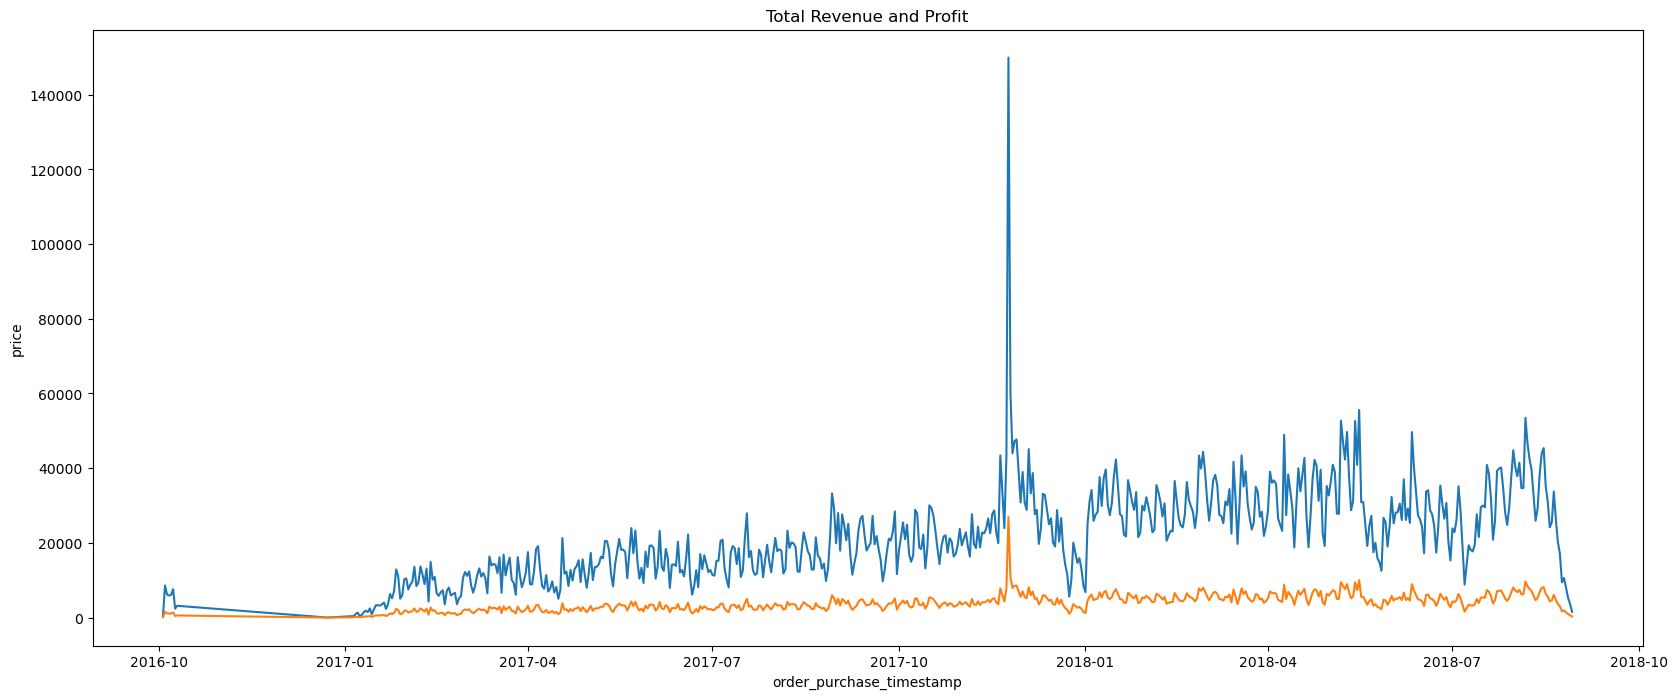

In [117]:
# Total Revenue and Profit

plt.figure(figsize=(20,8))
sns.lineplot(data=df_price,x='order_purchase_timestamp',y='price')
sns.lineplot(data=df_price,x='order_purchase_timestamp',y='net_profit')
plt.title('Total Revenue and Profit')
plt.show()

Here we can see the trends of total order by year

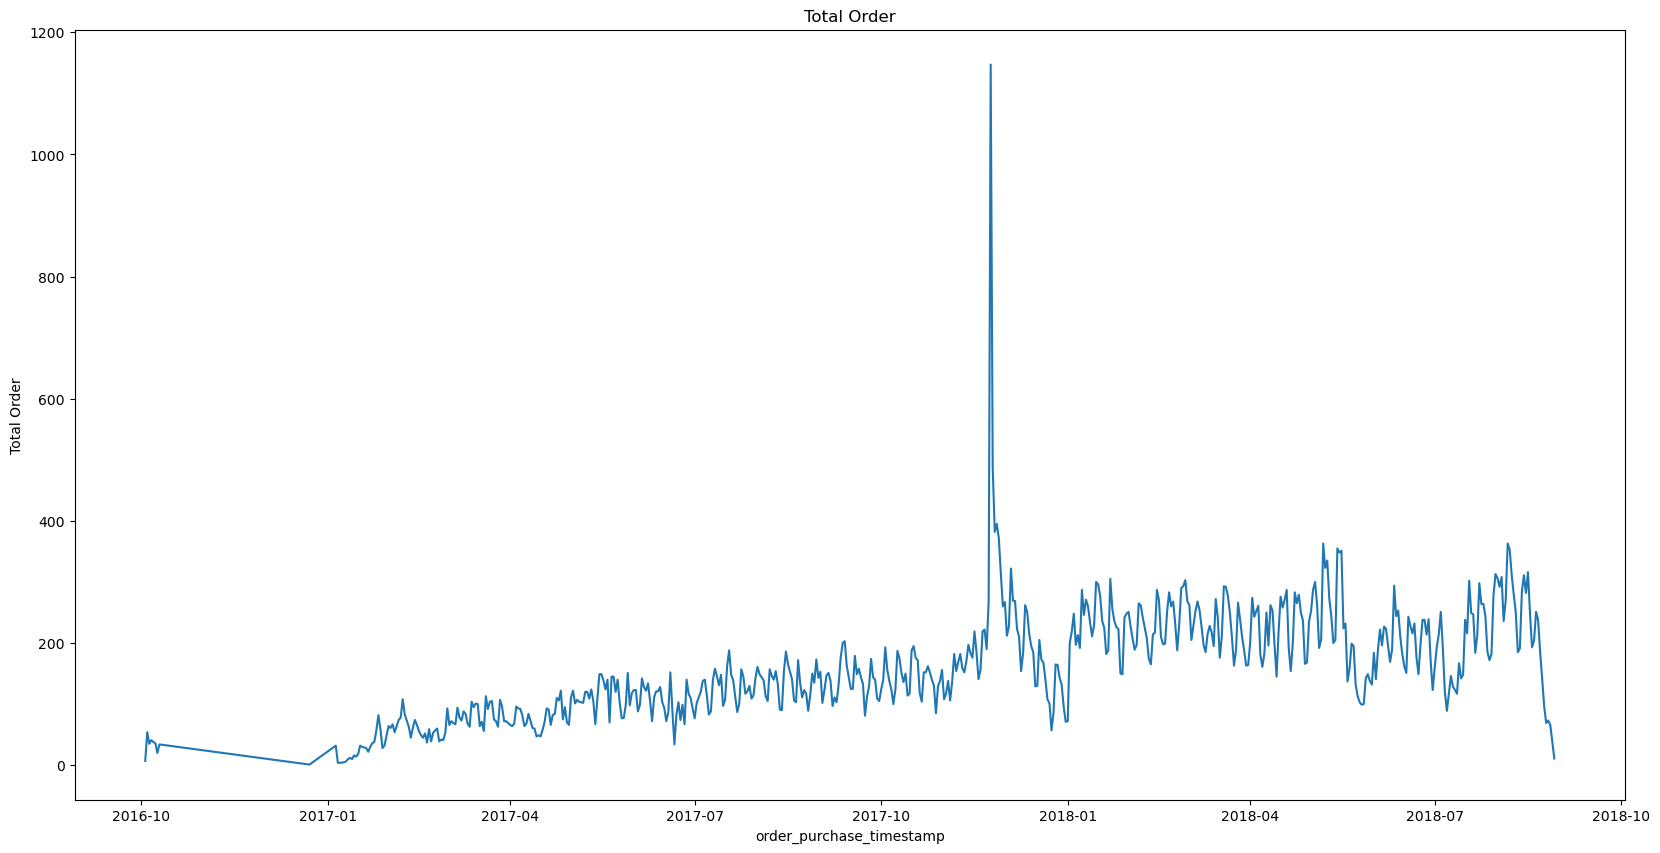

In [118]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_price,x='order_purchase_timestamp',y='Total Order')
plt.title('Total Order')
plt.show()

Insight  

We observe a **significant increase** in orders and profit around **November 2017**.  
We will conduct a **deeper analysis** in the next section to explore potential reasons behind this trend.

### 1.2. Seasonal Trends  

In this section, we will analyze **monthly profit trends** to identify:  

- The **highest-grossing month**  
- The **lowest-performing month**

In [119]:
# Grouping year and month to find the net profit and total order
df_price.groupby(['year','month']).agg({'net_profit':'sum','Total Order':'sum'}).sort_values(by='net_profit',ascending=False)

net_profit  Total Order
year month                          
2017 11     177797.7666         7289
2018 5      175958.0442         6749
     4      175236.1362         6798
     3      171604.1250         7003
     1      166436.1000         7069
     7      156231.6228         6159
     6      154094.0148         6099
     8      150943.7952         6351
     2      148758.6834         6555
2017 12     130685.9742         5513
     10     116684.5770         4478
     9      109331.9406         4150
     8       99845.9460         4193
     5       88080.8850         3546
     7       86688.8136         3872
     6       75946.2066         3135
     3       64655.7930         2546
     4       61320.5424         2303
     2       42160.2120         1653
     1       20123.7048          750
2016 10       7258.5198          265
     12          1.9620            1

Insight : 

- The **highest profit month** was **November 2017**.  
- The **worst-performing months** were **October 2016** and **January 2017**.  

**Note:** October 2016 marks the **first operational month**, so its performance is not considered a meaningful insight.

<hr>

**Black Friday Impact (November 2017)**

Brazil held **Black Friday** in **November 2017**, which explains the **significant spike** in orders and profit.  
However, a **sharp decline** followed at the end of the year, with sales picking up again in January.  

- **Total orders in November:** 7289

Recommendation :

- **Prepare attractive promotions** for **November 2018** to capitalize on Black Friday sales.  
- **Notify sellers** in advance to ensure they are ready for a surge in orders.  

We will analyze **Black Friday trends in more detail** in the next section.  

[reference]('https://www.statista.com/topics/6451/black-friday-e-commerce-in-brazil/#:~:text=In%20Brazil%2C%20e%2Dcommerce%20on,Mother's%20Day%2C%20and%20Father's%20Day.)


#### 1.2.a. Total Net Profit Trends Year on Year 2017 and 2018

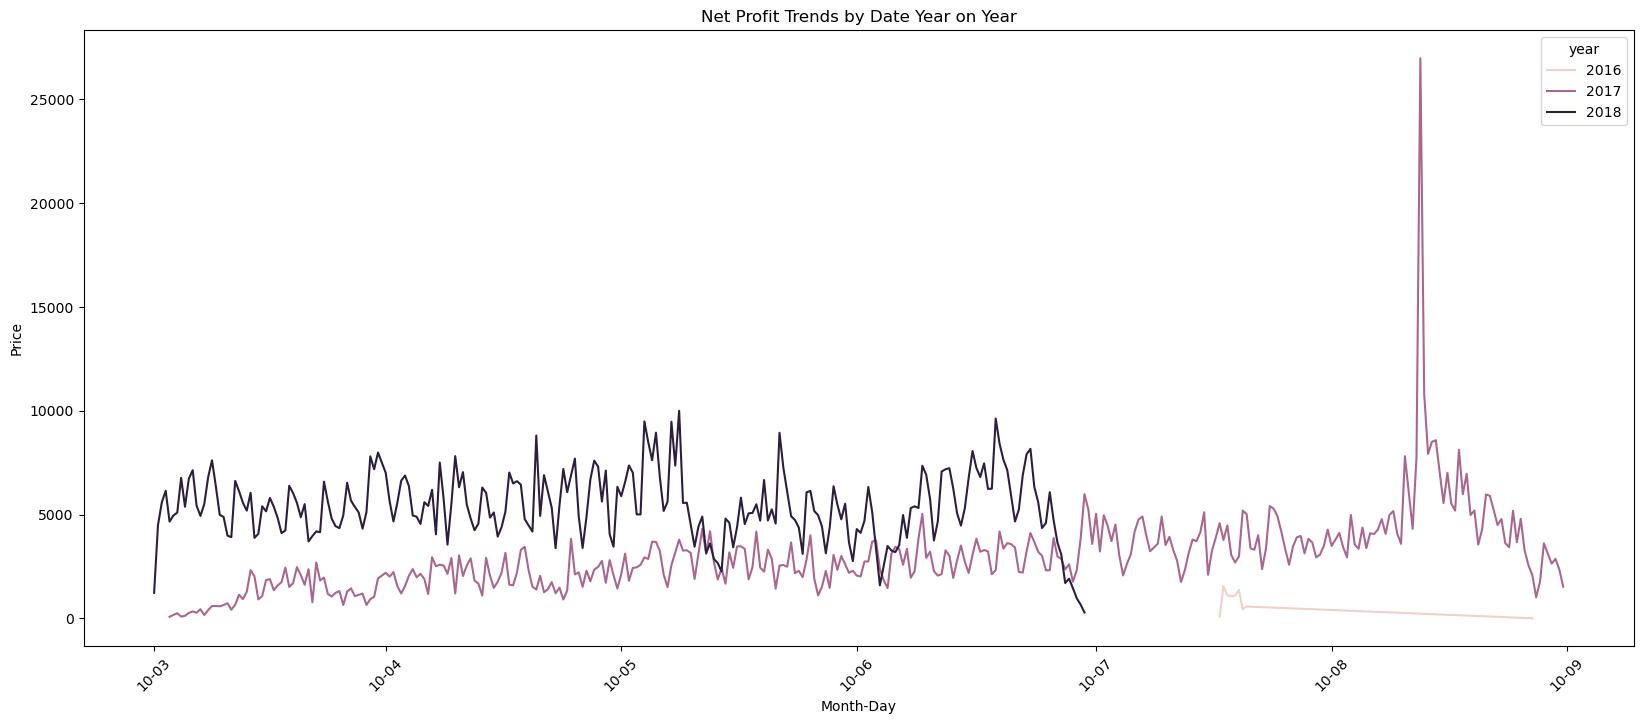

In [120]:
# Plot the line chart with hue on year
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=df_price, x='date_month', y='net_profit', hue='year')

# Format x-axis labels to show only "MM-DD"
ax.set_xticklabels(df_price['date_month'].dt.strftime('%m-%d'), rotation=45)

# Labels and title
plt.xlabel('Month-Day')
plt.ylabel('Price')
plt.title('Net Profit Trends by Date Year on Year')

plt.show()

In [121]:
print(f'''The revenue from sold products has increased significantly year over year : {((df_price.groupby('year')[['net_profit']].sum().loc[2018]-df_price.groupby('year')[['net_profit']].sum().loc[2017])/df_price.groupby('year')[['net_profit']].sum().loc[2017]*100).values[0].round()}%''')

The revenue from sold products has increased significantly year over year : 21.0%


### 1.3 Seller & Buyer Growth Trend

In this section, we will analyze the **growth trends** for both **sellers** and **buyers** over time.  

#### 1.3.1 Seller Trend  

To analyze seller growth, we will:  

1. Determine the **first time a seller joined** by identifying their **first recorded order**.  
2. **Group sellers by their joining month**.  
3. Calculate the **number of new sellers joining each month**.  

In [122]:
print(f'Total Seller : {df_seller['seller_id_new'].nunique()}')

Total Seller : 3095


In [123]:
# Grouping seller_id to find the first time seller join Olist
df_seller_growth = df_seller
df_seller_growth['month_year'] = df_seller_growth['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_seller_first_join = df_seller_growth.groupby('seller_id_new')['month_year'].min().reset_index()
df_seller_first_join.rename(columns={'month_year': 'first_join_month'}, inplace=True)

df_seller_joined_by_month = df_seller_first_join.groupby('first_join_month')['seller_id_new'].count().reset_index()
df_seller_joined_by_month.rename(columns={'seller_id_new': 'new_sellers'}, inplace=True)
df_seller_joined_by_month['year'] = df_seller_joined_by_month['first_join_month'].str[:4]
df_seller_joined_by_month['month'] =  df_seller_joined_by_month['first_join_month'].str[-2:]
df_seller_joined_by_month

first_join_month  new_sellers  year month
0           2016-10          143  2016    10
1           2016-12            1  2016    12
2           2017-01          151  2017    01
3           2017-02          228  2017    02
4           2017-03          173  2017    03
5           2017-04          116  2017    04
6           2017-05          124  2017    05
7           2017-06           76  2017    06
8           2017-07          115  2017    07
9           2017-08          129  2017    08
10          2017-09          127  2017    09
11          2017-10          148  2017    10
12          2017-11          190  2017    11
13          2017-12           90  2017    12
14          2018-01          141  2018    01
15          2018-02          120  2018    02
16          2018-03          113  2018    03
17          2018-04          202  2018    04
18          2018-05          172  2018    05
19          2018-06          191  2018    06
20          2018-07          190  2018    07
21          2018-08          155  2018    08

In [124]:
# Group by year and month
df_seller_joined_by_month.groupby(['year','month']).agg({'new_sellers':'sum'}).sort_values(by='new_sellers',ascending=False)

new_sellers
year month             
2017 02             228
2018 04             202
     06             191
2017 11             190
2018 07             190
2017 03             173
2018 05             172
     08             155
2017 01             151
     10             148
2016 10             143
2018 01             141
2017 08             129
     09             127
     05             124
2018 02             120
2017 04             116
     07             115
2018 03             113
2017 12              90
     06              76
2016 12               1

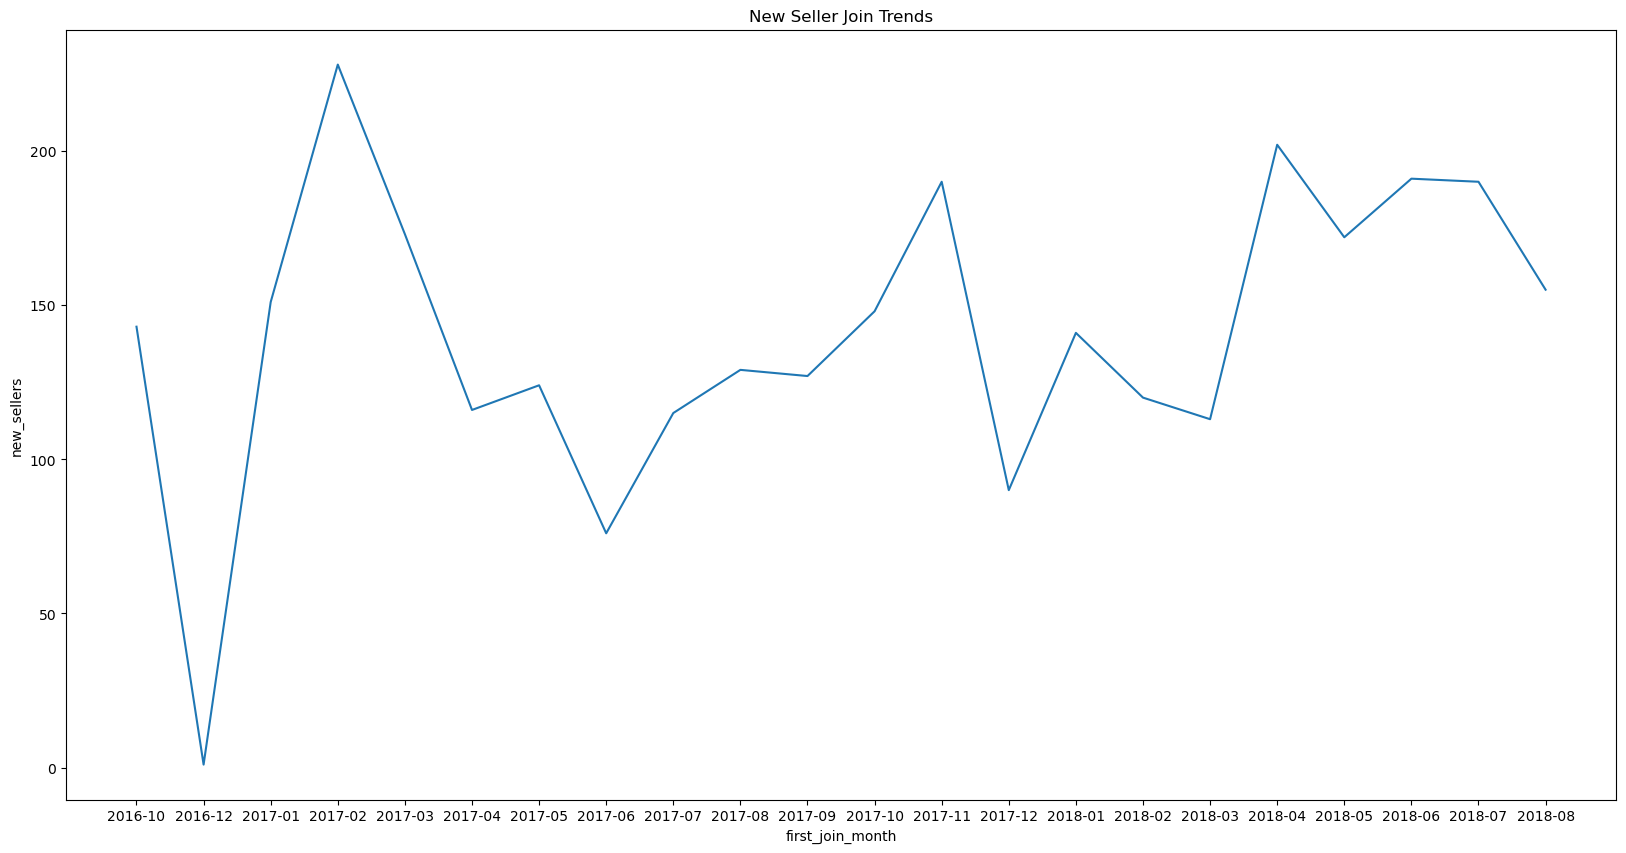

In [125]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_seller_joined_by_month,x='first_join_month',y='new_sellers')
plt.title('New Seller Join Trends')
plt.show()

Insight :

We observe a **spike in new sellers** at the **beginning** and **end of the year**.  

Recommendation :

To capitalize on this trend, we should focus on **acquiring new sellers** around these peak periods.

#### 1.3.2. Buyer Trend  

To analyze buyer growth, we will:  

1. Determine the **first time a buyer joined** by identifying their **first recorded order**.  
2. **Group buyer by their joining month**.  
3. Calculate the **number of new buyer joining each month**.  

In [802]:
print(f'Total Seller : {df_buyer['customer_unique_id_new'].nunique()}')

Total Seller : 95417


In [803]:
# Grouping customer_unique_id_new to find the first time buyer order from Olist
df_buyer_growth = df_buyer
df_buyer_growth['month_year'] = df_buyer_growth['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_buyer_first_join = df_buyer_growth.groupby('customer_unique_id_new')['month_year'].min().reset_index()
df_buyer_first_join.rename(columns={'month_year': 'first_join_month'}, inplace=True)

df_buyer_joined_by_month = df_buyer_first_join.groupby('first_join_month')['customer_unique_id_new'].count().reset_index()
df_buyer_joined_by_month.rename(columns={'customer_unique_id_new': 'new_buyers'}, inplace=True)
df_buyer_joined_by_month

df_buyer_joined_by_month['year'] = df_buyer_joined_by_month['first_join_month'].str[:4]
df_buyer_joined_by_month['month'] =  df_buyer_joined_by_month['first_join_month'].str[-2:]
df_buyer_joined_by_month

first_join_month  new_buyers  year month
0           2016-10         305  2016    10
1           2016-12           1  2016    12
2           2017-01         754  2017    01
3           2017-02        1705  2017    02
4           2017-03        2595  2017    03
5           2017-04        2339  2017    04
6           2017-05        3560  2017    05
7           2017-06        3114  2017    06
8           2017-07        3843  2017    07
9           2017-08        4149  2017    08
10          2017-09        4090  2017    09
11          2017-10        4412  2017    10
12          2017-11        7217  2017    11
13          2017-12        5442  2017    12
14          2018-01        6983  2018    01
15          2018-02        6422  2018    02
16          2018-03        6947  2018    03
17          2018-04        6709  2018    04
18          2018-05        6604  2018    05
19          2018-06        5934  2018    06
20          2018-07        6054  2018    07
21          2018-08        6238  2018    08

Text(0.5, 1.0, 'New Buyer Join Trends')

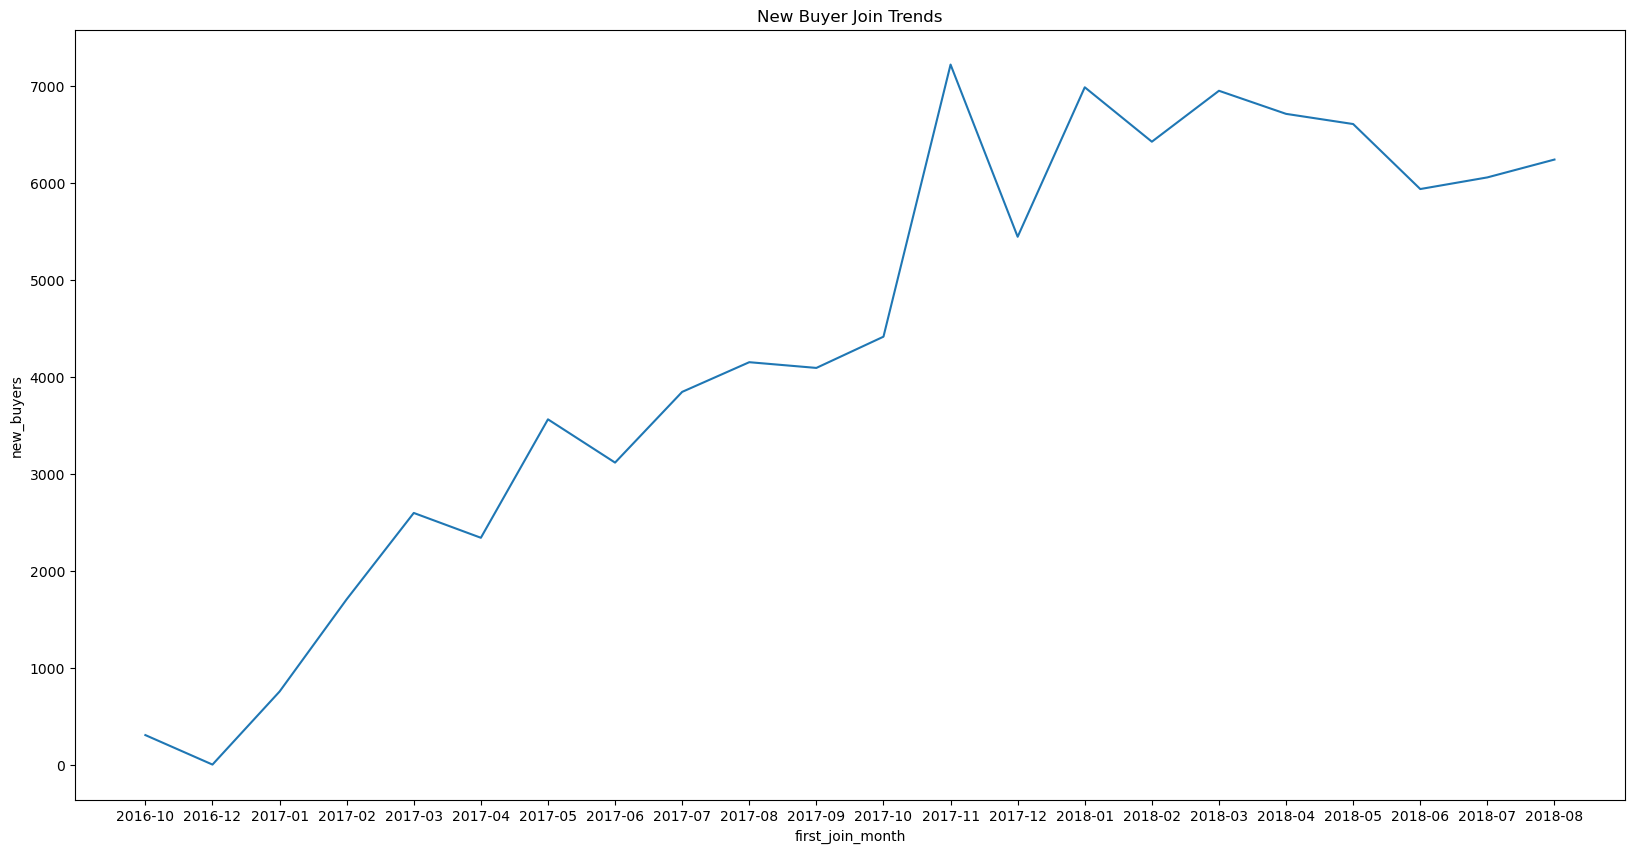

In [804]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_buyer_joined_by_month,x='first_join_month',y='new_buyers')
plt.title('New Buyer Join Trends')

In [805]:
df_buyer_joined_by_month.groupby(['year','month']).agg({'new_buyers':'sum'}).sort_values(by='new_buyers',ascending=False)

new_buyers
year month            
2017 11           7217
2018 01           6983
     03           6947
     04           6709
     05           6604
     02           6422
     08           6238
     07           6054
     06           5934
2017 12           5442
     10           4412
     08           4149
     09           4090
     07           3843
     05           3560
     06           3114
     03           2595
     04           2339
     02           1705
     01            754
2016 10            305
     12              1

Insight :

In **November 2017**, we observed a **significant increase in buyers**, which we can anticipate for **November 2018**.  

The **highest buyer acquisition** occurred in **November 2017**, followed by a peak in **January 2018**. This growth can be attributed to **Black Friday** and **New Year sales** driving buyer activity.  

There was a **decline starting in March 2018**, reaching the **lowest point in June**.  

The sharp rise from **January 2017 (754 buyers)** to **November 2017 (7,217 buyers)** suggests that **2017 was a breakout year**, likely driven by better **marketing**, **expansion**, or **seasonal events**.

### 1.4. Correlation Between Product Variety and Profit  

We will analyze whether the **number of products** offered by sellers has an impact on **profit**.

In [806]:
# Count unique product IDs per year
unique_products_per_year = df_business.query("order_status=='delivered'").groupby('year')['product_id_new'].nunique().reset_index()
unique_products_per_year.columns = ['year', 'unique_product_count']

# Sum net profit per year
net_profit_per_year = df_business.groupby('year')['net_profit'].sum().reset_index()

# Merge both datasets
yearly_data = unique_products_per_year.merge(net_profit_per_year, on='year')

# Calculate Year-over-Year (YoY) Change
yearly_data['unique_product_change'] = yearly_data['unique_product_count'].pct_change()
yearly_data['net_profit_change'] = yearly_data['net_profit'].pct_change()

# Drop NaN values (as first year will have NaN due to pct_change)
yearly_data = yearly_data.dropna()

yearly_data



year  unique_product_count    net_profit  unique_product_change  \
1  2017                 16803  1.108045e+06              69.012500   
2  2018                 20174  1.329489e+06               0.200619   

   net_profit_change  
1         123.313126  
2           0.199851

In [807]:
correlation = yearly_data['unique_product_change'].corr(yearly_data['net_profit_change'],method='spearman')

# conclusion
if correlation > 0:
    if 0 < correlation <= 0.2:
        print(f'''Correlation Score = {correlation}. very weak (tidak memiliki korelasi) | Direction : Positive''')
    elif 0.2 < correlation <= 0.4:
        print(f'''Correlation Score  = {correlation}. weak | Direction : Positive''')
    elif 0.4 < correlation <= 0.6:
        print(f'''Correlation Score  = {correlation}. moderate | Direction : Positive''')
    elif 0.6 < correlation <= 0.9:
        print(f'''Correlation Score  = {correlation}. strong | Direction : Positive''')
    elif correlation <= 1 :
        print(f'''Correlation Score  = {correlation}. very strong | Direction : Positive''')
else:
    if -0.2 <= correlation < 0:
        print(f'''Correlation Score = {correlation}. very weak (tidak memiliki korelasi) | Direction : Negative''')
    elif -0.4 <= correlation < -0.2:
        print(f'''Correlation Score  = {correlation}. weak | Direction : Negative''')
    elif -0.6 <= correlation <= -0.4:
        print(f'''Correlation Score  = {correlation}. moderate Direction : Negative''')
    elif -0.9 <= correlation <= 0.6:
        print(f'''Correlation Score  = {correlation}. strong | Direction : Negative''')
    elif correlation <= -1 :
        print(f'''Correlation Score  = {correlation}. very strong | Direction : Negative''')



Correlation Score  = 0.9999999999999999. very strong | Direction : Positive


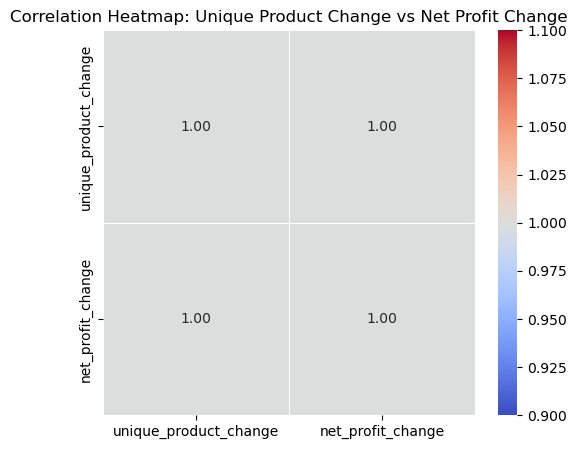

In [808]:
# Calculate correlation matrix (only for the two selected columns)
correlation_matrix = yearly_data[['unique_product_change', 'net_profit_change']].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap: Unique Product Change vs Net Profit Change")
plt.show()

Insight :  

There is a **significant correlation** between the **variety of products** and the **profit** earned. The more product variations a seller offers, the higher the profit they tend to generate.  

Recommendation :

To maximize profit, we recommend **acquiring more sellers** who can offer a **wide variety of products**.

### 1.5. Pareto Analysis  

In this analysis, we will identify specific categories to focus on for maximizing profit. This approach will help with long-term development.  

Pareto analysis involves identifying key areas where selling a small percentage of products can contribute to **80% of the profit**. 

We will do this :

1. Creating tabel that contain count of count seller_id, product_id, and order_id
2. Creating tabel that contain category with the most profit
3. Merge those to find top category with seller
4. Calculate profit_per_Seller by divide net_profit / Total_Seller to know worth of per seller
5. Doing cumulative sum of net profit to know where the limit of 80% of net profit and divide it with all profit to get the percent
6. Find where the category net profit cover 80% of all profit


In [809]:
# Groupin category and count seller_id, product_id, and order_id
df_seller_unique = df_seller.query("order_status=='delivered'").groupby('product_category_name_english').agg({'seller_id_new':'nunique','product_id_new':'nunique','order_id_new':'nunique'}).sort_values(by='seller_id_new',ascending=False).reset_index()
df_seller_unique.head()

product_category_name_english  seller_id_new  product_id_new  order_id_new
0                 health_beauty            479            2397          8646
1                sports_leisure            466            2822          7530
2                    housewares            452            2282          5743
3                          auto            371            1853          3810
4               furniture_decor            352            2593          6307

In [810]:
# Grouping to find which category with the most profit
df_top_category = df_business.query("order_status=='delivered'").groupby("product_category_name_english")['net_profit'].sum().reset_index().sort_values(by='net_profit',ascending=False)
df_top_category.head()

product_category_name_english   net_profit
44                 health_beauty  221939.4150
71                 watches_gifts  209911.8564
8                 bed_bath_table  184218.2568
66                sports_leisure  171873.4590
16         computers_accessories  159970.4298

In [811]:
# Merge table and creating profit_per_Seller by divide net_profit / Total_Seller
df_top_category_with_seller = df_top_category.merge(df_seller_unique,how='left',on='product_category_name_english').rename(columns={'seller_id_new':'Total_Seller','order_id_new':'total_order'})
df_top_category_with_seller['profit_per_Seller'] = df_top_category_with_seller['net_profit']/df_top_category_with_seller['Total_Seller']
df_top_category_with_seller.sort_values(by='profit_per_Seller',ascending=False).head(10)

product_category_name_english   net_profit  Total_Seller  \
16                              computers   39363.1452             9   
1                           watches_gifts  209911.8564            95   
14                       office_furniture   48267.7758            30   
2                          bed_bath_table  184218.2568           189   
35  small_appliances_home_oven_and_coffee    8386.1208            14   
4                   computers_accessories  159970.4298           279   
31                           home_confort   10441.5210            20   
18                    musical_instruments   33176.8332            67   
0                           health_beauty  221939.4150           479   
26                      home_appliances_2   19431.7110            45   

    product_id_new  total_order  profit_per_Seller  
16              30          177        4373.682800  
1             1300         5495        2209.598488  
14             302         1254        1608.925860  
2             2991         9272         974.699771  
35              30           72         599.008629  
4             1600         6530         573.370716  
31             111          392         522.076050  
18             279          611         495.176615  
0             2397         8646         463.339071  
26              88          227         431.815800

In [812]:
# Find when rank of category will cover 80% of sum profit

df_sorted = df_top_category_with_seller.sort_values(by='net_profit', ascending=False)
df_sorted['cumulative_profit'] = df_sorted['net_profit'].cumsum()
df_sorted['cumulative_percentage'] = df_sorted['cumulative_profit'] / df_sorted['net_profit'].sum() * 100
df_sorted['net_overal_percentage'] = round(df_sorted['net_profit']/df_sorted['net_profit'].sum()*100)
pareto_threshold = df_sorted[df_sorted['cumulative_percentage'] <= 80]
pareto_threshold[['product_category_name_english','cumulative_percentage']]



product_category_name_english  cumulative_percentage
0                  health_beauty               9.325791
1                  watches_gifts              18.146190
2                 bed_bath_table              25.886956
3                 sports_leisure              33.108999
4          computers_accessories              39.830883
5                furniture_decor              45.215560
6                     housewares              49.871878
7                     cool_stuff              54.487166
8                           auto              58.866190
9                           toys              62.430773
10                  garden_tools              65.989372
11                          baby              69.017970
12                     perfumery              71.968835
13                     telephony              74.312468
14              office_furniture              76.340658
15                    stationery              78.033287
16                     computers              79.687308

In [813]:
percent_cat_pareto = round(pareto_threshold['product_category_name_english'].count()/df_sorted['product_category_name_english'].count()*100)
percent_cat_pareto

24

In [814]:
# Finding which category that low in seller and product_id in pareto
pareto_threshold.sort_values(by=['Total_Seller', 'profit_per_Seller'], ascending=[True, False]).head()

product_category_name_english   net_profit  Total_Seller  product_id_new  \
16                     computers   39363.1452             9              30   
14              office_furniture   48267.7758            30             302   
1                  watches_gifts  209911.8564            95            1300   
13                     telephony   55774.8414           142            1112   
15                    stationery   40281.9642           172             831   

    total_order  profit_per_Seller  cumulative_profit  cumulative_percentage  \
16          177        4373.682800       1.896435e+06              79.687308   
14         1254        1608.925860       1.816790e+06              76.340658   
1          5495        2209.598488       4.318513e+05              18.146190   
13         4093         392.780573       1.768522e+06              74.312468   
15         2264         234.197466       1.857072e+06              78.033287   

    net_overal_percentage  
16                    2.0  
14                    2.0  
1                     9.0  
13                    2.0  
15                    2.0

Insight :

By focusing on the **16 categories (24%)** out of the total **72 categories**, we can cover up to **80% of total revenue**.  

We can focus on:  

- Increasing sales in **high-performing categories**.  
- Exploring categories with **few sellers but high profit per seller**, such as **computers**, **office furniture**, and **watches & gifts**, which have potential for growth.  

However, further research is needed to determine whether these categories are **niche** or not.  


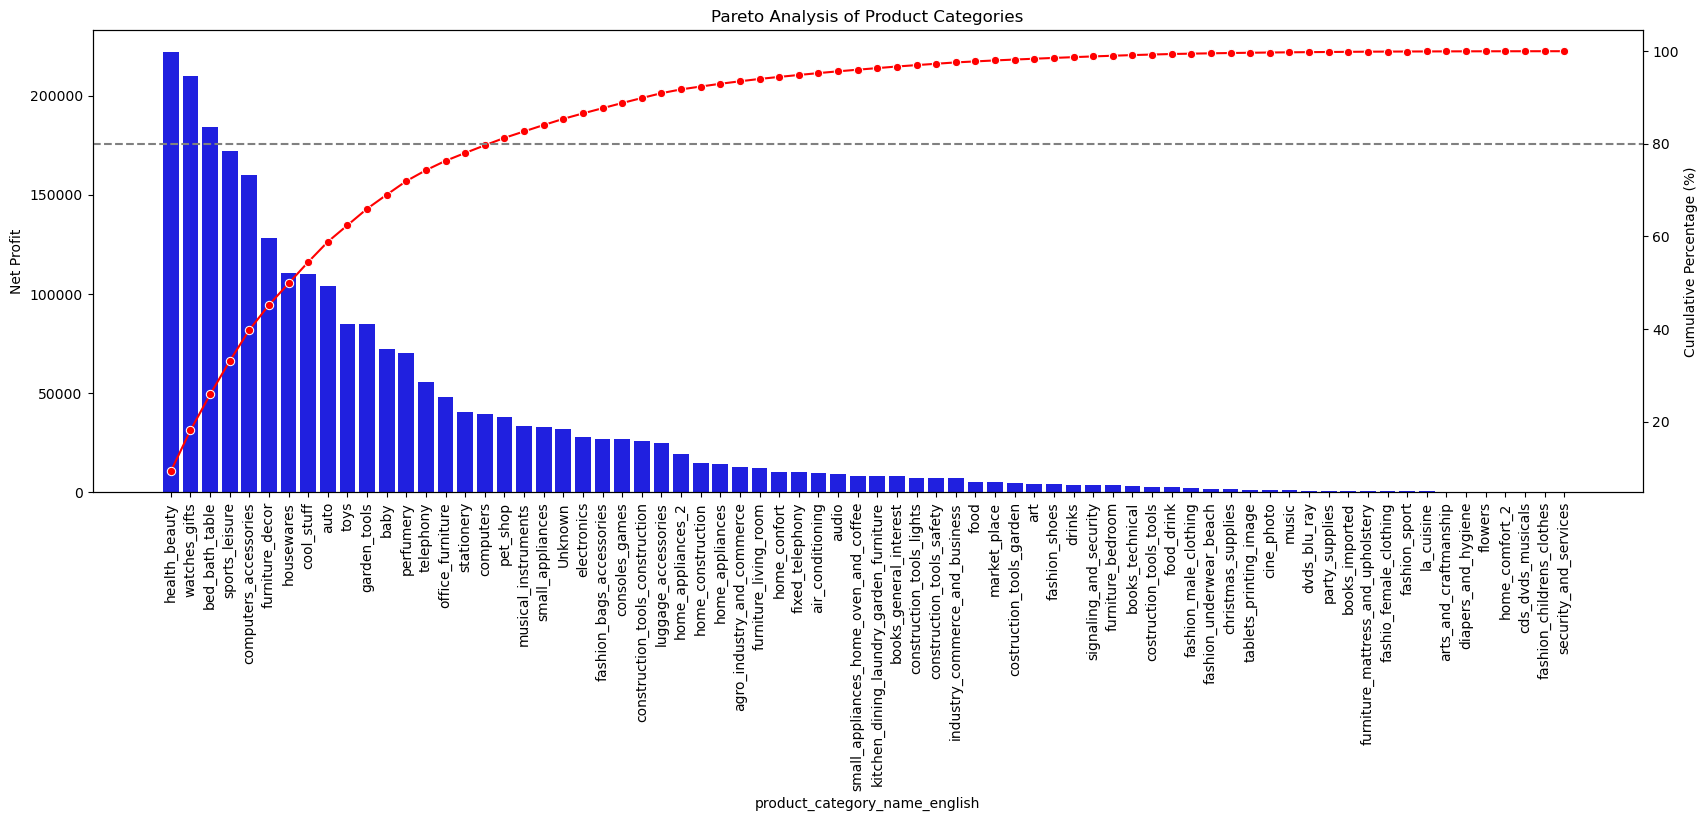

In [815]:
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar chart for net profit
sns.barplot(x=df_sorted['product_category_name_english'], y=df_sorted['net_profit'], color='blue', ax=ax1)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=df_sorted['product_category_name_english'], y=df_sorted['cumulative_percentage'], marker='o', color='red', ax=ax2)

# Labels & threshold line
ax2.axhline(y=80, color='gray', linestyle='--')  # 80% threshold line
ax1.set_xticklabels(df_sorted['product_category_name_english'], rotation=90)
ax1.set_ylabel('Net Profit')
ax2.set_ylabel('Cumulative Percentage (%)')
plt.title('Pareto Analysis of Product Categories')

plt.show()

Insight :

Expanding the product variety in **Pareto categories** is the best strategy.

Additionally, since **Olist** does not require inventory storage in warehouses and products are directly stored with the sellers and shipped to buyers, this model provides a **great opportunity** to increase product category offerings without additional logistical costs.  


### 1.6. Black Friday Anticipation for Short Term  

To prepare for **Black Friday**, we will focus on identifying the best-performing categories for promotions and seller readiness. We will look at these categories from **three perspectives**:  

1. **Top Categories by Total Orders and Net Price**: Categories with **high total orders** but also **high profit**.  
2. **Categories with High Net Profit per Order**: Identifying which categories are most profitable per order.  
3. **Hidden Opportunities**: Categories with **low orders** but **high profit potential**.  

These insights will help us select the best categories to focus on for short-term growth during the Black Friday period.

In [816]:
# Finding total order by category
df_black_friday = df_buyer.query("order_status=='delivered'")[df_buyer['month_year']=='2017-11']
df_black_friday_grouped = df_black_friday['product_category_name_english'].value_counts().reset_index()
df_black_friday_grouped = df_black_friday_grouped.rename(columns={'count':'total_order'})
df_black_friday_grouped.head(10)

product_category_name_english  total_order
0                bed_bath_table          961
1               furniture_decor          767
2                sports_leisure          597
3                 health_beauty          573
4                  garden_tools          547
5         computers_accessories          512
6                          toys          485
7                 watches_gifts          463
8                    housewares          412
9                     telephony          371

In [817]:
# Finding total net_price by category
df_black_friday_net_price = (df_black_friday.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)*18/100).reset_index().rename(columns={'price':'net_price'})
df_black_friday_net_price.head()

product_category_name_english   net_price
0                 watches_gifts  17152.6212
1                bed_bath_table  15832.3734
2                 health_beauty  14089.3920
3         computers_accessories  12541.7376
4                sports_leisure  11283.5232

In [818]:
# Merge the total order with net_price
df_black_friday_grouped = df_black_friday_grouped.merge(df_black_friday_net_price,on="product_category_name_english",how='left')
df_black_friday_grouped.head(10)

product_category_name_english  total_order   net_price
0                bed_bath_table          961  15832.3734
1               furniture_decor          767  11176.4286
2                sports_leisure          597  11283.5232
3                 health_beauty          573  14089.3920
4                  garden_tools          547   7969.5324
5         computers_accessories          512  12541.7376
6                          toys          485  11270.0268
7                 watches_gifts          463  17152.6212
8                    housewares          412   6097.0356
9                     telephony          371   4701.1734

#### 1.6.a. **High Profit Categories**  

In this section, we will identify the best-performing categories based on **net price**. 

These categories will help us expand and capitalize on what is already performing well in terms of **sales**. 

In [819]:
df_black_friday_grouped.sort_values(by='net_price',ascending=False).head(10)

product_category_name_english  total_order   net_price
7                  watches_gifts          463  17152.6212
0                 bed_bath_table          961  15832.3734
3                  health_beauty          573  14089.3920
5          computers_accessories          512  12541.7376
2                 sports_leisure          597  11283.5232
6                           toys          485  11270.0268
1                furniture_decor          767  11176.4286
11                    cool_stuff          297  10025.3988
4                   garden_tools          547   7969.5324
12                          auto          260   6252.5682

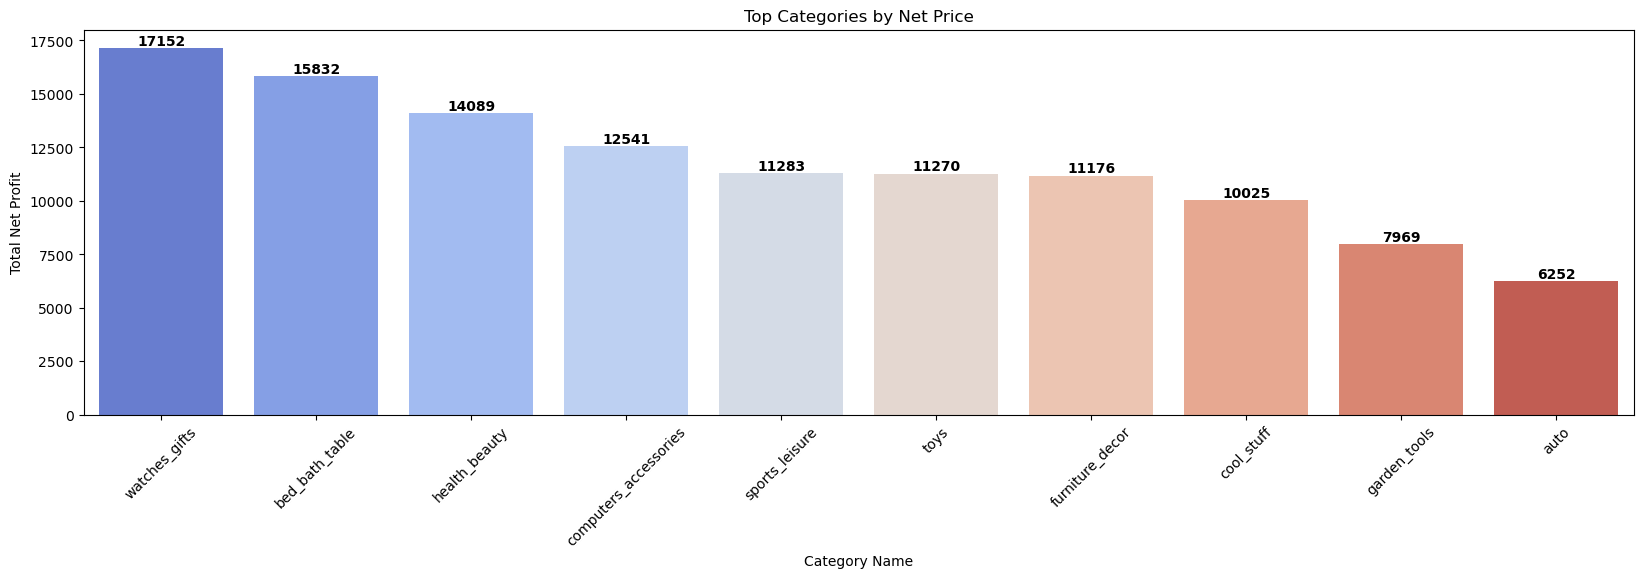

In [820]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(df_black_friday_grouped.sort_values(by='net_price',ascending=False).head(10), x='product_category_name_english', y='net_price',palette="coolwarm")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer for cleaner display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Top Categories by Net Price")
plt.xlabel("Category Name")
plt.ylabel("Total Net Profit")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

#### 1.6.b. **Categories with High Net Profit per Order**  

In this section, we will focus on the most **profitable categories**, identified by the **highest net profit per order**.  

The more orders a category generates, the greater the **net profit** it will yield. This analysis will help us focus on the categories that contribute the most profit.

We calculate this by dividing **net price** by **total orders**.

In [821]:
# creating profit_per_order by divide net_price / total_order
df_black_friday_grouped['profit_per_order'] = df_black_friday_grouped['net_price'] / df_black_friday_grouped['total_order']
df_black_friday_grouped.sort_values(by='profit_per_order',ascending=False).head(10)[['product_category_name_english','total_order','profit_per_order']]

product_category_name_english  total_order  profit_per_order
46                       computers            7        251.177143
35      agro_industry_and_commerce           19        131.992011
24             musical_instruments           42         67.615243
42               home_appliances_2           13         67.222108
48  industry_commerce_and_business            6         59.846100
59               furniture_bedroom            3         52.380000
55                  party_supplies            3         51.042000
31                small_appliances           28         43.604486
63                      cine_photo            1         43.560000
41       construction_tools_safety           14         42.180300

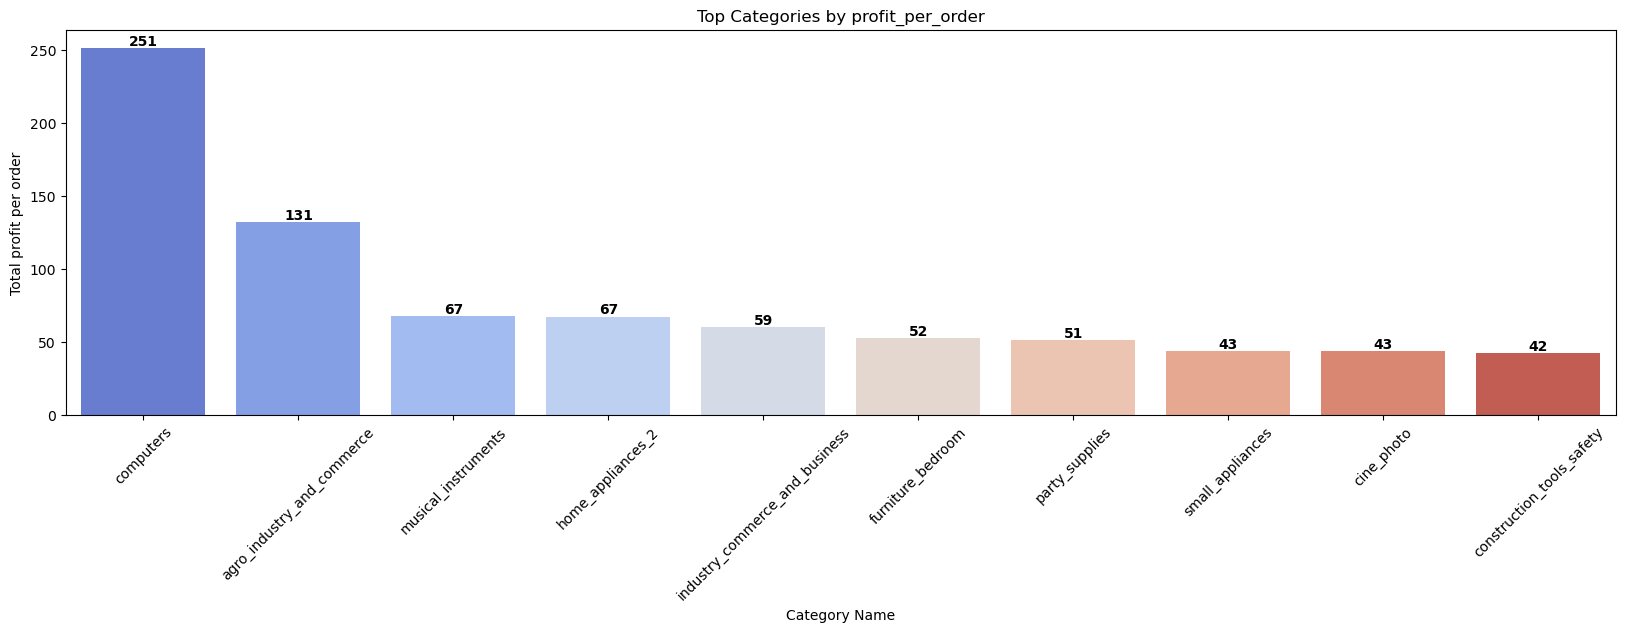

In [822]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(df_black_friday_grouped.sort_values(by='profit_per_order',ascending=False).head(10)[['product_category_name_english','total_order','profit_per_order']], x='product_category_name_english', y='profit_per_order',palette="coolwarm")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer for cleaner display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Top Categories by profit_per_order")
plt.xlabel("Category Name")
plt.ylabel("Total profit per order")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

#### 1.6.c.**Hidden Opportunities: Low Orders but High Profit Potential**

In this analysis, we square both **net price** and **total orders** to uncover potential opportunities. 

This method ensures that **total orders** and **net price** are given equal weight, allowing us to find categories that may have low orders but still possess high profit potential.

we will limit to order that get more than 6 order, This will capture the bottom 25% as niche and the rest as not niche.

$$
\text{Hidden\_Opportunity\_Score} = \frac{\text{net\_price}^2}{\text{total\_orders}^2}
$$


In [823]:
# Filter out rows where total_order is less than 6 which came from quantile 25
df_black_friday_hidden = df_black_friday_grouped[df_black_friday_grouped['total_order'] >= df_black_friday_grouped['total_order'].quantile(0.25)]

# Calculate Hidden Opportunity Score using the new formula
df_black_friday_hidden['Hidden_Opportunity_Score'] = round(
    (df_black_friday_hidden['net_price'] ** 2) / (df_black_friday_hidden['total_order'] ** 2)
)

# Sort the data by the Hidden Opportunity Score and get the top 5
df_black_friday_hidden_sorted = df_black_friday_hidden.sort_values(by=['Hidden_Opportunity_Score'], ascending=False).head(10)

# Display the top 10 results
df_black_friday_hidden_sorted


product_category_name_english  total_order   net_price  profit_per_order  \
46                       computers            7   1758.2400        251.177143   
35      agro_industry_and_commerce           19   2507.8482        131.992011   
24             musical_instruments           42   2839.8402         67.615243   
42               home_appliances_2           13    873.8874         67.222108   
48  industry_commerce_and_business            6    359.0766         59.846100   
31                small_appliances           28   1220.9256         43.604486   
41       construction_tools_safety           14    590.5242         42.180300   
45       construction_tools_lights           10    395.9064         39.590640   
36                air_conditioning           19    733.7916         38.620611   
7                    watches_gifts          463  17152.6212         37.046698   

    Hidden_Opportunity_Score  
46                   63090.0  
35                   17422.0  
24                    4572.0  
42                    4519.0  
48                    3582.0  
31                    1901.0  
41                    1779.0  
45                    1567.0  
36                    1492.0  
7                     1372.0

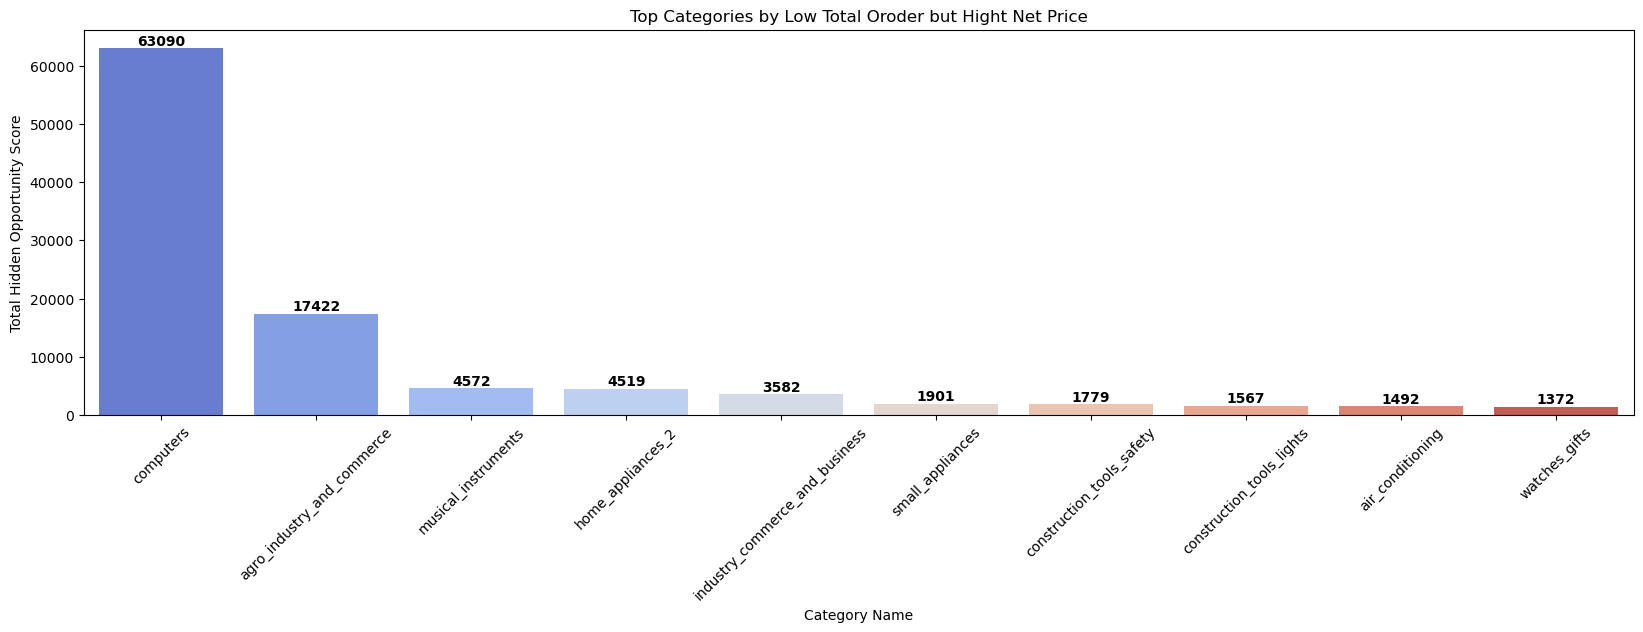

In [824]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(df_black_friday_hidden_sorted, x='product_category_name_english', y='Hidden_Opportunity_Score',palette="coolwarm")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer for cleaner display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Top Categories by Low Total Oroder but Hight Net Price")
plt.xlabel("Category Name")
plt.ylabel("Total Hidden Opportunity Score")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

Insight :

We can choose from this 3 which category that we can focus on Black Friday

### 1.7. Delivery Status

In this section, we will examine the various **delivery statuses** for all orders. These statuses reflect the different stages of the order's journey from seller to buyer. The possible delivery statuses are:

| Status        | Description                                                                  |
|---|---|
| **Approved**  | The order has been confirmed by the seller.                                  |
| **Invoiced**  | An invoice has been generated for the buyer to pay.                          |
| **Processing**| The order is being prepared by the seller.                                   |
| **Shipped**   | The order has been dispatched by the seller to the carrier.                  |
| **Delivered** | The order has reached the customer.                                          |
| **Unavailable** | The item is out of stock or cannot be processed.                            |
| **Canceled**  | The order was canceled before completion.                                    |

In [825]:
print(f'Total Order : {df_buyer['order_id_new'].nunique()}')

Total Order : 98663


In [826]:
# Grouping by order_status
df_status = df_buyer.groupby('order_id_new')['order_status'].first().reset_index()
df_status = df_status['order_status'].value_counts().reset_index()
df_status['percent'] = df_status['count']/df_status['count'].sum()*100
df_status

order_status  count    percent
0    delivered  96477  97.784377
1      shipped   1105   1.119974
2     canceled    460   0.466234
3     invoiced    312   0.316228
4   processing    301   0.305079
5  unavailable      6   0.006081
6     approved      2   0.002027

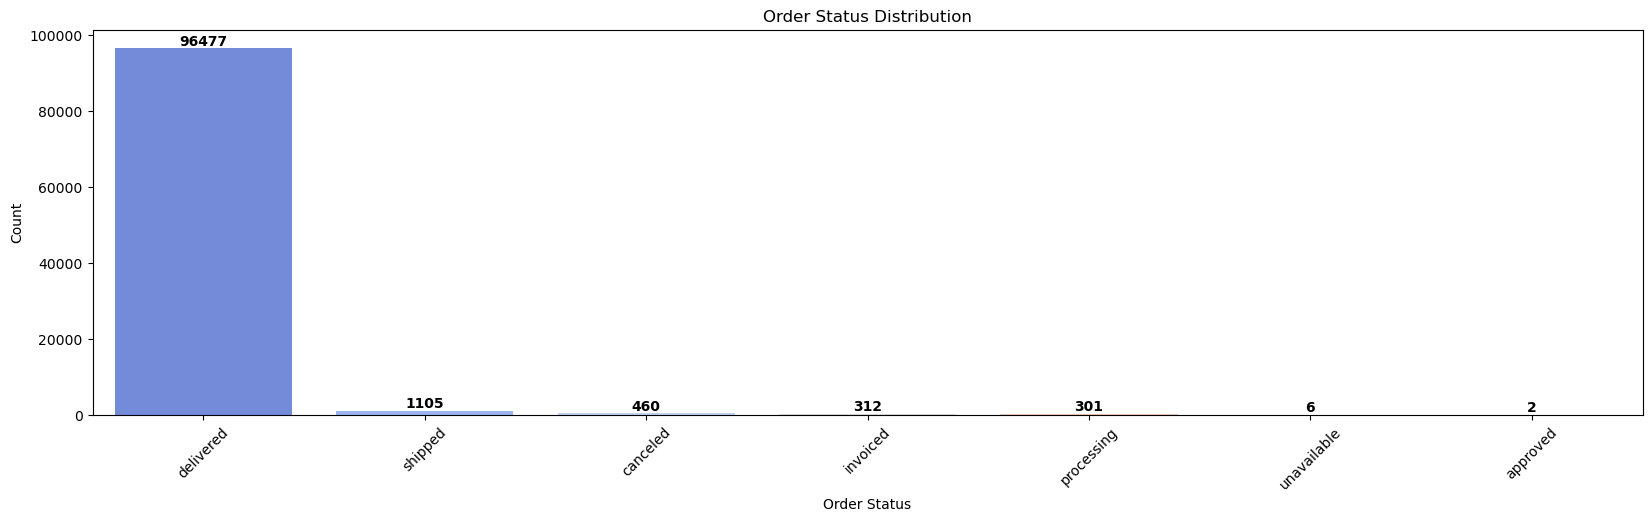

In [827]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(df_status, x='order_status', y='count',palette="coolwarm")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer for cleaner display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [828]:
print(f'Percentage order that canceled {round(df_status.loc[df_status['order_status'] == 'canceled']['percent'].item(),2)}%')

Percentage order that canceled 0.47%


Insight

From the percentage of **canceled** orders, we can observe that Olist's performance as an e-commerce platform remains strong, with the cancellation rate being **below industry benchmark which is 2% (0.47%)**.

This indicates that sellers are generally fulfilling buyers' demands, and the overall reliability of the platform is high. The low cancellation rate reflects the ability of sellers to effectively meet orders and manage inventory, contributing to a positive customer experience.

[Source]('https://www.hopstack.io/glossary/order-cancellation-rate?utm_source=chatgpt.com)

## **2. Buyer Analysis**

### 2.1. Product & Purchase Analysis

#### 2.1.a. Best Selling Products with Highest Profit

We will identify the products that generate the highest profit. This analysis will help us focus on top-performing products.

In [829]:
# Creating new column for net_profit
df_buyer['net_profit'] = df_buyer['price']*18/100
df_buyer.head()

customer_id_new    customer_unique_id_new    order_id_new  order_item_id  \
0  customer_id_65557  customer_unique_id_64072  order_id_85267              1   
1  customer_id_34265  customer_unique_id_33837  order_id_71853              1   
2  customer_id_34955  customer_unique_id_34510   order_id_6298              1   
3  customer_id_51763  customer_unique_id_50802  order_id_22550              1   
4   customer_id_7602   customer_unique_id_7581   order_id_5247              1   

     product_id_new product_category_name_english   price  \
0  product_id_25865                    cool_stuff   58.90   
1  product_id_27230                      pet_shop  239.90   
2  product_id_22624               furniture_decor  199.00   
3  product_id_15403                     perfumery   12.99   
4   product_id_8862                  garden_tools  199.90   

  order_purchase_timestamp payment_type order_status  review_score  reviewed  \
0      2017-09-13 08:59:02  credit_card    delivered           5.0      True   
1      2017-04-26 10:53:06  credit_card    delivered           4.0      True   
2      2018-01-14 14:33:31  credit_card    delivered           5.0      True   
3      2018-08-08 10:00:35  credit_card    delivered           4.0      True   
4      2017-02-04 13:57:51  credit_card    delivered           5.0      True   

  customer_zip_code_prefix customer_state  geolocation_lat  geolocation_lng  \
0                    28013             RJ       -21.762775       -41.309633   
1                    15775             SP       -20.220527       -50.903424   
2                    35661             MG       -19.870305       -44.593326   
3                    12952             SP       -23.089925       -46.611654   
4                    13226             SP       -23.243402       -46.827614   

        geolocation_city month_year  net_profit  
0  campos dos goytacazes    2017-09     10.6020  
1        santa fe do sul    2017-04     43.1820  
2          pará de minas    2018-01     35.8200  
3                atibaia    2018-08      2.3382  
4        varzea paulista    2017-02     35.9820

In [830]:
# Grouping by product_id to find total selled and net profit
df_buyer_product = df_buyer.query("order_status=='delivered'").groupby('product_id_new').agg({'order_id_new':'count','net_profit':'sum','product_category_name_english':lambda x: x.mode()[0]}).rename(columns={'order_id_new':'total_selled'}).sort_values(by='total_selled',ascending=False)
df_buyer_product.sort_values(by='net_profit',ascending=False)[['net_profit','product_category_name_english','total_selled']].head(10)

net_profit product_category_name_english  total_selled
product_id_new                                                          
product_id_16151  11440.8000                 health_beauty           194
product_id_19052   9657.4140                 health_beauty           153
product_id_29894   8270.8830                     computers            33
product_id_8290    8211.7008         computers_accessories           332
product_id_9661    7568.9388                bed_bath_table           477
product_id_29129   7340.9040         computers_accessories           272
product_id_25593   7003.3176                          baby            38
product_id_46      6792.1020                    cool_stuff            63
product_id_793     6741.8334                 watches_gifts           321
product_id_13430   6678.7740               furniture_decor           520

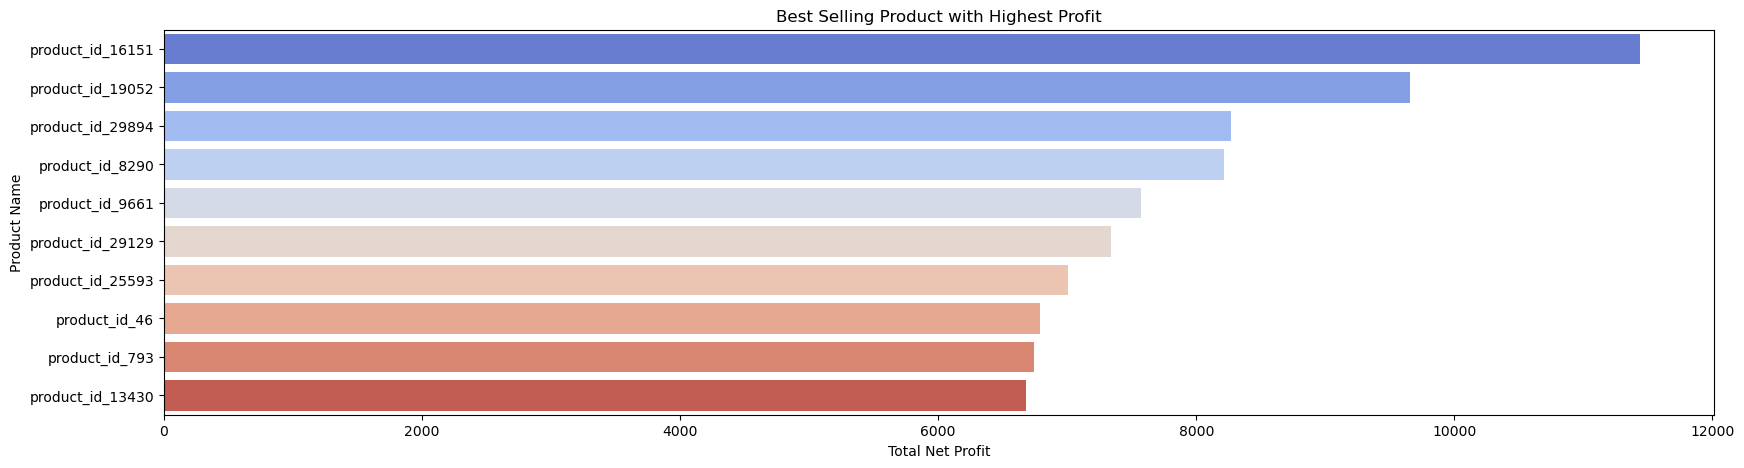

In [831]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(df_buyer_product.sort_values(by='net_profit',ascending=False).head(10), y='product_id_new', x='net_profit',palette="coolwarm")

plt.title("Best Selling Product with Highest Profit")
plt.xlabel("Total Net Profit")
plt.ylabel("Product Name")
plt.show()

#### 2.1.b. Products with Highest Sales and Profit

We will identify the products that have both the highest total sales and net profit. To achieve this, we will create a product score by:

1. Dividing each product's **net profit** and **total sales** by their respective maximum values to find their percentage.
2. Adding the resulting percentages together.

The outcome is a list of products that have both high sales and high profit, giving equal weight to both factors. This approach allows us to identify the most profitable and popular products at the same time.

$$
\text{Product Score} = \left( \frac{\text{Net Profit}}{\max(\text{Net Profit})} \right) + \left( \frac{\text{Total Selled}}{\max(\text{Total Selled})} \right)
$$


In [832]:
# Creating normalized net profit and total selled and adding to product score
df_buyer_product['normalized_net_profit'] = df_buyer_product['net_profit'] / df_buyer_product['net_profit'].max()
df_buyer_product['normalized_total_selled'] = df_buyer_product['total_selled'] / df_buyer_product['total_selled'].max()
df_buyer_product['product_score'] = df_buyer_product['normalized_net_profit'] + df_buyer_product['normalized_total_selled']

# Urutkan berdasarkan skor tertinggi
df_buyer_product_sorted = df_buyer_product.sort_values(by='product_score', ascending=False)
df_buyer_product_sorted[['total_selled','net_profit','product_category_name_english','product_score']].head(10)

total_selled  net_profit product_category_name_english  \
product_id_new                                                             
product_id_13430           520   6678.7740               furniture_decor   
product_id_9661            477   7568.9388                bed_bath_table   
product_id_16151           194  11440.8000                 health_beauty   
product_id_8290            332   8211.7008         computers_accessories   
product_id_14051           484   4783.8996                  garden_tools   
product_id_793             321   6741.8334                 watches_gifts   
product_id_29129           272   7340.9040         computers_accessories   
product_id_19052           153   9657.4140                 health_beauty   
product_id_30293           390   3840.6222                  garden_tools   
product_id_4598            388   3790.2240                  garden_tools   

                  product_score  
product_id_new                   
product_id_13430       1.583768  
product_id_9661        1.578882  
product_id_16151       1.373077  
product_id_8290        1.356217  
product_id_14051       1.348913  
product_id_793         1.206588  
product_id_29129       1.164719  
product_id_19052       1.138351  
product_id_30293       1.085695  
product_id_4598        1.077444

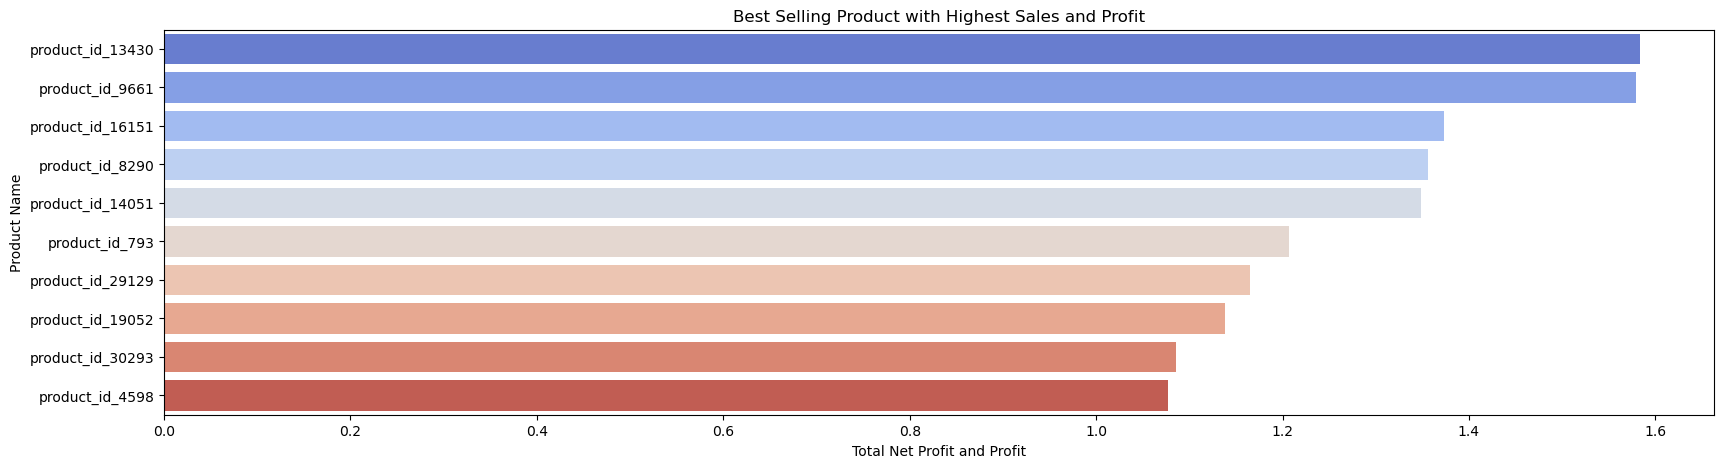

In [833]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(df_buyer_product_sorted[['total_selled','net_profit','product_category_name_english','product_score']].head(10), y='product_id_new', x='product_score',palette="coolwarm")

plt.title("Best Selling Product with Highest Sales and Profit")
plt.xlabel("Total Net Profit and Profit")
plt.ylabel("Product Name")
plt.show()

#### 2.1.c. Bucket Size (Number of Products per Order)

We will analyze how many products buyers purchase in each order to gain insights into buyer preferences. This will help us understand whether customers prefer buying single products or if they tend to buy in bulk.

Based on this analysis, we can provide recommendations on how to optimize product offerings, adjust pricing strategies, or bundle products to improve order sizes and increase sales.

In [834]:
# Grouping by order_id_new, see how much product each order
df_total_product_perorder = df_buyer.query("order_status=='delivered'").groupby('order_id_new')['product_id_new'].count().reset_index().rename(columns={'product_id_new':'total_product'})
df_total_product_perorder

order_id_new  total_product
0         order_id_0              1
1         order_id_1              1
2        order_id_10              2
3       order_id_100              1
4      order_id_1000              1
...              ...            ...
96472  order_id_9995              1
96473  order_id_9996              1
96474  order_id_9997              1
96475  order_id_9998              1
96476  order_id_9999              1

[96477 rows x 2 columns]

In [835]:
# Grouping each total product and how many order
df_basket_size = df_total_product_perorder.groupby('total_product')['order_id_new'].count().reset_index().rename(columns={'order_id_new':'total_order'})
df_basket_size

total_product  total_order
0               1        86843
1               2         7392
2               3         1305
3               4          495
4               5          193
5               6          191
6               7           22
7               8            8
8               9            3
9              10            8
10             11            4
11             12            5
12             13            1
13             14            2
14             15            2
15             20            2
16             21            1

Text(0.5, 1.0, 'Basket Size Trend')

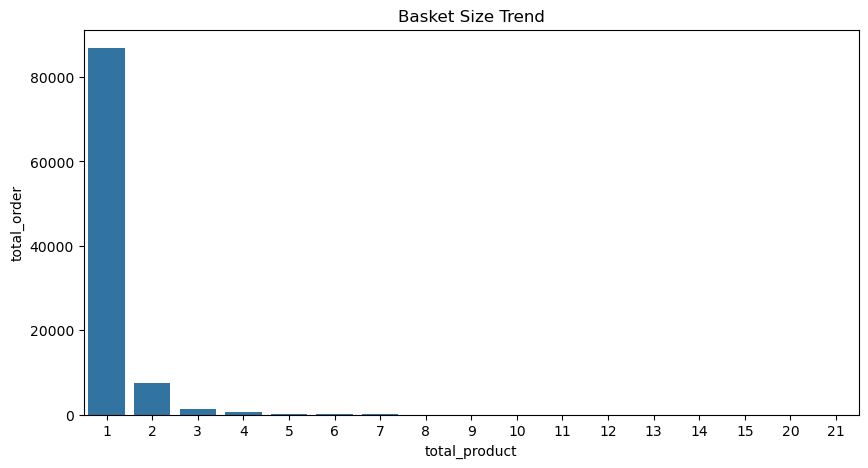

In [836]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df_basket_size,x='total_product',y='total_order')
plt.title('Basket Size Trend')

As observed, the majority of orders have a basket size of just 1 item per order.

**Recommendation:**

To combat this, we can implement **bundle offers** and **cross-selling** strategies by promoting **Frequently Bought Together** products. This can encourage customers to purchase more items per order, increasing the overall sales volume and boosting profitability.

#### 2.1.d. Average Order Value

We will calculate the average order value by dividing the sum of `price` by `order_id`, but we need to filter out outlier values in `price`. With this, we can see the average value per order. 

In [837]:
Q1 = df_business.query("order_status=='delivered'")['price'].quantile(0.25)
Q3 = df_business.query("order_status=='delivered'")['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_business.query("order_status=='delivered'")[(df_business.query("order_status=='delivered'")['price'] >= lower_bound) & (df_business.query("order_status=='delivered'")['price'] <= upper_bound)]

aov_filtered = df_filtered['price'].sum() / df_filtered['order_id_new'].nunique()
print(f'Filtered Average Order Value (AOV): {aov_filtered:.2f}')


Filtered Average Order Value (AOV): 96.33


**Insight:**  

The **Average Order Value** is 96.  
To help increase it, we can create a coupon with a minimum order requirement.  

### 2.2. Customer Loyalty & Spending Analysis

In [838]:
print(f'Total Buyer in dataset : {df_buyer['customer_unique_id_new'].nunique()}')

Total Buyer in dataset : 95417


#### 2.2.a Most Loyal Customers

We will identify the most loyal buyers by analyzing the total number of orders placed by each customer.

In this analysis, we will not consider the interval between purchases but will focus solely on the frequency of orders to determine customer loyalty.

In [839]:
# Grouping by customer unique id to find freq of order
df_most_loyal_costumer = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new')['order_id_new'].nunique().reset_index().sort_values(by='order_id_new',ascending=False).rename(columns={'order_id_new':'frequent'})
df_most_loyal_costumer

customer_unique_id_new  frequent
4435   customer_unique_id_14104        15
44338   customer_unique_id_5105         9
17416  customer_unique_id_26099         7
64738   customer_unique_id_6995         7
7310   customer_unique_id_16760         7
...                         ...       ...
31901  customer_unique_id_39529         1
31900  customer_unique_id_39528         1
31899  customer_unique_id_39527         1
31898  customer_unique_id_39526         1
93356   customer_unique_id_9999         1

[93357 rows x 2 columns]

Text(0.5, 1.0, 'Buyer with Most Loyal')

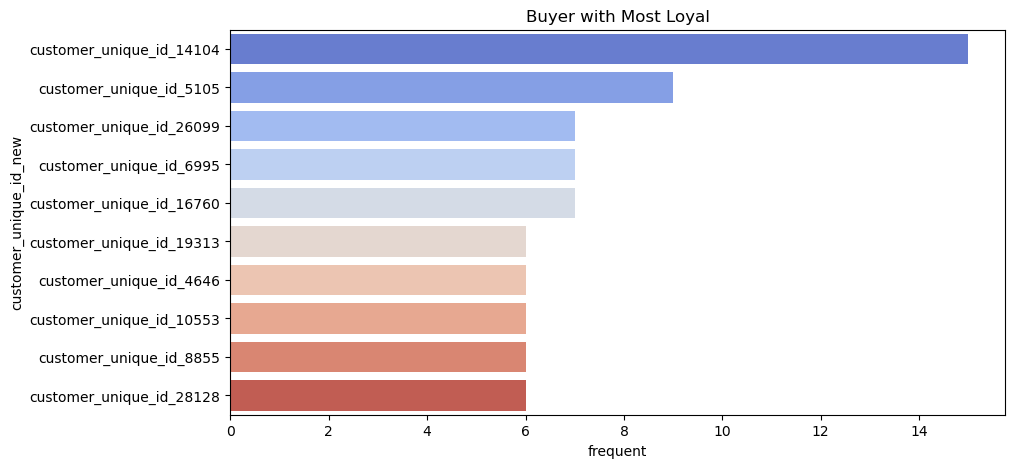

In [840]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_most_loyal_costumer.head(10),x='frequent',y='customer_unique_id_new',palette="coolwarm")
plt.title('Buyer with Most Loyal')

##### 2.2.a.1. Number of Buyers with Repeat Orders

We will calculate how many buyers have placed multiple orders, helping us to understand the level of customer retention and identify repeat customers.

In [841]:
# Creating new column repeat_order with True and False
df_most_loyal_costumer['repeat_order'] = np.where(df_most_loyal_costumer['frequent']==1,False,True)
df_most_loyal_costumer.head()

customer_unique_id_new  frequent  repeat_order
4435   customer_unique_id_14104        15          True
44338   customer_unique_id_5105         9          True
17416  customer_unique_id_26099         7          True
64738   customer_unique_id_6995         7          True
7310   customer_unique_id_16760         7          True

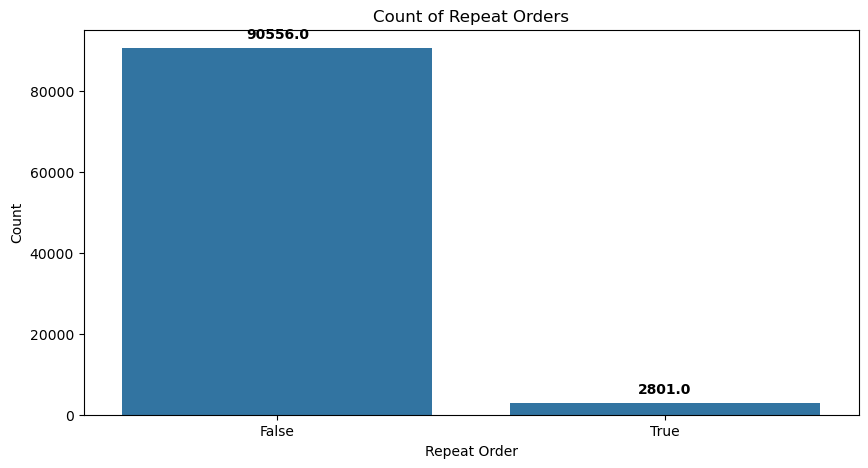

In [842]:
plt.figure(figsize=(10, 5))
sns.countplot(x='repeat_order', data=df_most_loyal_costumer)

plt.title('Count of Repeat Orders')
plt.xlabel('Repeat Order')
plt.ylabel('Count')

# Annotating the plot with the count of repeat orders
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 10), textcoords='offset points')

plt.show()


In [843]:
total_repeat = df_most_loyal_costumer.query("repeat_order==True").shape[0]
percent_repeat_order = (total_repeat/df_most_loyal_costumer.shape[0])*100
print(f'Total Buyer Repeated Order {round(percent_repeat_order)}% with total number {total_repeat}')

Total Buyer Repeated Order 3% with total number 2801


We will assign rankings to the most loyal buyers based on the number of orders they have placed. 

This ranking will help identify the top buyers, which will later be combined with the royal ranking to get a more comprehensive understanding of customer loyalty and their contribution to the business.

In [844]:
# Giving ranking to loyal buyer
df_most_loyal_costumer['rank_loyal'] = range(1, len(df_most_loyal_costumer) + 1)
df_most_loyal_costumer.head(10)

customer_unique_id_new  frequent  repeat_order  rank_loyal
4435   customer_unique_id_14104        15          True           1
44338   customer_unique_id_5105         9          True           2
17416  customer_unique_id_26099         7          True           3
64738   customer_unique_id_6995         7          True           4
7310   customer_unique_id_16760         7          True           5
10070  customer_unique_id_19313         6          True           6
39390   customer_unique_id_4646         6          True           7
604    customer_unique_id_10553         6          True           8
84772   customer_unique_id_8855         6          True           9
19608  customer_unique_id_28128         6          True          10

#### 2.2.b. Most Royal Customers

We will identify the **most royal buyers** by analyzing the **total sum_profit**.

In this analysis, we define a **"Royal Customer"** as a buyer who meets at least one of the following criteria:
1. **Repeat Buyer**: Has made more than **one order**.
2. **High-Value Buyer**: Has generated a total profit of **at least 1,000**.

By segmenting customers this way, we can better understand purchasing behavior and implement strategies to retain high-value customers.

In [845]:
# Group by customer id and sum profit and freq
df_most_royal_costumer = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new').agg({'net_profit':'sum','order_id_new':'nunique'}).reset_index().rename(columns={'net_profit':'sum_profit','order_id_new':'freq'}).sort_values(by='sum_profit',ascending=False)
df_most_royal_costumer.head(10)

customer_unique_id_new  sum_profit  freq
55980   customer_unique_id_6185    2419.200     1
18407  customer_unique_id_27018    1329.840     2
91941  customer_unique_id_95175    1288.800     1
3661   customer_unique_id_13388    1212.300     1
11887  customer_unique_id_20996    1211.220     1
31313   customer_unique_id_3899    1169.820     1
79669  customer_unique_id_83806    1068.228     1
2163   customer_unique_id_12003     844.200     1
32485  customer_unique_id_40065     826.200     1
47446  customer_unique_id_53929     792.000     1

In [846]:
# Group by customer id by sum profit > 1000 or freq > 1
df_most_royal_costumer = df_most_royal_costumer.query("(freq > 1) or (sum_profit >1000)").reset_index(drop=True)

df_most_royal_costumer

customer_unique_id_new  sum_profit  freq
0      customer_unique_id_6185   2419.2000     1
1     customer_unique_id_27018   1329.8400     2
2     customer_unique_id_95175   1288.8000     1
3     customer_unique_id_13388   1212.3000     1
4     customer_unique_id_20996   1211.2200     1
...                        ...         ...   ...
2802  customer_unique_id_23339      3.7422     2
2803   customer_unique_id_2001      3.7260     3
2804   customer_unique_id_6329      3.6360     2
2805  customer_unique_id_24589      3.6000     2
2806  customer_unique_id_24804      2.1564     2

[2807 rows x 3 columns]

In [847]:
# Giving ranking to royal buyer
df_most_royal_costumer['rank_royal'] = range(1, len(df_most_royal_costumer) + 1)
df_most_royal_costumer.head(10)

customer_unique_id_new  sum_profit  freq  rank_royal
0   customer_unique_id_6185    2419.200     1           1
1  customer_unique_id_27018    1329.840     2           2
2  customer_unique_id_95175    1288.800     1           3
3  customer_unique_id_13388    1212.300     1           4
4  customer_unique_id_20996    1211.220     1           5
5   customer_unique_id_3899    1169.820     1           6
6  customer_unique_id_83806    1068.228     1           7
7  customer_unique_id_38761     734.400     4           8
8  customer_unique_id_88723     622.620     2           9
9  customer_unique_id_77809     432.000     2          10

Text(0.5, 1.0, 'Buyer with Most Royal')

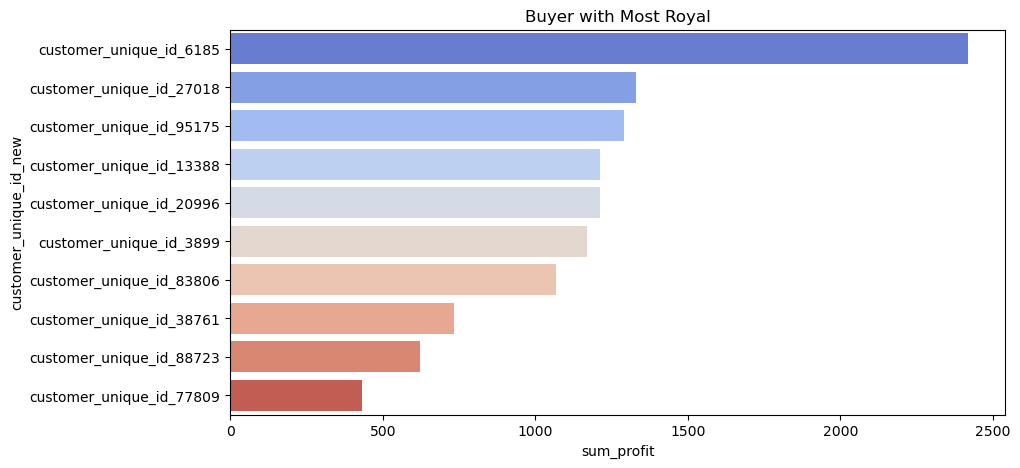

In [848]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_most_royal_costumer.head(10),x='sum_profit',y='customer_unique_id_new',palette="coolwarm")
plt.title('Buyer with Most Royal')

##### 2.2.b.1 Average Spending per User

Since the data is **skewed**, we will use the **median** to determine the central value.  

This will give us a **more accurate representation** of the typical spending behavior of customers, avoiding the influence of extreme outliers.

In [849]:
spending_per_user = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new')['net_profit'].sum().reset_index()
spending_per_user

customer_unique_id_new  net_profit
0          customer_unique_id_0     22.4982
1          customer_unique_id_1     52.0200
2         customer_unique_id_10      4.5540
3       customer_unique_id_1000      5.3280
4      customer_unique_id_10000     45.0000
...                         ...         ...
93352   customer_unique_id_9995     10.7820
93353   customer_unique_id_9996     35.9640
93354   customer_unique_id_9997      8.2620
93355   customer_unique_id_9998     26.9820
93356   customer_unique_id_9999      8.8200

[93357 rows x 2 columns]

Text(0.5, 1.0, 'Distribution of Customer Spending')

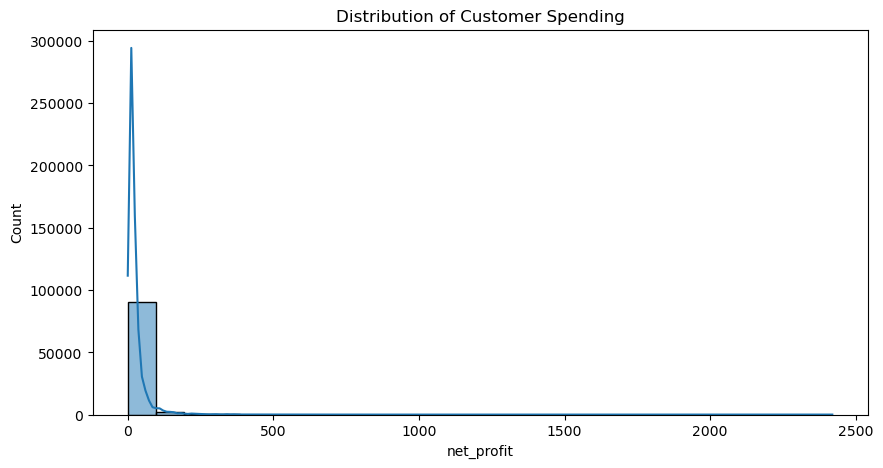

In [850]:
plt.figure(figsize=(10, 5))
sns.histplot(df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new')['net_profit'].sum().reset_index(),x='net_profit',bins=25,kde=True)
plt.title('Distribution of Customer Spending')


In [851]:
average_spending = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new')['price'].sum().reset_index()['price'].mean()
print(f'Median of buyer spending is : {average_spending}')

Median of buyer spending is : 141.62155103527317


In [852]:
average_spending = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new')['price'].sum().reset_index()['price'].median()
print(f'Median of buyer spending is : {average_spending}')

Median of buyer spending is : 89.7


#### 2.2.c Loyal x Royal Customers

We will find a customer that got ranking loyal and royal the best, we can use this data to focus on buyer worth time to invest

we do this by adding ranking of each loyal and royal, by this we find the most customer worth focus on because it got the equal for loyal and royal

In [853]:
# Merge the loyal and royal
df_most_loyal_royal = df_most_loyal_costumer[['customer_unique_id_new','rank_loyal']].merge(df_most_royal_costumer[['customer_unique_id_new','rank_royal','freq']],on='customer_unique_id_new',how='left')
df_most_loyal_royal

customer_unique_id_new  rank_loyal  rank_royal  freq
0      customer_unique_id_14104           1       141.0  15.0
1       customer_unique_id_5105           2        70.0   9.0
2      customer_unique_id_26099           3       110.0   7.0
3       customer_unique_id_6995           4       109.0   7.0
4      customer_unique_id_16760           5       162.0   7.0
...                         ...         ...         ...   ...
93352  customer_unique_id_39529       93353         NaN   NaN
93353  customer_unique_id_39528       93354         NaN   NaN
93354  customer_unique_id_39527       93355         NaN   NaN
93355  customer_unique_id_39526       93356         NaN   NaN
93356   customer_unique_id_9999       93357         NaN   NaN

[93357 rows x 4 columns]

In [854]:
# Adding rank from loyal to royal, the smalles combined rank the best
df_most_loyal_royal['combined_rank'] = df_most_loyal_royal['rank_loyal'] + df_most_loyal_royal['rank_royal']
df_most_loyal_royal.sort_values(by='combined_rank', ascending=True).dropna().head(10)[['customer_unique_id_new','rank_loyal','rank_royal','combined_rank','freq']]

customer_unique_id_new  rank_loyal  rank_royal  combined_rank  freq
14  customer_unique_id_14035          15        26.0           41.0   5.0
27  customer_unique_id_18303          28        21.0           49.0   4.0
30   customer_unique_id_4333          31        24.0           55.0   4.0
46  customer_unique_id_38761          47         8.0           55.0   4.0
1    customer_unique_id_5105           2        70.0           72.0   9.0
16  customer_unique_id_10235          17        72.0           89.0   5.0
75   customer_unique_id_5391          76        15.0           91.0   3.0
36    customer_unique_id_134          37        64.0          101.0   4.0
2   customer_unique_id_26099           3       110.0          113.0   7.0
3    customer_unique_id_6995           4       109.0          113.0   7.0

We can **focus on this list of customers** because they are both **high spenders** and **repeat buyers**.  

**Key Takeaways:**
- These customers **generate high profits** and **order frequently**.
- Investing in **personalized promotions, loyalty rewards, or exclusive offers** could increase retention.
- They are **valuable assets** for long-term business growth.


### 2.3. Geographic Analysis & Buyer Behavior

In [855]:
# Preparing data by grouping by customer unique id
geospatial_buyer = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new')[['geolocation_lat','geolocation_lng','geolocation_city']].first().reset_index()
geospatial_buyer

customer_unique_id_new  geolocation_lat  geolocation_lng  \
0          customer_unique_id_0       -20.498489       -47.396929   
1          customer_unique_id_1       -23.727992       -46.542848   
2         customer_unique_id_10       -16.721976       -43.862914   
3       customer_unique_id_1000       -23.681662       -46.623333   
4      customer_unique_id_10000       -20.892832       -47.585040   
...                         ...              ...              ...   
93352   customer_unique_id_9995       -23.663010       -46.632922   
93353   customer_unique_id_9996        -8.366341       -35.241203   
93354   customer_unique_id_9997       -22.474917       -44.475572   
93355   customer_unique_id_9998       -23.540539       -46.317950   
93356   customer_unique_id_9999       -21.132599       -44.238868   

            geolocation_city  
0                     franca  
1      sao bernardo do campo  
2              montes claros  
3                    diadema  
4                   batatais  
...                      ...  
93352              sao paulo  
93353                 escada  
93354                resende  
93355                 suzano  
93356       sao joao del rei  

[93357 rows x 4 columns]

In [856]:
# Grouping the geolocatin_city to find the median, this will make the process faster
geospatial = pd.read_csv('dataset/00_original_dataset/olist_geolocation_dataset.csv')
geospatial = geospatial[['geolocation_lat','geolocation_lng','geolocation_city']]
geospatial = geospatial.groupby('geolocation_city')[['geolocation_lat','geolocation_lng']].median().reset_index()
geospatial

geolocation_city  geolocation_lat  geolocation_lng
0               * cidade       -25.571748       -49.334374
1     ...arraial do cabo       -22.969370       -42.029834
2         4o. centenario       -24.271860       -53.069433
3          4º centenario       -24.279801       -53.074723
4        abadia de goias       -16.766377       -49.435230
...                  ...              ...              ...
8006               áurea       -27.695009       -52.055076
8007              ângulo       -23.194098       -51.917461
8008       érico cardoso       -13.393047       -42.134282
8009              óbidos        -1.906773       -55.515658
8010                óleo       -22.939570       -49.339142

[8011 rows x 3 columns]

In [857]:
# Merge the customer with geospatial
geospatial_buyer = geospatial_buyer.drop(columns=['geolocation_lat','geolocation_lng'])
geospatial_buyer = geospatial_buyer.merge(geospatial,how='left',on='geolocation_city')
geospatial_buyer = geospatial_buyer.dropna()
geospatial_buyer

customer_unique_id_new       geolocation_city  geolocation_lat  \
0          customer_unique_id_0                 franca       -20.534987   
1          customer_unique_id_1  sao bernardo do campo       -23.708784   
2         customer_unique_id_10          montes claros       -16.728165   
3       customer_unique_id_1000                diadema       -23.688655   
4      customer_unique_id_10000               batatais       -20.891582   
...                         ...                    ...              ...   
93352   customer_unique_id_9995              sao paulo       -23.563625   
93353   customer_unique_id_9996                 escada        -8.363023   
93354   customer_unique_id_9997                resende       -22.469603   
93355   customer_unique_id_9998                 suzano       -23.546468   
93356   customer_unique_id_9999       sao joao del rei       -21.130730   

       geolocation_lng  
0           -47.398970  
1           -46.562922  
2           -43.863742  
3           -46.614570  
4           -47.585070  
...                ...  
93352       -46.649844  
93353       -35.236051  
93354       -44.459398  
93355       -46.310497  
93356       -44.248150  

[93311 rows x 4 columns]

#### 2.3.a. City of Buyer

We will analyze the **number of orders** in each city and calculate the **median profit** per city.  

This will help us identify **high-demand locations** and cities that generate the most **profit per order**.

In [858]:
# Grouping by city to find the highst total order and median
state_of_buyer = df_buyer.query("order_status=='delivered'").groupby('customer_unique_id_new').agg({'geolocation_city':'first','net_profit':'median'}).reset_index()
state_of_buyer = state_of_buyer.groupby('geolocation_city').agg({'geolocation_city':'count','net_profit':'median'}).rename(columns={'geolocation_city':'total_order','net_profit':'median_profit'}).sort_values(by='total_order',ascending=False)
state_of_buyer

total_order  median_profit
geolocation_city                            
sao paulo               12329        12.5820
rio de janeiro           6347        14.4000
belo horizonte           2604        13.8420
são paulo                2182        12.5820
brasilia                 1561        14.4000
...                       ...            ...
ibertioga                   1        29.2500
ibiajara                    1         8.1000
ibiara                      1        50.0400
ibicuitinga                 1         5.2182
óleo                        1        10.7820

[4209 rows x 2 columns]

Text(0.5, 1.0, 'City with Most Total Order')

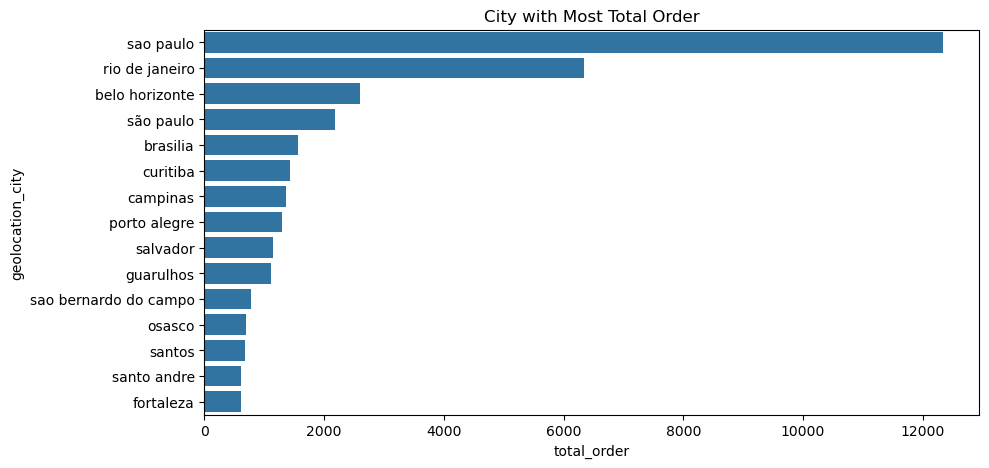

In [859]:
plt.figure(figsize=(10, 5))
sns.barplot(data=state_of_buyer.head(15),y='geolocation_city',x='total_order')
plt.title('City with Most Total Order')

##### 2.3.a.1. High-Profit Cities with Significant Orders

Next, we will identify cities with **total orders above 100** and a **high median profit**.  

This analysis helps us pinpoint the **most profitable cities** that also have a **healthy order volume**, making them prime targets for business expansion and marketing efforts.

In [860]:
state_of_buyer[state_of_buyer['total_order']>=100].sort_values(by='median_profit',ascending=False).head()

total_order  median_profit
geolocation_city                              
teresina                    261        19.6200
porto velho                 100        18.3510
sao joao de meriti          113        18.1800
nova friburgo               135        18.1440
joao pessoa                 186        17.9901

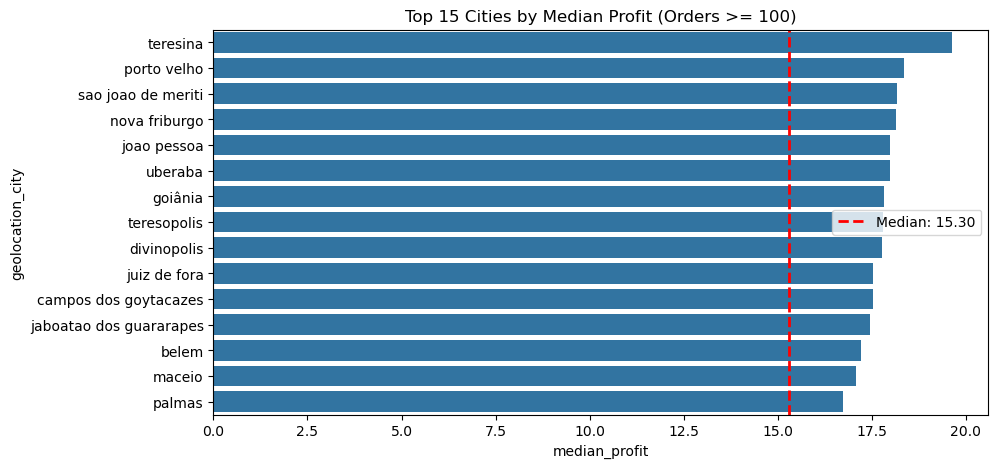

In [861]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=state_of_buyer[state_of_buyer['total_order'] >= 100]
    .sort_values(by='median_profit', ascending=False)
    .head(15),
    y='geolocation_city',
    x='median_profit'
)

# Add a red vertical line for the median of median_profit
overall_median = state_of_buyer['median_profit'].median()
plt.axvline(overall_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {overall_median:.2f}')

plt.legend()
plt.title('Top 15 Cities by Median Profit (Orders >= 100)')
plt.show()


From our analysis, we can see that the cities with the **highest median profit** (with a minimum of **100 orders**) are as follows.  

These cities present a **great opportunity for expansion**, and we can consider focusing on them if the opportunity arises.

### 2.4. Payment Type Analysis

In this section, we will analyze the **preferred payment methods** used by buyers and identify which payment types have a higher likelihood of cancellation.  

#### 2.4.a. Payment Type Descriptions

| **Payment Type** | **Description** |
| --- | --- |
| **Credit Card** | Most common online payment method, allows installment payments. |
| **Boleto** | A Brazilian bank slip payment method, requires manual payment. |
| **Voucher** | A prepaid or discount-based payment method, often used for promotions. |
| **Debit Card** | Directly deducts money from the customer’s bank account. |

This analysis will help us understand **buyer preferences** and potential risks associated with each payment type.

In [862]:
# Grouping by customer to remove duplicate and group by payment
df_payment = df_buyer.groupby('customer_unique_id_new')['payment_type'].value_counts().reset_index().rename(columns={'count':'total'})
df_payment = df_payment['payment_type'].value_counts().reset_index()
df_payment

payment_type  count
0  credit_card  73277
1       boleto  19127
2      voucher   1851
3   debit_card   1505

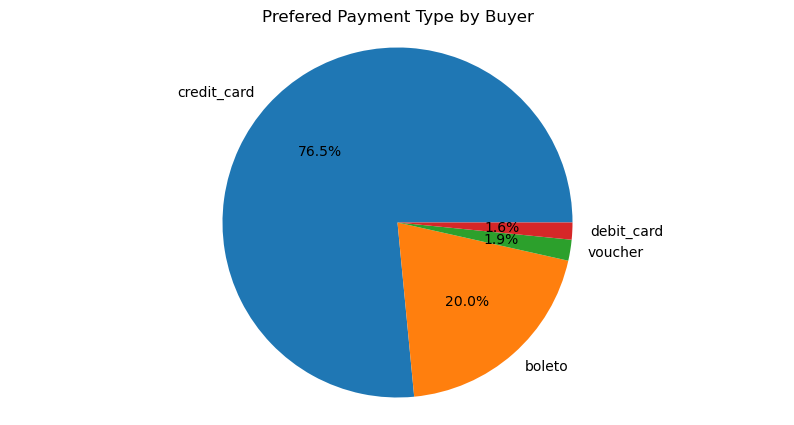

In [863]:
plt.figure(figsize=(10, 5))
plt.pie(df_payment['count'], labels=df_payment['payment_type'], autopct='%1.1f%%')
plt.title("Prefered Payment Type by Buyer")
plt.axis('equal')
plt.show()

Insight

With so many buyer using credit card for payment We can **partner with local credit card companies** to offer **exclusive promotions** for buyers who use their cards.

In [864]:
# We will find canceled order and calculate how much each payment type lead to canceled
payment_with_order_canceled = df_buyer[df_buyer['order_status']=='canceled'].groupby('customer_unique_id_new')['payment_type'].value_counts().reset_index().rename(columns={'count':'total'})
payment_with_order_canceled = payment_with_order_canceled['payment_type'].value_counts().reset_index().rename(columns={'count':'total canceled'})
payment_with_order_canceled


payment_type  total canceled
0  credit_card             368
1       boleto              79
2      voucher               7
3   debit_card               6

In [865]:
# merge and find out how many percent of order canceled by each payment type
percent_canceled = df_payment.merge(payment_with_order_canceled,on='payment_type',how='left')
percent_canceled['percent'] = percent_canceled['total canceled']/percent_canceled['count']*100
percent_canceled

payment_type  count  total canceled   percent
0  credit_card  73277             368  0.502204
1       boleto  19127              79  0.413029
2      voucher   1851               7  0.378174
3   debit_card   1505               6  0.398671

As we can see, the **highest number of cancellations** comes from **credit card payments**. However, we **cannot conclude** that the payment method itself is the **main reason** for cancellations. We need more data to find the reason why buyer or seller cancel the order.

### 2.5. Feedback & Customer Sentiment Analysis

#### 2.5.a. Rating Distribution

We will analyze the distribution of ratings and identify factors that contribute to low ratings.

In [866]:
# Grouping by review score
df_score = df_buyer.query("order_status=='delivered'")['review_score'].value_counts().reset_index()
df_score['percentage_score'] = round(df_score['count']/df_score['count'].sum()*100)
df_score[['review_score','percentage_score','count']].sort_values(by='review_score',ascending=False)

review_score  percentage_score  count
0           5.0              57.0  63210
1           4.0              19.0  21309
3           3.0               8.0   9282
4           2.0               3.0   3728
2           1.0              11.0  12479
5           0.0               0.0    186

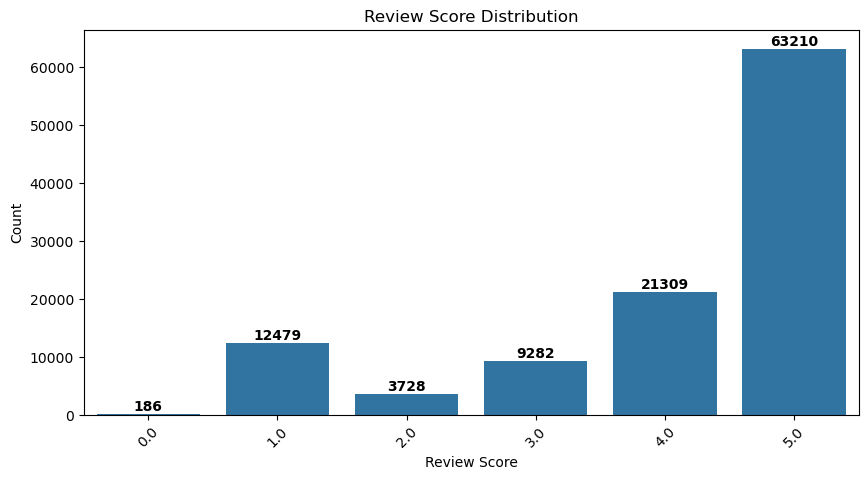

In [867]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(df_score,x='review_score',y='count')
# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer for cleaner display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

As we can see, **11% of buyers gave a rating of 1**, and **3% gave a rating of 2**.  
We will analyze the trends to understand what factors contribute to these low ratings.

#### 2.5.b. Customer Sentiment: Bad Reviews (Below 3 Stars)

Since the review comments are in **Portuguese**, we will use **Google Translate** to convert them into **English** for easier interpretation and analysis.

In [868]:
# Import dataframe for review
df_review = pd.read_csv('dataset/00_original_dataset/olist_order_reviews_dataset.csv')

In [869]:
# # pip install googletrans
# # pip install asyncio
# # -------------------------
# # need internet connection process for around 50 seconds
# # if fail, you can skip this cell and run to the next cell. We will use google

# import nest_asyncio
# import asyncio
# from googletrans import Translator

# nest_asyncio.apply()  # Allows running asyncio inside Jupyter Notebook

# translator = Translator()

# async def translate_text(text):
#     translation = await translator.translate(text, src='pt', dest='en')
#     return translation.text

# async def translate_reviews(df):
#     df["translated_review"] = await asyncio.gather(*[translate_text(text) for text in df["review_comment_message"]])
#     return df

# # Apply translation
# df_review_filtered = df_review[df_review['review_score'] < 3][['review_comment_message']].dropna()
# df_translated = asyncio.run(translate_reviews(df_review_filtered))

# df_translated

In [897]:
# Backup strat for translating comment
# Import translated csv from google translate
df_translated = pd.read_excel('dataset/00_original_dataset/comment.xlsx')
df_translated.head()

review_comment_message
0                                                                                                                I WOULD LIKE TO KNOW WHAT HAPPENED, I ALWAYS RECEIVED AND THIS PURCHASE NOW DISAPPOINTED ME
1                                                                                                                                                                                                   Terrible
2                                                                                                                                                                 I didn't like it! I bought a pig in a poke
3   I always buy online and the delivery is before the agreed deadline, which I believe is the maximum deadline. At Stark the maximum deadline has already expired and I still haven't received the product.
4                                                                                                                                                                             My order still hasn't arrived.

In [871]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [872]:
from string import punctuation
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt_tab')

import nltk
from nltk.corpus import stopwords

def to_lower(text):
    return text.lower()

def remove_contraction(text) :
    for key, value in contractions_dict.items():
            text = text.replace(key,value)
    return text

def remove_number(text):
    return ''.join([char for char in text if not char.isnumeric()])

punctuation

def remove_punctuation(text):
    return ''.join([char for char in text if not char in punctuation])



stopword = stopwords.words('English')

stopword.remove('not')
def remove_stopword(text):
    return ' '.join([char for char in text.split() if not char in stopword]) # if di kanan buat filtering


def remove_white_space(text):
    return ' '.join(text.split())

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    list_hasil = []

    for sentence in nltk.sent_tokenize(text): # memecah paragraf jadi kalimat
        for word in nltk.word_tokenize(sentence): #memecah kalimat jadi kata
            list_hasil.append(lemmatizer.lemmatize(word))

    hasil = ' '.join(list_hasil)
    return hasil

def combine_cleaning(series) :
    df_translated['to_lower'] = series.apply(to_lower)
    df_translated['remove_contraction'] = df_translated['to_lower'].apply(remove_contraction)
    df_translated['remove_number'] = df_translated['remove_contraction'].apply(remove_number)
    df_translated['remove_punctuation'] = df_translated['remove_number'].apply(remove_punctuation)
    df_translated['remove_stopword'] = df_translated['remove_punctuation'].apply(remove_stopword)
    df_translated['remove_white_space'] = df_translated['remove_stopword'].apply(remove_white_space)
    df_translated['lemmatize'] = df_translated['remove_white_space'].apply(lemmatize)
    return df_translated

def word_freq(text):
    df_text = text.str.extractall(r'(\w+)') #mengambil tiap kata dari tiap dokumen
    df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={0:'word','count':'freq'})
    return df_unique

[nltk_data] Downloading package punkt_tab to /Users/glen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [873]:
# Clean all text
df_clean = combine_cleaning(df_translated['review_comment_message'].apply(lambda x : str(x)))
df_text = df_clean['lemmatize']
df_text

0                                                                                          would like know happened always received purchase disappointed
1                                                                                                                                                terrible
2                                                                                                                                not like bought pig poke
3                   always buy online delivery agreed deadline believe maximum deadline stark maximum deadline already expired still not received product
4                                                                                                                                 order still not arrived
                                                                               ...                                                                       
10885    received following email need know get money back buy another produ

In [874]:
# Counting each word
data1 = word_freq(df_text)
data1

word  freq
0                not  8393
1            product  6770
2           received  2994
3                one  1820
4          delivered  1736
...              ...   ...
5206             ant     1
5207        allowing     1
5208            nose     1
5209          wrench     1
5210  graindifferent     1

[5211 rows x 2 columns]

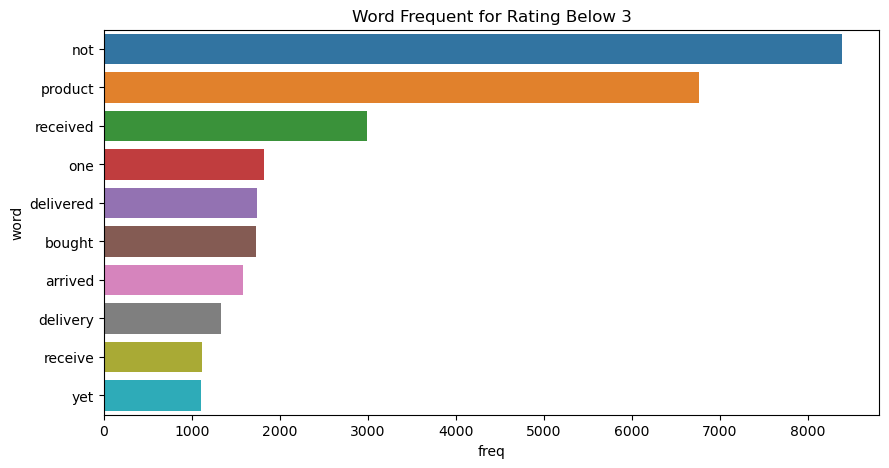

In [875]:
# Data sentiment
plt.figure(figsize=(10, 5))
sns.barplot(data=data1.iloc[:10],x='freq',y='word',hue='word')
plt.title('Word Frequent for Rating Below 3')
plt.show()

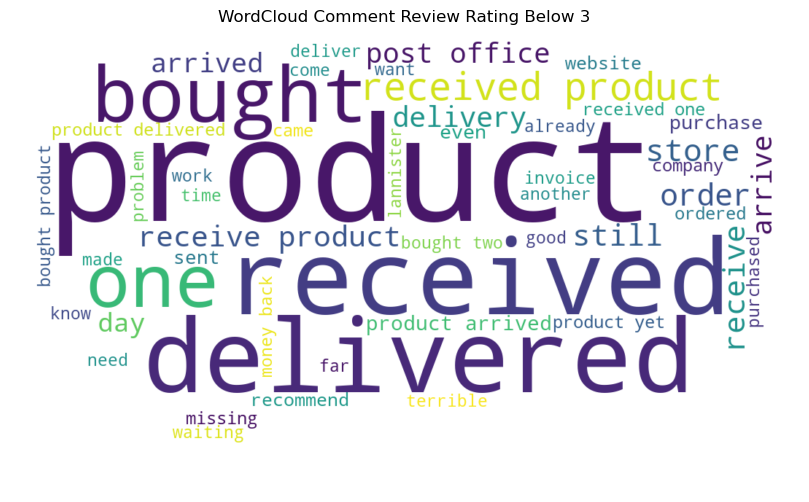

In [876]:
from PIL import Image
from wordcloud import WordCloud

# Load custom mask image
mask = np.array(Image.open("image/speechbuble.jpg"))  # Replace with your image path

# Generate word cloud
text = ' '.join(df_text.str.extractall(r'(\w+)')[0].to_list())
wordcloud = WordCloud(max_words=50, background_color='white', mask=mask)

wordcloud.generate(text)

# Display word cloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Comment Review Rating Below 3")
plt.show()


Insight

It can be seen that the most frequently mentioned topics in the comments are **product** and **delivery**.  

We can assume that the **main reasons** for low ratings are **problems with product quality and shipping delays**.

## **3. Seller Analysis**

### 3.1. Geographic Analysis & Best-Selling Products by Region

In [877]:
print(f'Total Buyer in dataset : {df_seller['seller_id_new'].nunique()}')

Total Buyer in dataset : 3095


#### 3.1.a. Seller City and Possible Expansion  

We will **map each city** based on the number of sellers and identify **potential expansion opportunities**.  
This analysis will help determine **which cities have a strong order with low seller count** and where **growth opportunities exist**.

In [878]:
# Grouping seller_id and merge with geolocation lat and lang
geospatial_seller = df_seller.drop(columns=['geolocation_lat','geolocation_lng'])
geospatial_seller = geospatial_seller.groupby('seller_id_new')['seller_city'].first().reset_index()
geospatial_seller = geospatial_seller.merge(geospatial,how='left',right_on='geolocation_city',left_on='seller_city')
geospatial_seller

seller_id_new     seller_city geolocation_city  geolocation_lat  \
0         seller_0        campinas         campinas       -22.901774   
1         seller_1      mogi guacu       mogi guacu       -22.356766   
2        seller_10        anapolis         anapolis       -16.328052   
3       seller_100  rio de janeiro   rio de janeiro       -22.914532   
4      seller_1000       sao paulo        sao paulo       -23.563625   
...            ...             ...              ...              ...   
3090    seller_995       sao paulo        sao paulo       -23.563625   
3091    seller_996  belo horizonte   belo horizonte       -19.919393   
3092    seller_997  ribeirao preto   ribeirao preto       -21.184171   
3093    seller_998        campinas         campinas       -22.901774   
3094    seller_999           aruja            aruja       -23.400293   

      geolocation_lng  
0          -47.062578  
1          -46.942091  
2          -48.948615  
3          -43.272798  
4          -46.649844  
...               ...  
3090       -46.649844  
3091       -43.952598  
3092       -47.804397  
3093       -47.062578  
3094       -46.321795  

[3095 rows x 5 columns]

In [879]:
# Counting how many
geospatial_seller_per_city = geospatial_seller.groupby('seller_city')[['seller_id_new']].nunique().reset_index().rename(columns={'seller_id_new':'total_seller'}).sort_values(by='total_seller',ascending=False)
geospatial_seller_per_city

seller_city  total_seller
517       sao paulo           694
159        curitiba           127
450  rio de janeiro            96
64   belo horizonte            68
442  ribeirao preto            52
..              ...           ...
264           ivoti             1
262       itirapina             1
260   itau de minas             1
257          itapui             1
610           xaxim             1

[611 rows x 2 columns]

Text(0.5, 0, 'Row of Data')

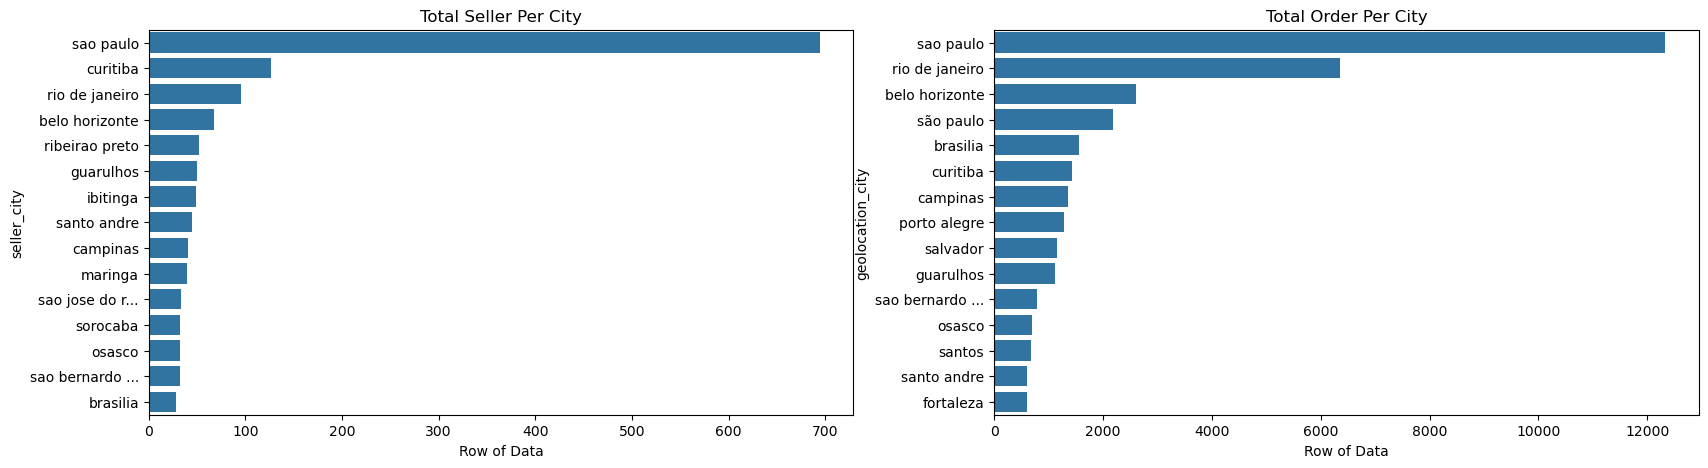

In [880]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 1]})  # Adjust width ratio

# Function to truncate long city names
truncate = lambda x: x[:13] + "..." if len(x) > 15 else x

sns.barplot(data=geospatial_seller_per_city.head(15),y=geospatial_seller_per_city.head(15)['seller_city'].apply(truncate),x='total_seller',ax=ax[0])
ax[0].set_title('Total Seller Per City')
ax[0].set_xlabel('Row of Data')

sns.barplot(data=state_of_buyer.reset_index().head(15),y=state_of_buyer.reset_index().head(15)['geolocation_city'].apply(truncate),x='total_order',ax=ax[1])
ax[1].set_title('Total Order Per City')
ax[1].set_xlabel('Row of Data')



**Finding the Best Cities for Expansion**  

To identify cities with the **best expansion opportunities**, we will filter cities based on the following criteria:  

1. **Total Orders**: Cities with a **total order count above the median** of all cities.  
2. **Total Sellers**: Cities with **fewer sellers than the median** of all cities.  

After filtering, we will **sort by the highest orders per seller**, indicating **high demand but low seller presence**.  
This will help us find **under-served markets** with strong potential for expansion.


In [881]:
# Grouping buyer by the city
city_opportunity = state_of_buyer.merge(geospatial_seller_per_city, left_on='geolocation_city',right_on='seller_city', how='left')

# Calculate ratio of orders to sellers (higher means high demand, low supply)
city_opportunity['order_per_seller'] = city_opportunity['total_order'] / city_opportunity['total_seller']

# Filter cities where order count is high but seller count is low
expansion_cities = city_opportunity[(city_opportunity['total_order'] > city_opportunity['total_order'].median()) & 
                                    (city_opportunity['total_seller'] < city_opportunity['total_seller'].median())]

# Sort by highest order per seller
expansion_cities = expansion_cities.sort_values(by='order_per_seller', ascending=False)

# Show top cities to expand into
expansion_cities[['seller_city', 'total_order', 'total_seller', 'order_per_seller']].head(10)

seller_city  total_order  total_seller  order_per_seller
37                sao luis          291           1.0             291.0
44                teresina          261           1.0             261.0
51   campos dos goytacazes          240           1.0             240.0
63                 aracaju          208           1.0             208.0
79        feira de santana          173           1.0             173.0
94             sao vicente          141           1.0             141.0
98                  manaus          132           1.0             132.0
99    governador valadares          132           1.0             132.0
108           pouso alegre          121           1.0             121.0
110             rio grande          118           1.0             118.0

**Identifying High-Potential Cities for Expansion**  

By dividing **total orders** by **total sellers**, we can pinpoint cities where **demand is high, but seller presence is low**.  

To determine potential expansion areas, we apply these conditions:  
- **Total orders are higher than the median** across all cities.  
- **Total sellers are lower than the median**, indicating an underserved market.  

**Why This Matters?**  
Focusing on these cities allows us to **increase seller availability**, which can lead to:  
- **Faster delivery times**, as sellers are closer to buyers.  
- **Better customer satisfaction** due to quicker shipments.  
- **Higher market penetration** in areas with high demand but low supply.  


#### 3.1.b. Top-Selling Product Categories in Each Region

We will analyze which **product categories** dominate sales in different cities. This helps us understand:  

- **Regional demand trends** – identifying which products perform best in specific locations.  
- **Potential seller optimizations** – ensuring high-demand products are readily available by sellers.  

Next, we will **combine this analysis with potential expansion cities**, helping us create a **more accurate plan** for growth. By identifying cities with **high order volume but low seller presence**, we can strategically **recruit more sellers** to meet demand efficiently.

In [882]:
# Grouping each seller city to know what the most ordered and total product selled
most_category_ordered_by_city = df_seller.groupby('seller_city')['product_category_name_english'].agg(lambda x: x.mode().iloc[0]).reset_index()
most_category_ordered_by_city['total_product_selled'] = df_seller.groupby('seller_city')['product_category_name_english'].apply(lambda x: (x == x.mode().iloc[0]).sum()).values

most_category_ordered_by_city.rename(columns={'product_category_name_english': 'most_ordered_category'}, inplace=True)
most_category_ordered_by_city

seller_city  most_ordered_category  total_product_selled
0           04482255          health_beauty                     1
1    abadia de goias          health_beauty                     1
2     afonso claudio  computers_accessories                     3
3    aguas claras df         sports_leisure                     1
4           alambari             housewares                     5
..               ...                    ...                   ...
606    volta redonda             cool_stuff                   127
607       votorantim         bed_bath_table                   184
608      votuporanga         sports_leisure                    94
609          xanxere                   auto                     7
610            xaxim             cool_stuff                     1

[611 rows x 3 columns]

In [883]:
# Merge with expansion cities to know further what we can expand first in thos city
most_category_ordered_by_city = expansion_cities.merge(most_category_ordered_by_city, 
                        on='seller_city',
                        how='left')
most_category_ordered_by_city[['seller_city','total_seller','total_order','most_ordered_category','total_product_selled']]

seller_city  total_seller  total_order  most_ordered_category  \
0                 sao luis           1.0          291          health_beauty   
1                 teresina           1.0          261                   auto   
2    campos dos goytacazes           1.0          240         sports_leisure   
3                  aracaju           1.0          208  computers_accessories   
4         feira de santana           1.0          173          watches_gifts   
..                     ...           ...          ...                    ...   
222             clementina           1.0            4          health_beauty   
223              terra boa           1.0            4        furniture_decor   
224          campo do meio           1.0            4                   auto   
225    monte alegre do sul           1.0            4             food_drink   
226                jussara           1.0            4         consoles_games   

     total_product_selled  
0                     405  
1                      12  
2                       6  
3                       4  
4                       3  
..                    ...  
222                     4  
223                     7  
224                    17  
225                     4  
226                    54  

[227 rows x 5 columns]

Insight 

In this table, we can see that to **focus on expansion**, we should prioritize the **most ordered category** in each city.  

For example, in **Sao Luís**, the **health & beauty** category has **291 orders** but only **one seller**. This presents a strong opportunity to **recruit new sellers** in this category to meet demand efficiently.

### 3.2. Service Quality & Delivery Performance Analysis

#### 3.2.a. Buyer Ratings per Seller

We will analyze the **average ratings given by buyers to sellers**. This helps us:  

- Identify **top-performing sellers** with consistently high ratings.  
- Detect **underperforming sellers** who may require support or intervention.

We will **remove sellers with only one order**, as their ratings do not accurately represent overall performance trends.  

By filtering out these sellers, we can:  

- **Identify consistent seller performance** across multiple transactions.  
- **Compare ratings more accurately** to find trends in service quality.  
- **Determine the median rating** to evaluate overall seller satisfaction.

In [884]:
# Grouping by seller that already delivered the order and filtering that only got 1 order and got median
seller_order_count = df_seller[df_seller['order_status'] == 'delivered'].groupby('seller_id_new')['order_id_new'].count()
valid_sellers = seller_order_count[seller_order_count > 1].index  

median_review_scores = df_seller[
    (df_seller['order_status'] == 'delivered') & (df_seller['seller_id_new'].isin(valid_sellers))
].groupby('seller_id_new')['review_score'].median().reset_index().rename(columns={'review_score':'median_score'})

median_review_scores

seller_id_new  median_score
0         seller_0           3.0
1         seller_1           5.0
2       seller_100           4.5
3      seller_1002           5.0
4      seller_1003           3.5
...            ...           ...
2477    seller_995           5.0
2478    seller_996           5.0
2479    seller_997           5.0
2480    seller_998           5.0
2481    seller_999           5.0

[2482 rows x 2 columns]

In [885]:
# calculating the mean score

avg_review_scores = df_seller[
    (df_seller['order_status'] == 'delivered') & (df_seller['seller_id_new'].isin(valid_sellers))
].groupby('seller_id_new')['review_score'].mean().round(2).reset_index().rename(columns={'review_score':'mean_score'})
avg_review_scores

seller_id_new  mean_score
0         seller_0        3.00
1         seller_1        4.65
2       seller_100        4.50
3      seller_1002        4.33
4      seller_1003        3.50
...            ...         ...
2477    seller_995        4.60
2478    seller_996        4.61
2479    seller_997        5.00
2480    seller_998        4.40
2481    seller_999        4.18

[2482 rows x 2 columns]

In [886]:
# combining median and mean in one dataframe
review_score_compiled = median_review_scores.merge(avg_review_scores,on='seller_id_new',how='left')
review_score_compiled

seller_id_new  median_score  mean_score
0         seller_0           3.0        3.00
1         seller_1           5.0        4.65
2       seller_100           4.5        4.50
3      seller_1002           5.0        4.33
4      seller_1003           3.5        3.50
...            ...           ...         ...
2477    seller_995           5.0        4.60
2478    seller_996           5.0        4.61
2479    seller_997           5.0        5.00
2480    seller_998           5.0        4.40
2481    seller_999           5.0        4.18

[2482 rows x 3 columns]

In [887]:
# Finding out each seller sell what category
seller_category = df_seller.groupby('seller_id_new')['product_category_name_english'].unique().reset_index()
seller_category

seller_id_new  \
0         seller_0   
1         seller_1   
2        seller_10   
3       seller_100   
4      seller_1000   
...            ...   
3090    seller_995   
3091    seller_996   
3092    seller_997   
3093    seller_998   
3094    seller_999   

                                                                               product_category_name_english  
0                                                                                           [sports_leisure]  
1                                                [luggage_accessories, stationery, fashion_bags_accessories]  
2                                                                                           [sports_leisure]  
3                                                                                                     [toys]  
4                                                                                        [home_appliances_2]  
...                                                                                                      ...  
3090                                                                                        [sports_leisure]  
3091                                                                                         [health_beauty]  
3092                                                    [construction_tools_construction, home_appliances_2]  
3093                                                                              [perfumery, health_beauty]  
3094  [housewares, consoles_games, cool_stuff, pet_shop, stationery, furniture_decor, computers_accessories]  

[3095 rows x 2 columns]

In [888]:
# Filtering by seller that got mean score bellow 3 and sort by median
review_score_compiled[review_score_compiled['mean_score']<3].sort_values(by='median_score').head(10).merge(seller_category,on='seller_id_new',how='left')

seller_id_new  median_score  mean_score  \
0   seller_1237           0.5        0.50   
1   seller_2270           1.0        1.67   
2   seller_2422           1.0        1.00   
3     seller_24           1.0        1.75   
4   seller_2375           1.0        2.33   
5   seller_2366           1.0        2.33   
6   seller_2361           1.0        2.00   
7   seller_2566           1.0        2.00   
8   seller_2318           1.0        1.00   
9   seller_2293           1.0        2.33   

               product_category_name_english  
0                      [musical_instruments]  
1                            [health_beauty]  
2  [kitchen_dining_laundry_garden_furniture]  
3                            [health_beauty]  
4                            [health_beauty]  
5                                [telephony]  
6          [construction_tools_construction]  
7                          [furniture_decor]  
8                             [garden_tools]  
9                  [bed_bath_table, Unknown]

We can see a **list of sellers with low review scores**.

**Insight:**
- Further research is needed to understand **why** these sellers receive low ratings.
- Possible causes include **product quality, shipping delays, or customer service issues**.
- We can **provide guidance** to improve their performance or **reevaluate** their status on the platform.

#### 3.2.b. Seller Shipping Speed to Carrier & Late Shipment Percentage

We will identify **sellers with the slowest shipping times** to the carrier and analyze their **late shipment percentage**.  

This helps in:  
- Understanding which sellers may need **improvement in fulfillment speed**.  
- Reducing late deliveries to improve **customer satisfaction**.

Notes : late_days_to_carrier_mean negative means early delivery

In [889]:
# Grouping by seller that already delivered, creating percent late by divide is how many late / total order by the same seller
# Filtering seller that got more than 0 late deliver

seller_to_carrier_time = df_seller[df_seller['order_status']=='delivered'].groupby('seller_id_new').agg({'is_late_to_carrier':'sum','late_days_to_carrier':'mean','order_id_new':'nunique'}).rename(columns={'order_id_new':'total_order','late_days_to_carrier':'late_days_to_carrier_mean'})
seller_to_carrier_time['percent_late'] = seller_to_carrier_time['is_late_to_carrier']/seller_to_carrier_time['total_order']*100
seller_to_carrier_time = seller_to_carrier_time[seller_to_carrier_time['is_late_to_carrier']>0].sort_values(by=['is_late_to_carrier','percent_late'],ascending=[False,False]).head(10)
seller_to_carrier_time[['late_days_to_carrier_mean','percent_late']].sort_values(by='percent_late',ascending=False)

late_days_to_carrier_mean  percent_late
seller_id_new                                         
seller_1903                     1.896667     56.504065
seller_1182                    -0.667897     37.718397
seller_1930                    -0.980100     27.763496
seller_2267                    -1.158019     27.631579
seller_2001                    -1.281250     24.849699
seller_2720                    -2.204930     19.560440
seller_1265                    -1.896774     18.287938
seller_2345                    -2.883289      6.860902
seller_474                     -2.273624      5.289492
seller_2463                    -2.991791      4.006772

We can **deep dive** into this list and prioritize sellers with **high late shipment percentages**.  

We use **mean** to capture extreme cases (e.g., very late shipments with a rating of 1).  

From this analysis, we can see that **seller_1903** has the **highest late shipment percentage**, and their **average shipping time is also delayed**. Although some sellers have a slightly better mean shipping time, their **percentage of late shipments is still concerning**.

### 3.3. Seller Issues & Risk Analysis

#### 3.3.a. Sellers with the Highest Cancellation Rates

We will analyze **order cancellation rates per seller**, identifying sellers with a high number of canceled orders.  

This will help us to **provide support or interventions to improve order completion rates.**  

**How?**  
We will calculate the **cancellation ratio** by dividing the number of canceled orders by the total delivered orders.  
This ensures a **fair comparison** by considering the seller's overall order volume.  


In [890]:
# Grouping and calculate seller_id that got canceled
seller_with_canceled = df_seller[df_seller['order_status']=='canceled'].groupby('seller_id_new')['order_id_new'].nunique().reset_index().rename(columns={'order_id_new':'total_canceled'})
seller_with_canceled.sort_values(by='total_canceled',ascending=False)

seller_id_new  total_canceled
46    seller_1413               9
303    seller_797               7
97    seller_1893               6
285     seller_67               5
178   seller_2508               5
..            ...             ...
127   seller_2107               1
130   seller_2174               1
132   seller_2207               1
133   seller_2210               1
327    seller_990               1

[328 rows x 2 columns]

In [891]:
# Grouping and calculate seller_id that deliver the order
seller_with_delivered = df_seller[df_seller['order_status']=='delivered'].groupby('seller_id_new')['order_id_new'].nunique().reset_index().rename(columns={'order_id_new':'total_delivered'})
seller_with_delivered

seller_id_new  total_delivered
0         seller_0                3
1         seller_1               39
2        seller_10                1
3       seller_100                2
4      seller_1000                1
...            ...              ...
2965    seller_995               63
2966    seller_996               17
2967    seller_997                3
2968    seller_998              293
2969    seller_999               16

[2970 rows x 2 columns]

In [892]:
# merge total delivered and canceled, divide those 2 to know percentage of canceled order

seller_data = seller_with_delivered.merge(seller_with_canceled, how='left', on='seller_id_new')
seller_data = seller_data.fillna(0)  # Mengganti NaN dengan 0
seller_data['cancel_percentage'] = (seller_data['total_canceled'] / (seller_data['total_delivered']+seller_data['total_canceled'])) * 100
seller_data.sort_values(by='cancel_percentage',ascending=False).head(10)

seller_id_new  total_delivered  total_canceled  cancel_percentage
2041   seller_2919                1             2.0          66.666667
2476    seller_535                1             1.0          50.000000
921    seller_1858                1             1.0          50.000000
2084   seller_2959                1             1.0          50.000000
1348   seller_2259                1             1.0          50.000000
2588    seller_638                1             1.0          50.000000
2524     seller_58                1             1.0          50.000000
641    seller_1594                1             1.0          50.000000
700     seller_165                1             1.0          50.000000
2308     seller_38                2             2.0          50.000000

In this list, we can see the **percentage of canceled orders** from each seller.  
We can conduct a **deeper analysis** to understand the root causes of cancellations—whether they stem from **seller unavailability** or **buyer-related factors**.  

However, **we need more data** to confirm the reasons behind these cancellations.  

**Note:**  
- The data may not be entirely accurate, as **cancellations are relatively low** overall.  
- Many cancellations occur from sellers with a **small number of total orders**, which may skew the percentage.  

### 3.4. Financial & Profitability Analysis 

**Sellers with the Highest Net Profit per Order**  

We will identify sellers with the **highest net profit per order**, allowing us to:  
- Recognize **high-performing sellers** with efficient pricing and cost management.  
- Focus on **seller retention and support** for those driving profitability.

In [893]:
# Grouping seller with most revenue
seller_with_top_revenue = df_seller.query("order_status=='delivered'").groupby('seller_id_new')['net_profit'].sum().sort_values(ascending=False).reset_index()
seller_with_top_revenue

seller_id_new  net_profit
0      seller_2617  40857.8274
1       seller_901  39229.2792
2      seller_2463  35438.7816
3       seller_557  34365.0852
4      seller_1182  33582.6090
...            ...         ...
2965   seller_1466      1.5282
2966   seller_2426      1.4850
2967   seller_2414      1.3680
2968   seller_2098      1.2420
2969   seller_2333      1.1700

[2970 rows x 2 columns]

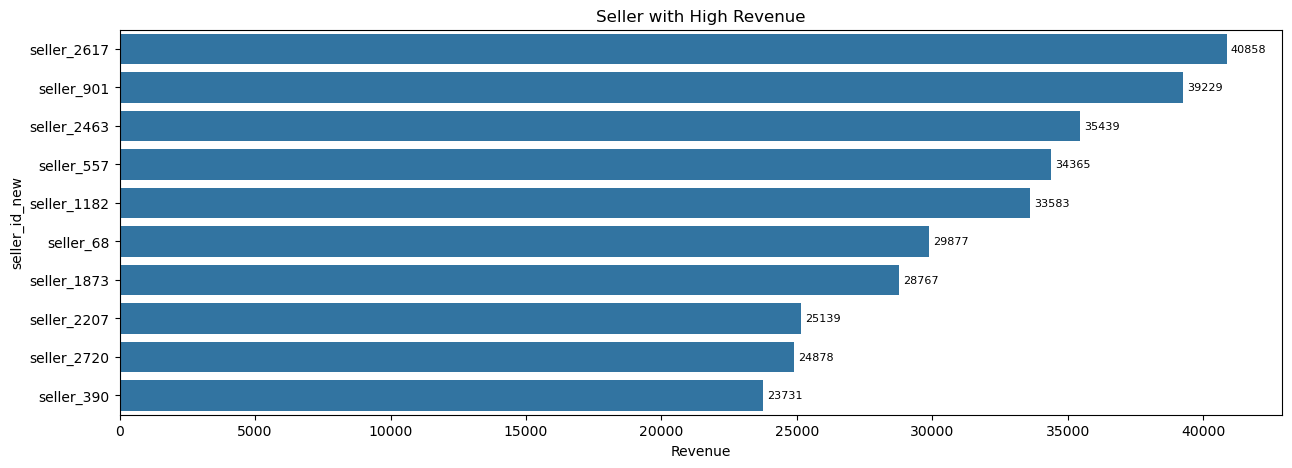

In [894]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=seller_with_top_revenue.head(10), x='net_profit', y='seller_id_new')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=8, color='black')

plt.title('Seller with High Revenue')
plt.xlabel('Revenue')
plt.show()

Based on **total profit**, we can see the top-performing sellers. However, to get a clearer picture of **profitability**, we need to analyze **net profit per order**.  

Net Profit per Order = Total Net Profit / Total Orders


In [895]:
# Calculate net_per_order and sort by net per order
seller_per_order_profit = df_seller[df_seller['order_status']=='delivered'].groupby('seller_id_new').agg({'net_profit':'sum','order_id_new':'nunique','product_category_name_english':'unique'}).reset_index().rename(columns={'order_id_new':'total_order'})
seller_per_order_profit['net_per_order'] = seller_per_order_profit['net_profit']/seller_per_order_profit['total_order']
print("Seller with High net_per_order")
seller_per_order_profit.sort_values(by='net_per_order',ascending=False).head(10)[['seller_id_new','net_per_order','net_profit','total_order','product_category_name_english']]

Seller with High net_per_order


seller_id_new  net_per_order  net_profit  total_order  \
653    seller_1604      1212.3000   1212.3000            1   
2038   seller_2916      1211.2200   1211.2200            1   
2460    seller_520      1169.8200   1169.8200            1   
942    seller_1879      1083.3750   4333.5000            4   
2589    seller_639       638.8200    638.8200            1   
229    seller_1210       604.8000   1209.6000            2   
2034   seller_2912       563.9982   1691.9946            3   
507    seller_1470       539.9802   2699.9010            5   
2821    seller_855       531.1800    531.1800            1   
1301   seller_2213       503.8200   1007.6400            2   

     product_category_name_english  
653                   [housewares]  
2038                   [computers]  
2460                         [art]  
942   [fixed_telephony, telephony]  
2589                   [computers]  
229                      [Unknown]  
2034                   [computers]  
507        [computers_accessories]  
2821       [computers_accessories]  
1301               [health_beauty]

In [896]:
# Filtering seller with order more than 1
print("Seller with High net_per_order and got order more than 2")
seller_per_order_profit.query("total_order>2").sort_values(by='net_per_order',ascending=False).head(10)[['seller_id_new','net_per_order','net_profit','total_order','product_category_name_english']]

Seller with High net_per_order and got order more than 2


seller_id_new  net_per_order  net_profit  total_order  \
942    seller_1879      1083.3750   4333.5000            4   
2034   seller_2912       563.9982   1691.9946            3   
507    seller_1470       539.9802   2699.9010            5   
1489   seller_2394       465.3000   2326.5000            5   
1588   seller_2490       437.8200   1313.4600            3   
1952   seller_2836       420.8544   1262.5632            3   
2729    seller_769       364.5900   6562.6200           18   
1042   seller_1973       347.5200   4170.2400           12   
1974   seller_2856       337.6200   2025.7200            6   
2068   seller_2944       303.7734   9113.2020           30   

     product_category_name_english  
942   [fixed_telephony, telephony]  
2034                   [computers]  
507        [computers_accessories]  
1489                [garden_tools]  
1588                  [cool_stuff]  
1952                  [housewares]  
2729            [small_appliances]  
1042                        [auto]  
1974                     [Unknown]  
2068  [watches_gifts, electronics]

**Insight: Two Approaches to Seller Profitability**  

We can take two strategic approaches to optimize profitability:  

1. **Sustainable Profitability Approach**  
   - Focus on sellers with **high Net Profit per Order** and **more than 2 total orders**.  
   - Ensures **consistent profitability** over time rather than one-time sales.  
   - Helps in **long-term planning** by supporting sellers with **proven performance**.  

2. **High One-Time Profit Approach**  
   - Identify sellers with **high profit per order** but **low total orders**.  
   - Investigate whether these products are **niche items** with potential repeat demand.  
   - Develop strategies to **increase repeat purchases**, such as targeted marketing or exclusive deals.  

By analyzing both segments, we can **balance long-term revenue stability with high-margin opportunities**.

### 3.5. Top Sellers to Retain 

To help the team focus on **seller retention**, we will develop a model that **automates** the process of identifying key sellers at risk of churn.  

**Objective:**  
- Identify **high-value sellers** that contribute significantly to revenue and profit.  
- Detect **early signs of inactivity** and **potential churn**.  
- Recommend **promotional strategies** to retain valuable sellers.

# **Conclusion for Analysis**

## **1. Olist’s Business Performance Analysis**  

- **Revenue Growth:** From 2017 to early 2018, Olist’s revenue increased by **21%**, despite the year not being complete.  
- **Black Friday Effect:** Sales spiked significantly in **November 2017**, likely due to **Black Friday promotions**.  
- **Seller & Buyer Growth:**  
  - **Sellers** tend to join more at the end and start of the year.  
  - **Buyers** also peak around **November** and at the **beginning of the year**.  
- **Product Variety & Profitability:**  
  - Increasing the variety of products leads to higher profits.  
  - **Pareto Analysis:** By focusing on just **16 key categories**, we can cover **80% of net profit**.
  
   These categories include:  

    | health_beauty | 'watches_gifts' | 'bed_bath_table' | 'sports_leisure' | 'computers_accessories' | 
    | --- | --- | --- | --- | --- |
    |'furniture_decor' | 'housewares' | 'cool_stuff' | 'auto' | 'toys' | 
    | 'garden_tools' | 'baby' | 'perfumery' | 'telephony' | 'office_furniture' | 
    | 'stationery' | 'computers'`.  

**Black Friday Strategy:**  

We can prioritize different product categories based on our business goals. Whether we aim to maximize overall revenue, focus on high net profit per order, or explore hidden opportunities, the table below provides clear guidance:  

| **Focus on High-Profit Categories** | **Highest Net Profit per Order** | **Hidden Opportunities (Low Orders, High Profit)** |
|---|---|---|
| bed_bath_table                       | computers                        | computers                                      |
| furniture_decor                      | agro_industry_and_commerce       | agro_industry_and_commerce                     |
| sports_leisure                        | musical_instruments              | musical_instruments                            |
| health_beauty                         | home_appliances_2                | home_appliances_2                              |
| garden_tools                          | industry_commerce_and_business   | industry_commerce_and_business                 |
| computers_accessories                 | furniture_bedroom                | small_appliances                               |
| toys                                  | party_supplies                   | construction_tools_safety                      |
| watches_gifts                         | small_appliances                 | construction_tools_lights                      |
| housewares                            | cine_photo                       | air_conditioning                               |
| telephony                             | construction_tools_safety        | watches_gifts                                  |


- **Order Cancellations:** Olist’s **cancellation rate is below 1%**, which is considered acceptable.  


---

## **2. Buyer Preferences in Shopping on Olist**  

- **Basket Size & Average Order Size:**  
  - Most buyers purchase **only 1 item per order**.  
  - **Solution:** Implement **bundling & cross-selling** strategies to encourage multiple purchases.
  - Average order **value 96 BR.**
  - **Solution:** Create a coupon with a minimum order requirement
   **Loyal & High-Spending Customers:**  
  - By combining **loyalty (repeat purchases)** and **profitability (high spenders)**, we can target high-value customers for **personalized promotions and loyalty rewards**.  
- **Average Buyer Spending:**  
  - The **median spending per buyer** is **around 90**.  
- **Best Cities for Expansion:**  
  - Cities with **high median profit** should be prioritized for expansion.  
- **Payment Preferences:**  
  - **Credit cards** are the most preferred payment method.  
  - **Opportunity:** Partnering with credit card companies for promotional discounts.  
- **Customer Sentiment & Ratings:**  
  - **13% of reviews** gave a rating of **1 star**, and **3% gave a 2-star rating**.  
  - The main complaints were **product quality issues** and **delivery problems**.  

---

## **3. Seller Retention & Churn Prevention Strategy**  

- **Best Cities for Expansion:**  
  - **Filtering cities** where **total orders are above median** but **total sellers are below median** helps identify areas with **high demand but few sellers**.  
  - **Benefit:** Faster deliveries & improved customer satisfaction.  
- **Product Category Optimization for Expansion:**  
  - By identifying the **most ordered product categories** in potential expansion areas, we can **attract new sellers** to fulfill demand.  
- **Seller Performance Evaluation:**  
  - By analyzing **buyer ratings**, we can identify **underperforming sellers** for evaluation and guidance.  
  - Sellers with **high late deliveries & cancellations** should be prioritized for **further investigation**.  
- **Seller Profitability Analysis:**  
  - **Strategy 1:** Focus on sellers with **high net profit per order** and at least **2+ orders**, ensuring long-term profitability.  
  - **Strategy 2:** Focus on sellers with **one-time high-profit orders**, analyzing if their product category is **niche or repeatable**.  
  - **Next Step:** Decide on the **long-term seller retention strategy** based on these insights.  

---


# **Recommendations**  

1. **Prepare for Black Friday (November 2018)**  
   - Focus on high-performing product categories listed in the previous analysis to maximize sales potential.  

2. **Increase Bucket Size**  
   - Encourage larger purchases by offering **bundled deals** or **discounted add-ons**.  

3. **Expand Seller Network in High-Demand Areas**  
   - Identify regions with **high order volume but few sellers** and recruit new sellers to improve delivery speed and customer satisfaction.  

4. **Collaborate with Credit Card Companies**  
   - Partner with banks to offer **exclusive promotions** for credit card users, incentivizing more purchases.  

5. **Support Low-Rated Sellers**  
   - Provide **training or guidance** to sellers receiving consistently low ratings to improve product quality and service. 

<hr>

# **Continue to IPYNB no 03 for Modeling**